In [1]:
import pandas as pd 
import numpy as np
data = pd.read_excel("dataset.xlsx")
data

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-28.2,-40,-11,-270,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-28.6,-41,-12,-271,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-37.2,-49,-21,-280,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-48.9,-61,-33,-292,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [2]:
data=data.replace('?',np.nan)

In [4]:
data["ind_422"].fillna(data["ind_422"].median(), inplace=True)
data["ind_420"].fillna(data["ind_420"].median(), inplace=True)

In [3]:
_columns=[]
for i in data.columns:
    if data[i].dtypes != np.object:
        _columns.append(i)
_columns = _columns[:-3]
_columns

['ind_5',
 'ind_6',
 'ind_8',
 'ind_9',
 'ind_10',
 'ind_12',
 'ind_13',
 'ind_14',
 'ind_15',
 'ind_16',
 'ind_17',
 'ind_18',
 'ind_19',
 'ind_20',
 'ind_21',
 'ind_22',
 'ind_23',
 'ind_25',
 'ind_26',
 'ind_27',
 'ind_28',
 'ind_29',
 'ind_30',
 'ind_31',
 'ind_32',
 'ind_33',
 'ind_34',
 'ind_35',
 'ind_36',
 'ind_37',
 'ind_39',
 'ind_40',
 'ind_41',
 'ind_42',
 'ind_43',
 'ind_44',
 'ind_45',
 'ind_46',
 'ind_47',
 'ind_48',
 'ind_49',
 'ind_50',
 'ind_51',
 'ind_52',
 'ind_53',
 'ind_56',
 'ind_58',
 'ind_61',
 'ind_62',
 'ind_65',
 'ind_67',
 'ind_70',
 'ind_71',
 'ind_74',
 'ind_77',
 'ind_82',
 'ind_83',
 'ind_88',
 'ind_92',
 'ind_102',
 'ind_116',
 'ind_118',
 'ind_122',
 'ind_124',
 'ind_128',
 'ind_130',
 'ind_132',
 'ind_134',
 'ind_136',
 'ind_139',
 'ind_142',
 'ind_145',
 'ind_147',
 'ind_150',
 'ind_153',
 'ind_156',
 'ind_164',
 'ind_168',
 'ind_172',
 'ind_176',
 'ind_179',
 'ind_181',
 'ind_188',
 'ind_194',
 'ind_212',
 'ind_217',
 'ind_225',
 'ind_228',
 'ind_2

In [6]:
import random
def random_select(n):
    j = len(_columns)-1
    liste = []
    for i in range(n):
        c=random.randint(0, j)
        liste.append(_columns[c])
    return liste

In [27]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro

for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.06:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")

c:\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['ind_50', 'ind_51', 'ind_130', 'ind_412', 'ind_153', 'ind_352', 'ind_122', 'ind_188', 'ind_142', 'ind_414', 'ind_70', 'ind_47', 'ind_130', 'ind_351', 'ind_418', 'ind_181', 'ind_36']
const      157.334766
ind_50       0.894410
ind_51      -0.309433
ind_130     -0.437576
ind_412    984.369381
ind_153     -4.524237
ind_352     -0.171298
ind_122     -0.985930
ind_188      0.050297
ind_142      1.077662
ind_414      0.045960
ind_70       2.275195
ind_47       0.498739
ind_130     -0.437576
ind_351      0.109753
ind_418     -0.272670
ind_181      0.511131
ind_36       0.080271
dtype: float64
r2: 0.06748
------------------


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro

for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.01:
                
                tekrar =[]
                for i in model.params.index:
                #     print(i.index)
                    if model.params[i]<10 and i != 'const':
                        tekrar.append(i)
                        
                
                X = data[tekrar]
                
                X = sm.add_constant(X)  

                y= data["90_target"]

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

                ols_model = sm.OLS(y_train, X_train)
                model = ols_model.fit()
                
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")

In [7]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
column_analysis_list=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        
        #normal dağılımdan gelen seçimler yapılmaya çalışılıyor.
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            
            if model.rsquared_adj > 0.05:
                
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
            
                df = pd.DataFrame([model.params.index,model.params]).T
                for indis, value in df.itertuples(index=False):
                    if value>-1 and value<9:
                        column_analysis_list.append(indis)

c:\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['ind_332', 'ind_12', 'ind_239', 'ind_422', 'ind_19', 'ind_32', 'ind_122', 'ind_412', 'ind_25', 'ind_124', 'ind_406', 'ind_10', 'ind_53', 'ind_407', 'ind_23', 'ind_139', 'ind_345', 'ind_92']
const          3.428961
ind_332        0.140246
ind_12        -0.288055
ind_239    22425.544273
ind_422        0.006145
ind_19         0.357665
ind_32        -0.013042
ind_122        0.313612
ind_412     1101.444651
ind_25       677.634659
ind_124       -0.048633
ind_406        0.041181
ind_10        -0.043331
ind_53        -0.104771
ind_407        0.332792
ind_23         0.114608
ind_139        0.010584
ind_345       37.134423
ind_92         1.080155
dtype: float64
r2: 0.05062
------------------
['ind_412', 'ind_18', 'ind_40', 'ind_77', 'ind_316', 'ind_49', 'ind_164', 'ind_9', 'ind_318', 'ind_122', 'ind_217', 'ind_43', 'ind_92', 'ind_17', 'ind_428', 'ind_332', 'ind_418', 'ind_243']
const       -28.694577
ind_412    1169.198631
ind_18        1.173254
ind_40       -1.055099
ind_77        0.253541
in

['ind_37', 'ind_42', 'ind_31', 'ind_426', 'ind_74', 'ind_392', 'ind_311', 'ind_153', 'ind_17', 'ind_12', 'ind_147', 'ind_412', 'ind_188', 'ind_13', 'ind_70', 'ind_39', 'ind_53', 'ind_156']
const       104.718216
ind_37        0.121716
ind_42       -0.209098
ind_31        0.001216
ind_426      -7.618963
ind_74        0.163684
ind_392      -0.011980
ind_311      -0.042149
ind_153      -3.878433
ind_17        1.210831
ind_12        0.582897
ind_147      -0.089786
ind_412    1008.461735
ind_188       0.031188
ind_13        0.040263
ind_70       -1.676025
ind_39       -0.107641
ind_53       -0.022681
ind_156       1.080945
dtype: float64
r2: 0.05911
------------------
['ind_23', 'ind_22', 'ind_10', 'ind_25', 'ind_132', 'ind_33', 'ind_321', 'ind_156', 'ind_18', 'ind_332', 'ind_340', 'ind_139', 'ind_406', 'ind_20', 'ind_130', 'ind_324', 'ind_327', 'ind_181']
const         13.185435
ind_23        -0.006271
ind_22        -0.035340
ind_10        -0.045613
ind_25       299.209170
ind_132        0

['ind_51', 'ind_147', 'ind_26', 'ind_49', 'ind_352', 'ind_42', 'ind_37', 'ind_407', 'ind_88', 'ind_14', 'ind_52', 'ind_332', 'ind_345', 'ind_41', 'ind_327', 'ind_52', 'ind_403', 'ind_412']
const        -2.645838
ind_51        0.126152
ind_147      -0.211333
ind_26    -2371.716831
ind_49        0.131158
ind_352       0.144298
ind_42        0.013303
ind_37        0.065734
ind_407      -0.261167
ind_88    -2007.472177
ind_14        0.227654
ind_52       -0.098418
ind_332       0.142543
ind_345      33.090931
ind_41        0.075229
ind_327       0.002311
ind_52       -0.098418
ind_403     -22.517816
ind_412    1082.222703
dtype: float64
r2: 0.05205
------------------
['ind_416', 'ind_225', 'ind_179', 'ind_330', 'ind_31', 'ind_50', 'ind_344', 'ind_340', 'ind_406', 'ind_28', 'ind_77', 'ind_332', 'ind_32', 'ind_313', 'ind_241', 'ind_18', 'ind_332', 'ind_412']
const        -26.393840
ind_416        0.234979
ind_225     -163.583587
ind_179        0.179101
ind_330        0.920080
ind_31         

['ind_406', 'ind_309', 'ind_412', 'ind_410', 'ind_21', 'ind_139', 'ind_26', 'ind_14', 'ind_44', 'ind_332', 'ind_387', 'ind_5', 'ind_51', 'ind_26', 'ind_47', 'ind_241', 'ind_46']
const        -12.406078
ind_406       -0.052233
ind_309    16858.923829
ind_412      971.921283
ind_410       -0.549699
ind_21         0.503681
ind_139       -0.080633
ind_26     -1210.330917
ind_14         0.150312
ind_44        -0.233911
ind_332        0.156208
ind_387       -0.028969
ind_5          0.168441
ind_51         0.071907
ind_26     -1210.330917
ind_47         0.589866
ind_241        0.027832
ind_46         0.139100
dtype: float64
r2: 0.05532
------------------
['ind_128', 'ind_188', 'ind_46', 'ind_32', 'ind_352', 'ind_153', 'ind_168', 'ind_74', 'ind_28', 'ind_150', 'ind_27', 'ind_6', 'ind_12', 'ind_83', 'ind_422', 'ind_18', 'ind_330', 'ind_50', 'ind_130']
const       127.804981
ind_128      -0.308387
ind_188      -0.022321
ind_46        0.333081
ind_32       -0.017584
ind_352      -0.030999
ind_153

['ind_228', 'ind_18', 'ind_37', 'ind_21', 'ind_243', 'ind_237', 'ind_153', 'ind_387', 'ind_132', 'ind_327', 'ind_82', 'ind_318', 'ind_338', 'ind_416', 'ind_136', 'ind_351', 'ind_332', 'ind_29', 'ind_316']
const       49.574271
ind_228    -11.662285
ind_18       2.153866
ind_37       0.112638
ind_21       0.252150
ind_243      4.135830
ind_237      0.049366
ind_153     -1.465307
ind_387      0.022676
ind_132      0.038326
ind_327      0.003834
ind_82       3.397300
ind_318   -124.981752
ind_338      1.680158
ind_416      0.258290
ind_136      0.151740
ind_351      0.088389
ind_332      0.152627
ind_29      -0.006651
ind_316      1.552531
dtype: float64
r2: 0.06766
------------------
['ind_164', 'ind_18', 'ind_77', 'ind_130', 'ind_422', 'ind_407', 'ind_327', 'ind_142', 'ind_153', 'ind_145', 'ind_212', 'ind_412']
const       92.822157
ind_164      0.023137
ind_18       2.087491
ind_77       0.466014
ind_130     -0.225390
ind_422     -0.008050
ind_407     -0.280025
ind_327     -0.008026
in

['ind_324', 'ind_130', 'ind_77', 'ind_176', 'ind_5', 'ind_37', 'ind_16', 'ind_145', 'ind_50', 'ind_67', 'ind_176', 'ind_147', 'ind_406', 'ind_212', 'ind_51', 'ind_23', 'ind_351', 'ind_47', 'ind_416']
const        -10.245986
ind_324   -21388.075548
ind_130       -0.483426
ind_77         0.403841
ind_176       -0.000644
ind_5         -0.218143
ind_37         0.043970
ind_16         0.557896
ind_145      -19.612087
ind_50         0.474940
ind_67         0.855195
ind_176       -0.000645
ind_147       -0.016299
ind_406       -0.712531
ind_212        0.003637
ind_51         0.178787
ind_23         0.066877
ind_351        0.037288
ind_47         0.504200
ind_416        0.159333
dtype: float64
r2: 0.05462
------------------
['ind_128', 'ind_20', 'ind_65', 'ind_14', 'ind_156', 'ind_330', 'ind_17', 'ind_412', 'ind_324', 'ind_237', 'ind_16', 'ind_37', 'ind_164', 'ind_168', 'ind_316', 'ind_52', 'ind_139', 'ind_61', 'ind_318']
const         95.021792
ind_128       -0.057287
ind_20        -0.233775


KeyboardInterrupt: 

In [8]:
len(column_analysis_list)

994

In [12]:
len(set(column_analysis_list))

111

In [67]:
len(_columns)

130

In [86]:
file1 = open('indis.txt', 'r') 
Lines = file1.readlines() 

In [89]:
mylist=[]
for line in Lines:
    mylist.append(line.split(" ")[0])

In [90]:
len(mylist)

313

In [92]:
len(set(mylist))

113

In [94]:
s=max(set(mylist), key=mylist.count)


'ind_332'

In [13]:
import collections

counter=collections.Counter(column_analysis_list)
print(counter)

Counter({'ind_332': 39, 'ind_18': 32, 'ind_47': 31, 'ind_416': 21, 'ind_37': 21, 'ind_17': 20, 'ind_77': 19, 'ind_130': 19, 'ind_10': 16, 'ind_147': 15, 'ind_51': 15, 'ind_139': 14, 'ind_82': 14, 'ind_406': 13, 'ind_164': 13, 'ind_50': 13, 'ind_14': 13, 'ind_122': 12, 'ind_124': 12, 'ind_407': 12, 'ind_316': 12, 'ind_237': 12, 'ind_128': 12, 'ind_351': 12, 'ind_347': 12, 'ind_23': 11, 'ind_418': 11, 'ind_132': 11, 'ind_41': 11, 'ind_49': 10, 'ind_142': 10, 'ind_58': 10, 'ind_410': 10, 'ind_39': 10, 'ind_150': 10, 'ind_102': 10, 'ind_414': 10, 'ind_12': 9, 'ind_136': 9, 'ind_318': 9, 'ind_48': 9, 'ind_74': 9, 'ind_28': 9, 'ind_83': 9, 'ind_179': 9, 'ind_21': 9, 'ind_422': 8, 'ind_53': 8, 'ind_9': 8, 'ind_45': 8, 'ind_6': 8, 'ind_52': 8, 'ind_16': 8, 'ind_35': 8, 'ind_65': 8, 'ind_420': 8, 'ind_36': 8, 'ind_327': 8, 'ind_33': 8, 'ind_30': 8, 'ind_19': 7, 'ind_217': 7, 'ind_5': 7, 'ind_62': 7, 'ind_116': 7, 'ind_31': 7, 'ind_181': 7, 'ind_22': 7, 'ind_70': 7, 'ind_212': 7, 'ind_46': 7, 'i

In [165]:
counter.most_common(20)[0]

('ind_332', 47)

In [14]:
good_anlaysis= []
for i in range(30):
    good_anlaysis.append(counter.most_common(30)[i][0])

In [15]:
good_anlaysis = cc

In [16]:
good_anlaysis

['ind_332',
 'ind_18',
 'ind_47',
 'ind_416',
 'ind_37',
 'ind_17',
 'ind_77',
 'ind_130',
 'ind_10',
 'ind_147',
 'ind_51',
 'ind_139',
 'ind_82',
 'ind_406',
 'ind_164',
 'ind_50',
 'ind_14',
 'ind_122',
 'ind_124',
 'ind_407',
 'ind_316',
 'ind_237',
 'ind_128',
 'ind_351',
 'ind_347',
 'ind_23',
 'ind_418',
 'ind_132',
 'ind_41',
 'ind_49']

In [46]:
import random
def random_select(n):
    j = len(good_anlaysis)-1
    liste = []
    for i in range(n):
        c=random.randint(0, j)
        liste.append(good_anlaysis[c])
    return liste

In [47]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.06:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis.append(indis)

['ind_18', 'ind_17', 'ind_37', 'ind_23', 'ind_164', 'ind_351', 'ind_49', 'ind_122', 'ind_139', 'ind_124', 'ind_132', 'ind_406', 'ind_416', 'ind_49', 'ind_416', 'ind_23', 'ind_332', 'ind_82']
const     -12.706126
ind_18      1.434559
ind_17      0.618166
ind_37      0.086648
ind_23      0.007928
ind_164    -0.054105
ind_351     0.102317
ind_49      0.046267
ind_122     0.178175
ind_139    -0.301737
ind_124    -0.048863
ind_132     0.105516
ind_406    -0.214795
ind_416     0.111537
ind_49      0.046267
ind_416     0.111537
ind_23      0.007928
ind_332     0.145323
ind_82      2.939861
dtype: float64
r2: 0.06265
------------------
['ind_132', 'ind_130', 'ind_47', 'ind_128', 'ind_50', 'ind_124', 'ind_49', 'ind_124', 'ind_130', 'ind_332', 'ind_82', 'ind_418', 'ind_49', 'ind_18']
const     -26.107778
ind_132     0.063578
ind_130    -0.307226
ind_47      0.707611
ind_128    -0.307623
ind_50      0.544954
ind_124    -0.051598
ind_49     -0.045491
ind_124    -0.051598
ind_130    -0.307226
ind_3

KeyboardInterrupt: 

In [48]:
len(set(new_analysis))

23

In [49]:
model.pvalues

const      1.683197e-19
ind_418    7.711149e-03
ind_130    3.521023e-05
ind_164    5.216895e-02
ind_128    5.035774e-03
ind_164    5.216895e-02
ind_77     3.845560e-12
ind_14     6.031221e-05
ind_51     8.498291e-07
ind_23     7.072136e-01
ind_82     2.130076e-02
ind_316    3.225536e-05
ind_77     3.845560e-12
ind_14     6.031221e-05
ind_128    5.035774e-03
dtype: float64

In [50]:
print(new_analysis)

['const', 'ind_18', 'ind_17', 'ind_37', 'ind_139', 'ind_132', 'ind_406', 'ind_416', 'ind_416', 'ind_332', 'ind_82', 'const', 'ind_132', 'ind_130', 'ind_47', 'ind_128', 'ind_50', 'ind_130', 'ind_332', 'ind_82', 'ind_418', 'ind_18', 'const', 'ind_50', 'ind_37', 'ind_37', 'ind_416', 'ind_132', 'ind_18', 'ind_23', 'ind_406', 'ind_18', 'ind_14', 'ind_10', 'ind_10', 'ind_37', 'ind_47', 'ind_37', 'ind_130', 'const', 'ind_47', 'ind_23', 'ind_130', 'ind_416', 'ind_332', 'ind_18', 'ind_332', 'ind_132', 'ind_124', 'ind_77', 'ind_14', 'ind_37', 'const', 'ind_139', 'ind_139', 'ind_332', 'ind_418', 'ind_416', 'ind_37', 'ind_77', 'ind_130', 'ind_51', 'ind_18', 'ind_50', 'const', 'ind_316', 'ind_17', 'ind_332', 'ind_132', 'ind_316', 'ind_77', 'ind_18', 'ind_416', 'ind_51', 'const', 'ind_47', 'ind_18', 'ind_416', 'ind_332', 'ind_47', 'ind_82', 'ind_316', 'ind_82', 'ind_347', 'ind_23', 'ind_50', 'ind_130']


In [51]:
cc=[]
for i in range(30):
    cc.append(counter.most_common(30)[i][0])

In [53]:
cc

['ind_332',
 'ind_18',
 'ind_47',
 'ind_416',
 'ind_37',
 'ind_17',
 'ind_77',
 'ind_130',
 'ind_10',
 'ind_147',
 'ind_51',
 'ind_139',
 'ind_82',
 'ind_406',
 'ind_164',
 'ind_50',
 'ind_14',
 'ind_122',
 'ind_124',
 'ind_407',
 'ind_316',
 'ind_237',
 'ind_128',
 'ind_351',
 'ind_347',
 'ind_23',
 'ind_418',
 'ind_132',
 'ind_41',
 'ind_49']

In [52]:
cc=cc.remove("const")

ValueError: list.remove(x): x not in list

In [54]:
import random
def random_select(n):
    j = len(cc)-1
    liste = []
    for i in range(n):
        c=random.randint(0, j)
        liste.append(cc[c])
    return liste

In [55]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro

for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.07:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")

['ind_332', 'ind_47', 'ind_124', 'ind_17', 'ind_14', 'ind_77', 'ind_51', 'ind_18', 'ind_132', 'ind_406', 'ind_10', 'ind_37', 'ind_82', 'ind_416', 'ind_164', 'ind_10', 'ind_332', 'ind_332']
const     -2.609091e+01
ind_332    6.709953e+11
ind_47     5.557555e-01
ind_124   -1.028554e-01
ind_17     5.430115e-01
ind_14     6.600972e-02
ind_77     3.910167e-01
ind_51    -6.318085e-03
ind_18     1.341011e+00
ind_132    1.166389e-01
ind_406   -4.372019e-01
ind_10     5.442064e+07
ind_37     5.235277e-02
ind_82     3.402101e+00
ind_416    2.102257e-01
ind_164   -1.486351e-01
ind_10    -5.442064e+07
ind_332   -3.354976e+11
ind_332   -3.354976e+11
dtype: float64
r2: 0.07273
------------------
['ind_82', 'ind_147', 'ind_47', 'ind_332', 'ind_37', 'ind_332', 'ind_316', 'ind_416', 'ind_416', 'ind_49', 'ind_316', 'ind_77', 'ind_128', 'ind_139', 'ind_18', 'ind_124', 'ind_17', 'ind_347']
const     -25.264237
ind_82      8.661945
ind_147     0.025567
ind_47      0.509669
ind_332     0.075508
ind_37      

['ind_50', 'ind_10', 'ind_332', 'ind_49', 'ind_164', 'ind_18', 'ind_128', 'ind_132', 'ind_17', 'ind_316', 'ind_130', 'ind_77', 'ind_164', 'ind_139', 'ind_37', 'ind_351', 'ind_406']
const     -24.658742
ind_50      0.556971
ind_10     -0.033386
ind_332     0.126276
ind_49      0.082913
ind_164    -0.035263
ind_18      1.267651
ind_128    -0.117443
ind_132     0.189520
ind_17      0.654610
ind_316     0.028628
ind_130    -0.593824
ind_77      0.432429
ind_164    -0.035263
ind_139    -0.097181
ind_37      0.045303
ind_351     0.038805
ind_406     0.010234
dtype: float64
r2: 0.07014
------------------
['ind_18', 'ind_77', 'ind_82', 'ind_130', 'ind_128', 'ind_130', 'ind_77', 'ind_130', 'ind_122', 'ind_14', 'ind_14', 'ind_332', 'ind_416', 'ind_23', 'ind_77', 'ind_50', 'ind_77', 'ind_347']
const     -25.139933
ind_18      1.604729
ind_77      0.127741
ind_82      7.487204
ind_130    -0.248735
ind_128    -0.000536
ind_130    -0.248735
ind_77      0.127741
ind_130    -0.248735
ind_122    -0.045

['ind_132', 'ind_18', 'ind_17', 'ind_41', 'ind_77', 'ind_407', 'ind_406', 'ind_124', 'ind_77', 'ind_51', 'ind_50', 'ind_237', 'ind_10', 'ind_122', 'ind_23', 'ind_332', 'ind_237', 'ind_130']
const     -29.000638
ind_132     0.306721
ind_18      1.319804
ind_17      0.713633
ind_41      0.070118
ind_77      0.262432
ind_407    -0.049731
ind_406    -0.009417
ind_124    -0.054564
ind_77      0.262432
ind_51     -0.304604
ind_50      0.949015
ind_237     0.011045
ind_10     -0.050476
ind_122    -0.021996
ind_23     -0.038339
ind_332     0.137890
ind_237     0.011045
ind_130    -0.830153
dtype: float64
r2: 0.07016
------------------
['ind_18', 'ind_139', 'ind_332', 'ind_132', 'ind_14', 'ind_41', 'ind_82', 'ind_47', 'ind_347', 'ind_18', 'ind_128', 'ind_351', 'ind_130', 'ind_50', 'ind_237', 'ind_41', 'ind_14', 'ind_132', 'ind_77']
const     -12.866276
ind_18      0.846900
ind_139    -0.321247
ind_332     0.145529
ind_132     0.040848
ind_14      0.105180
ind_41      0.102491
ind_82      5.2128

['ind_351', 'ind_77', 'ind_37', 'ind_41', 'ind_332', 'ind_51', 'ind_14', 'ind_130', 'ind_50', 'ind_47', 'ind_132', 'ind_18', 'ind_416', 'ind_316', 'ind_77', 'ind_122', 'ind_130', 'ind_17', 'ind_10']
const     -2.964148e+01
ind_351    3.168511e-02
ind_77    -1.010492e+12
ind_37     3.889212e-02
ind_41     1.259786e-01
ind_332    1.318817e-01
ind_51    -2.590519e-01
ind_14     5.935183e-02
ind_130   -2.243934e+09
ind_50     8.234832e-01
ind_47     1.079579e-01
ind_132    3.086238e-01
ind_18     1.441960e+00
ind_416    1.982657e-01
ind_316    3.415420e-02
ind_77     1.010492e+12
ind_122   -2.820882e-01
ind_130    2.243934e+09
ind_17     5.358514e-01
ind_10    -3.452893e-02
dtype: float64
r2: 0.07955
------------------
['ind_47', 'ind_406', 'ind_132', 'ind_332', 'ind_416', 'ind_124', 'ind_41', 'ind_130', 'ind_41', 'ind_77', 'ind_347', 'ind_50', 'ind_316', 'ind_77', 'ind_77', 'ind_18', 'ind_351']
const     -26.743817
ind_47      0.364268
ind_406    -0.134428
ind_132     0.164988
ind_332    

['ind_18', 'ind_316', 'ind_41', 'ind_132', 'ind_51', 'ind_418', 'ind_406', 'ind_23', 'ind_47', 'ind_347', 'ind_164', 'ind_130', 'ind_147', 'ind_124', 'ind_50', 'ind_332', 'ind_10', 'ind_122', 'ind_147']
const     -19.857644
ind_18      1.390149
ind_316     0.040675
ind_41      0.181877
ind_132     0.289006
ind_51     -0.320632
ind_418    -0.274911
ind_406    -0.213069
ind_23     -0.099248
ind_47      0.528546
ind_347    -0.192178
ind_164    -0.139855
ind_130    -0.712868
ind_147    -0.098697
ind_124    -0.221801
ind_50      0.761194
ind_332     0.140873
ind_10     -0.035143
ind_122    -0.008360
ind_147    -0.098697
dtype: float64
r2: 0.07094
------------------
['ind_418', 'ind_407', 'ind_47', 'ind_14', 'ind_82', 'ind_17', 'ind_23', 'ind_147', 'ind_132', 'ind_122', 'ind_351', 'ind_416', 'ind_18', 'ind_418', 'ind_37', 'ind_332', 'ind_18', 'ind_128']
const     -2.514625e+01
ind_418   -1.602153e+12
ind_407   -2.044873e-01
ind_47     6.693332e-01
ind_14     4.870033e-02
ind_82     3.344502e

KeyboardInterrupt: 

In [56]:
ll = ["ind_351","ind_37","ind_41","ind_332","ind_51","ind_14","ind_50","ind_47","ind_132","ind_18","ind_416",
 "ind_316","ind_77","ind_122","ind_130","ind_17","ind_10"]

In [61]:
X = data[ll]

# X = sm.add_constant(X)  

y= data["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

ols_model = sm.OLS(y_train, X_train)
model = ols_model.fit()
# if model.rsquared_adj > 0.07:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              21.91
Date:                Sat, 25 Jul 2020   Prob (F-statistic):                    3.41e-66
Time:                        21:52:49   Log-Likelihood:                         -26181.
No. Observations:                5241   AIC:                                  5.240e+04
Df Residuals:                    5224   BIC:                                  5.251e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_351        0.0137      0.105      0.130      0.897      -0.193       0.220
ind_37         0.0462      0.012      3.803      0.000       0.022       0.070
ind_41         0.1733      0.050      3.465      0.001       0.075       0.271
ind_332        0.1318      0.017      7.585      0.000       0.098       0.166
ind_51        -0.1424      0.072     -1.966      0.049      -0.284      -0.000
ind_14        -0.0694      0.089     -0.779      0.436      -0.244       0.105
ind_50         0.8372      0.105      7.936      0.000       0.630       1.044
ind_47         0.1529      0.056      2.736      0.006       0.043       0.262
ind_132        0.2217      0.037      6.038      0.000       0.150       0.294
ind_18        -0.2552      0.170     -1.503      0.133      -0.588       0.078
ind_416        0.2151      0.034      6.245      0.000       0.148       0.283
ind_316       -0.0437      0.013     -3.417      0.001      -0.069      -0.019
ind_77         0.4967      0.077      6.419      0.000       0.345       0.648
ind_122       -0.3156      0.133     -2.366      0.018      -0.577      -0.054
ind_130       -0.7529      0.084     -8.993      0.000      -0.917      -0.589
ind_17         0.5043      0.158      3.185      0.001       0.194       0.815
ind_10        -0.0297      0.013     -2.313      0.021      -0.055      -0.005
==============================================================================
Omnibus:                    22608.278   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              667.983
Skew:                           0.164   Prob(JB):                    8.90e-146
Kurtosis:                       1.282   Cond. No.                         71.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
ll = ["ind_37","ind_41","ind_332","ind_50","ind_47","ind_132","ind_416",
 "ind_316","ind_77","ind_122","ind_130","ind_17","ind_10"]

In [66]:
X = data[ll]

# X = sm.add_constant(X)  

y= data["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

ols_model = sm.OLS(y_train, X_train)
model = ols_model.fit()
# if model.rsquared_adj > 0.07:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.063
Method:                 Least Squares   F-statistic:                              28.16
Date:                Sat, 25 Jul 2020   Prob (F-statistic):                    1.02e-67
Time:                        21:54:03   Log-Likelihood:                         -26185.
No. Observations:                5241   AIC:                                  5.240e+04
Df Residuals:                    5228   BIC:                                  5.248e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_37         0.0520      0.012      4.388      0.000       0.029       0.075
ind_41         0.1722      0.050      3.452      0.001       0.074       0.270
ind_332        0.1282      0.017      7.423      0.000       0.094       0.162
ind_50         0.7245      0.084      8.593      0.000       0.559       0.890
ind_47         0.1730      0.055      3.131      0.002       0.065       0.281
ind_132        0.1584      0.018      8.949      0.000       0.124       0.193
ind_416        0.2238      0.034      6.620      0.000       0.158       0.290
ind_316       -0.0559      0.011     -5.189      0.000      -0.077      -0.035
ind_77         0.4987      0.077      6.449      0.000       0.347       0.650
ind_122       -0.3290      0.133     -2.469      0.014      -0.590      -0.068
ind_130       -0.7229      0.080     -8.995      0.000      -0.880      -0.565
ind_17         0.2859      0.077      3.691      0.000       0.134       0.438
ind_10        -0.0286      0.013     -2.231      0.026      -0.054      -0.003
==============================================================================
Omnibus:                    22567.896   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.577
Skew:                           0.162   Prob(JB):                    6.61e-146
Kurtosis:                       1.281   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
model.predict()

array([ 14.93291038,  -1.76634034,  10.37335415, ..., -14.41132067,
        -6.18022153,  -1.83847349])

In [68]:
model.resid

752     22.902542
5569   -34.396786
794     27.739385
2213   -33.216770
5719    13.490948
          ...    
3772   -26.665367
5191   -40.044576
5226    50.325750
5390   -30.116630
860     40.048663
Length: 5241, dtype: float64

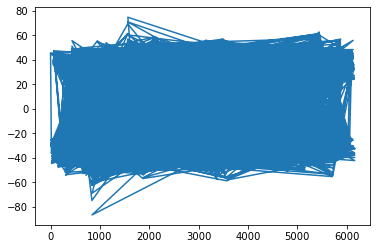

In [70]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

Leverage vs Studentized Residuals


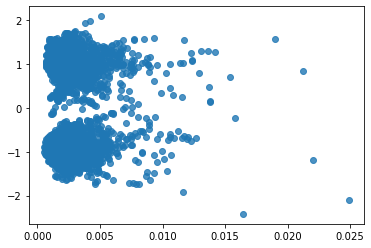

In [72]:
import seaborn as sns 
influence = model.get_influence()

resid_student = influence.resid_studentized_external

(cooks, p) = influence.cooks_distance
(dffits, p ) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs Studentized Residuals")
sns.regplot(leverage, model.resid_pearson, fit_reg=False)

In [109]:
l=["ind_132","ind_332","ind_77","ind_418","ind_128","ind_47","ind_416"
   ,"ind_347","ind_18","ind_164","ind_124"]

In [110]:
X = data[l]

X = sm.add_constant(X)  

y= data["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

ols_model = sm.OLS(y_train, X_train)
model = ols_model.fit()
# if model.rsquared_adj > 0.07:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     37.37
Date:                Sat, 25 Jul 2020   Prob (F-statistic):           4.27e-78
Time:                        22:37:06   Log-Likelihood:                -26144.
No. Observations:                5241   AIC:                         5.231e+04
Df Residuals:                    5229   BIC:                         5.239e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.9092      2.223    -10.756      0.000     -28.267     -19.551
ind_132        0.1129      0.012      9.216      0.000       0.089       0.137
ind_332        0.1463      0.017      8.578      0.000       0.113       0.180
ind_77         0.4812      0.071      6.752      0.000       0.341       0.621
ind_418       -0.1888      0.036     -5.258      0.000      -0.259      -0.118
ind_128       -0.5124      0.060     -8.584      0.000      -0.629      -0.395
ind_47         0.7769      0.088      8.826      0.000       0.604       0.949
ind_416        0.2042      0.034      5.987      0.000       0.137       0.271
ind_347       -0.1390      0.053     -2.603      0.009      -0.244      -0.034
ind_18         1.2909      0.208      6.207      0.000       0.883       1.699
ind_164       -0.1627      0.047     -3.487      0.000      -0.254      -0.071
ind_124       -0.1446      0.057     -2.538      0.011      -0.256      -0.033
==============================================================================
Omnibus:                    23843.249   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.208
Skew:                           0.167   Prob(JB):                    1.92e-138
Kurtosis:                       1.329   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,20.742115,const
1,2.993638,ind_132
2,1.203397,ind_332
3,2.903452,ind_77
4,2.944555,ind_418
5,12.955687,ind_128
6,14.487851,ind_47
7,1.229023,ind_416
8,1.059691,ind_347
9,1.338406,ind_18


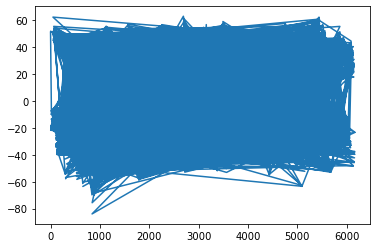

In [112]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

Leverage vs Studentized Residuals


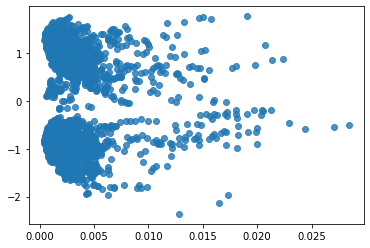

In [113]:
import seaborn as sns 
influence = model.get_influence()

resid_student = influence.resid_studentized_external

(cooks, p) = influence.cooks_distance
(dffits, p ) = influence.dffits
leverage = influence.hat_matrix_diag
print("Leverage vs Studentized Residuals")
sns.regplot(leverage, model.resid_pearson, fit_reg=False)

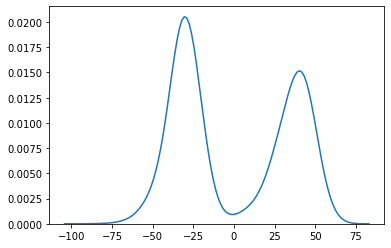

In [114]:
sns.distplot(np.array(model.resid), hist=False)
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = data[l]
y = data["90_target"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)
lm = LinearRegression()
model_lm = lm.fit(X_train, y_train)

model_lm.score(X_train, y_train)

0.0757927963621029

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

np.sqrt(mean_squared_error(y_train, model_lm.predict(X_train)))


35.42903662494004

In [124]:
np.sqrt(mean_squared_error(y_test, model_lm.predict(X_test)))

36.063088920871984

In [8]:
import random
def random_select(n):
    j = len(_columns)-1
    liste = []
    random_list=[]
    for i in range(n):
        c=random.randint(0, j)
        if random_list.count(c)>0:
            continue
        else:
            random_list.append(c)
            liste.append(_columns[c])
    return liste

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.06:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis.append(indis)

c:\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['ind_9', 'ind_37', 'ind_313', 'ind_412', 'ind_345', 'ind_225', 'ind_332', 'ind_29', 'ind_410', 'ind_35', 'ind_50', 'ind_20', 'ind_212', 'ind_347', 'ind_403', 'ind_18']
const       -28.801710
ind_9         0.087505
ind_37        0.062043
ind_313      -3.931771
ind_412    1270.088925
ind_345      18.784140
ind_225    -197.707967
ind_332       0.140135
ind_29       -0.020751
ind_410      -0.229143
ind_35       -0.014026
ind_50        0.209417
ind_20        0.042602
ind_212       0.004207
ind_347      -0.052697
ind_403      66.358090
ind_18        2.125361
dtype: float64
r2: 0.06528
------------------
['ind_316', 'ind_17', 'ind_332', 'ind_403', 'ind_70', 'ind_349', 'ind_20', 'ind_181', 'ind_412', 'ind_50', 'ind_124', 'ind_344', 'ind_410', 'ind_8', 'ind_130', 'ind_404', 'ind_46']
const     -1.984642e+01
ind_316    3.080708e-02
ind_17     1.019659e+00
ind_332    1.353696e-01
ind_403    2.196358e+06
ind_70     3.393250e+00
ind_349   -4.758508e+04
ind_20     2.727627e-01
ind_181    1.329504e-

['ind_344', 'ind_37', 'ind_82', 'ind_156', 'ind_150', 'ind_118', 'ind_153', 'ind_330', 'ind_309', 'ind_349', 'ind_41', 'ind_414', 'ind_56', 'ind_27', 'ind_50', 'ind_412', 'ind_404']
const        105.803148
ind_344    23503.232615
ind_37         0.126135
ind_82         3.008331
ind_156        0.448382
ind_150        0.581805
ind_118     2626.783256
ind_153       -3.362116
ind_330       -9.352056
ind_309    32754.955542
ind_349   -62549.878995
ind_41        -0.001852
ind_414        0.243124
ind_56        -0.022427
ind_27     -2656.480252
ind_50        -0.041653
ind_412      958.090721
ind_404      -95.884674
dtype: float64
r2: 0.06038
------------------
['ind_168', 'ind_407', 'ind_92', 'ind_134', 'ind_132', 'ind_74', 'ind_332', 'ind_43', 'ind_418', 'ind_228', 'ind_412', 'ind_181', 'ind_349', 'ind_47', 'ind_102']
const         -7.605388
ind_168       -0.003995
ind_407        0.263688
ind_92         1.048479
ind_134       -0.068534
ind_132        0.077180
ind_74         0.242108
ind_332   

KeyboardInterrupt: 

In [37]:
new_analysis

['const',
 'ind_9',
 'ind_37',
 'ind_412',
 'ind_225',
 'ind_332',
 'ind_29',
 'ind_410',
 'ind_50',
 'ind_18',
 'const',
 'ind_316',
 'ind_17',
 'ind_332',
 'ind_70',
 'ind_349',
 'ind_20',
 'ind_412',
 'ind_50',
 'ind_344',
 'ind_130',
 'ind_46',
 'const',
 'ind_15',
 'ind_412',
 'ind_18',
 'ind_334',
 'ind_9',
 'ind_153',
 'ind_37',
 'const',
 'ind_332',
 'ind_17',
 'ind_309',
 'ind_56',
 'ind_83',
 'ind_416',
 'ind_153',
 'ind_347',
 'ind_412',
 'const',
 'ind_412',
 'ind_20',
 'ind_83',
 'ind_130',
 'ind_332',
 'ind_50',
 'ind_23',
 'ind_153',
 'ind_142',
 'ind_82',
 'ind_39',
 'const',
 'ind_77',
 'ind_412',
 'ind_172',
 'ind_51',
 'ind_332',
 'ind_37',
 'ind_26',
 'ind_116',
 'ind_153',
 'ind_142',
 'const',
 'ind_36',
 'ind_5',
 'ind_118',
 'ind_324',
 'ind_26',
 'ind_332',
 'ind_412',
 'ind_18',
 'ind_347',
 'ind_416',
 'ind_6',
 'const',
 'ind_18',
 'ind_74',
 'ind_26',
 'ind_318',
 'ind_194',
 'ind_132',
 'ind_50',
 'ind_332',
 'ind_130',
 'const',
 'ind_399',
 'ind_136',
 '

In [42]:
import collections

counter=collections.Counter(new_analysis)
ganalysis= []
for i in range(30):
    ganalysis.append(counter.most_common(30)[i][0])

In [45]:
ganalysis.remove('const')
ganalysis

['ind_412',
 'ind_332',
 'ind_18',
 'ind_153',
 'ind_130',
 'ind_37',
 'ind_50',
 'ind_416',
 'ind_74',
 'ind_47',
 'ind_83',
 'ind_330',
 'ind_9',
 'ind_309',
 'ind_26',
 'ind_5',
 'ind_324',
 'ind_132',
 'ind_410',
 'ind_17',
 'ind_20',
 'ind_334',
 'ind_347',
 'ind_23',
 'ind_142',
 'ind_82',
 'ind_39',
 'ind_36',
 'ind_418']

In [46]:
import random
def random_select(n):
    j = len(ganalysis)-1
    liste = []
    random_list=[]
    for i in range(n):
        c=random.randint(0, j)
        if random_list.count(c)>0:
            continue
        else:
            random_list.append(c)
            liste.append(ganalysis[c])
    return liste

In [48]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.07:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis.append(indis)

['ind_47', 'ind_410', 'ind_83', 'ind_334', 'ind_418', 'ind_9', 'ind_324', 'ind_50', 'ind_153', 'ind_332', 'ind_23', 'ind_20', 'ind_142', 'ind_18', 'ind_130']
const        113.414873
ind_47         0.587554
ind_410       -0.609225
ind_83         0.258746
ind_334     4123.611642
ind_418       -0.353955
ind_9          0.094777
ind_324   -19963.123101
ind_50         0.476677
ind_153       -4.122024
ind_332        0.145869
ind_23        -0.195637
ind_20         0.034818
ind_142        1.249851
ind_18         1.135055
ind_130       -0.810222
dtype: float64
r2: 0.07814
------------------
['ind_330', 'ind_130', 'ind_83', 'ind_37', 'ind_416', 'ind_47', 'ind_332', 'ind_324', 'ind_334', 'ind_9', 'ind_18', 'ind_309', 'ind_153', 'ind_82', 'ind_347']
const        120.876077
ind_330       -2.520014
ind_130       -0.285602
ind_83         0.076180
ind_37         0.102805
ind_416        0.173139
ind_47        -0.055702
ind_332        0.126326
ind_324   -18760.775669
ind_334    -3675.237398
ind_9        

['ind_23', 'ind_142', 'ind_309', 'ind_5', 'ind_82', 'ind_74', 'ind_332', 'ind_50', 'ind_153', 'ind_37', 'ind_418', 'ind_130', 'ind_347', 'ind_39', 'ind_334']
const        123.034659
ind_23         0.007413
ind_142        0.997661
ind_309    27099.015347
ind_5         -0.308899
ind_82         3.229061
ind_74         0.209120
ind_332        0.152865
ind_50         0.681631
ind_153       -3.722500
ind_37         0.092357
ind_418       -0.313784
ind_130       -0.859217
ind_347       -0.151062
ind_39        -0.123453
ind_334     6313.976242
dtype: float64
r2: 0.07180
------------------
['ind_142', 'ind_324', 'ind_330', 'ind_130', 'ind_412', 'ind_74', 'ind_132', 'ind_153', 'ind_309', 'ind_5', 'ind_50', 'ind_332', 'ind_36', 'ind_37', 'ind_410']
const        173.793758
ind_142        0.939274
ind_324   -31898.445547
ind_330       -5.768620
ind_130       -0.868141
ind_412     1050.587414
ind_74         0.184826
ind_132       -0.017092
ind_153       -4.575921
ind_309     2898.525585
ind_5       

['ind_83', 'ind_47', 'ind_5', 'ind_37', 'ind_412', 'ind_347', 'ind_309', 'ind_23', 'ind_410', 'ind_9', 'ind_330', 'ind_418', 'ind_130', 'ind_153']
const        166.560573
ind_83         0.035443
ind_47         0.529965
ind_5          0.173616
ind_37         0.109795
ind_412     1143.519051
ind_347       -0.098922
ind_309    21986.953250
ind_23        -0.066113
ind_410       -0.332495
ind_9          0.059228
ind_330       -8.944324
ind_418       -0.380328
ind_130       -0.221431
ind_153       -3.656349
dtype: float64
r2: 0.07444
------------------
['ind_330', 'ind_153', 'ind_130', 'ind_412', 'ind_36', 'ind_334', 'ind_309', 'ind_50', 'ind_26', 'ind_18', 'ind_82', 'ind_132', 'ind_37']
const        132.078098
ind_330       -9.286935
ind_153       -3.204300
ind_130       -0.655844
ind_412      907.605895
ind_36         0.021776
ind_334    11111.790437
ind_309    31286.165696
ind_50         0.517634
ind_26     -1598.638200
ind_18         1.768604
ind_82         4.449121
ind_132       -0.0135

['ind_334', 'ind_412', 'ind_18', 'ind_9', 'ind_82', 'ind_153', 'ind_309', 'ind_37', 'ind_5', 'ind_330', 'ind_74']
const         64.845611
ind_334     2128.357461
ind_412     1052.494231
ind_18         2.068911
ind_9          0.063685
ind_82         4.237741
ind_153       -1.915706
ind_309    36763.964254
ind_37         0.116391
ind_5          0.042020
ind_330       -8.107170
ind_74         0.110154
dtype: float64
r2: 0.07028
------------------
['ind_309', 'ind_26', 'ind_324', 'ind_50', 'ind_18', 'ind_153', 'ind_23', 'ind_330', 'ind_130', 'ind_142', 'ind_332', 'ind_132', 'ind_37', 'ind_5']
const        135.184623
ind_309    19517.592365
ind_26     -1006.511197
ind_324   -16802.163614
ind_50         0.569912
ind_18         1.396915
ind_153       -3.925671
ind_23         0.067154
ind_330       -3.607352
ind_130       -0.857284
ind_142        0.699437
ind_332        0.088292
ind_132        0.079372
ind_37         0.111027
ind_5         -0.240455
dtype: float64
r2: 0.07604
-----------------

['ind_74', 'ind_50', 'ind_153', 'ind_330', 'ind_309', 'ind_20', 'ind_36', 'ind_17', 'ind_18', 'ind_324', 'ind_410', 'ind_37', 'ind_130', 'ind_334', 'ind_26', 'ind_83']
const        168.002741
ind_74         0.116471
ind_50         0.549375
ind_153       -3.877710
ind_330       -7.195025
ind_309    19461.092018
ind_20         0.065190
ind_36         0.048915
ind_17         0.745978
ind_18         1.096282
ind_324   -15803.664353
ind_410       -0.122952
ind_37         0.073094
ind_130       -0.728226
ind_334     5598.439417
ind_26       259.414548
ind_83        -0.019381
dtype: float64
r2: 0.07051
------------------
['ind_130', 'ind_5', 'ind_39', 'ind_82', 'ind_36', 'ind_20', 'ind_83', 'ind_332', 'ind_23', 'ind_18', 'ind_142', 'ind_418', 'ind_412', 'ind_410', 'ind_50']
const      -33.791825
ind_130     -0.628880
ind_5       -0.077058
ind_39      -0.125737
ind_82       5.812286
ind_36       0.043129
ind_20      -0.100424
ind_83       0.168219
ind_332      0.146672
ind_23      -0.032688
in

['ind_23', 'ind_26', 'ind_334', 'ind_412', 'ind_82', 'ind_410', 'ind_416', 'ind_130', 'ind_36', 'ind_132', 'ind_37', 'ind_50', 'ind_330', 'ind_418', 'ind_347', 'ind_324', 'ind_332']
const        -10.825206
ind_23        -0.031677
ind_26     -2171.525560
ind_334     2408.215300
ind_412      773.450501
ind_82         5.086545
ind_410       -0.062210
ind_416        0.201372
ind_130       -0.542507
ind_36        -0.012586
ind_132        0.033262
ind_37         0.072983
ind_50         0.668763
ind_330       -5.788462
ind_418       -0.046059
ind_347       -0.132452
ind_324   -22922.475668
ind_332        0.105432
dtype: float64
r2: 0.07117
------------------
['ind_416', 'ind_132', 'ind_324', 'ind_142', 'ind_74', 'ind_18', 'ind_347', 'ind_130', 'ind_83', 'ind_50', 'ind_37', 'ind_410', 'ind_332']
const        -14.552714
ind_416        0.229063
ind_132        0.187613
ind_324   -15877.212448
ind_142       -0.215932
ind_74         0.239481
ind_18         1.818979
ind_347       -0.121626
ind_130  

['ind_130', 'ind_50', 'ind_332', 'ind_324', 'ind_418', 'ind_142', 'ind_23', 'ind_9', 'ind_47', 'ind_20', 'ind_37', 'ind_74', 'ind_82', 'ind_410', 'ind_83', 'ind_309']
const        -37.994147
ind_130       -0.609523
ind_50         0.687035
ind_332        0.162185
ind_324   -26838.474284
ind_418       -0.364454
ind_142        0.410062
ind_23        -0.146132
ind_9          0.084333
ind_47         0.608860
ind_20         0.124116
ind_37         0.029015
ind_74         0.250405
ind_82         8.951230
ind_410       -0.407895
ind_83         0.087915
ind_309    16073.473911
dtype: float64
r2: 0.07006
------------------
['ind_332', 'ind_324', 'ind_23', 'ind_18', 'ind_50', 'ind_416', 'ind_412', 'ind_47', 'ind_74', 'ind_39', 'ind_82', 'ind_37']
const        -25.983778
ind_332        0.153231
ind_324   -14940.903335
ind_23         0.145342
ind_18         1.487820
ind_50         0.151231
ind_416        0.224431
ind_412     1028.460213
ind_47         0.138639
ind_74         0.120351
ind_39        

['ind_410', 'ind_418', 'ind_330', 'ind_309', 'ind_132', 'ind_37', 'ind_36', 'ind_324', 'ind_130', 'ind_153', 'ind_332', 'ind_17', 'ind_82', 'ind_412']
const        173.814896
ind_410       -0.142481
ind_418       -0.007153
ind_330       -4.244132
ind_309    21034.632754
ind_132       -0.019610
ind_37         0.109582
ind_36         0.009677
ind_324   -19468.261486
ind_130       -0.205948
ind_153       -3.872322
ind_332        0.113921
ind_17         1.054933
ind_82         2.870170
ind_412     1003.818880
dtype: float64
r2: 0.07802
------------------
['ind_416', 'ind_82', 'ind_347', 'ind_332', 'ind_20', 'ind_412', 'ind_18', 'ind_37', 'ind_39', 'ind_309', 'ind_418']
const        -27.081737
ind_416        0.214801
ind_82         6.184346
ind_347       -0.113499
ind_332        0.153014
ind_20        -0.084139
ind_412      924.574138
ind_18         1.713129
ind_37         0.045370
ind_39        -0.099578
ind_309    30713.707396
ind_418       -0.143240
dtype: float64
r2: 0.07278
-----------

['ind_332', 'ind_9', 'ind_412', 'ind_17', 'ind_26', 'ind_50', 'ind_37', 'ind_416', 'ind_130', 'ind_82', 'ind_39', 'ind_5', 'ind_20']
const      -18.367179
ind_332      0.160261
ind_9        0.036888
ind_412    998.819986
ind_17       1.079493
ind_26      36.841904
ind_50       0.628722
ind_37       0.064304
ind_416      0.179226
ind_130     -0.524015
ind_82       5.501130
ind_39      -0.000187
ind_5        0.079712
ind_20      -0.208468
dtype: float64
r2: 0.07315
------------------
['ind_330', 'ind_9', 'ind_47', 'ind_153', 'ind_324', 'ind_36', 'ind_416', 'ind_20', 'ind_17', 'ind_142', 'ind_418', 'ind_37', 'ind_82', 'ind_74', 'ind_130']
const        150.370453
ind_330      -10.420218
ind_9          0.070737
ind_47         0.194601
ind_153       -4.265973
ind_324   -20615.496710
ind_36         0.021166
ind_416        0.158319
ind_20        -0.227278
ind_17         0.407415
ind_142        0.854202
ind_418       -0.237181
ind_37         0.105610
ind_82         3.495766
ind_74         0.025

['ind_39', 'ind_83', 'ind_324', 'ind_412', 'ind_132', 'ind_416', 'ind_47', 'ind_23', 'ind_18', 'ind_142', 'ind_330', 'ind_37', 'ind_130', 'ind_17', 'ind_74']
const        -10.961148
ind_39        -0.015408
ind_83         0.077327
ind_324   -14315.283789
ind_412      927.493623
ind_132        0.165968
ind_416        0.200230
ind_47         0.141502
ind_23         0.081532
ind_18         1.348110
ind_142       -0.298130
ind_330       -8.026936
ind_37         0.081662
ind_130       -0.054079
ind_17         0.340080
ind_74         0.078999
dtype: float64
r2: 0.07185
------------------
['ind_5', 'ind_330', 'ind_416', 'ind_39', 'ind_347', 'ind_18', 'ind_47', 'ind_324', 'ind_9', 'ind_412', 'ind_410', 'ind_20', 'ind_50', 'ind_37']
const        -25.867852
ind_5         -0.060124
ind_330       -6.220789
ind_416        0.172483
ind_39        -0.020479
ind_347       -0.129514
ind_18         1.654173
ind_47         0.429278
ind_324   -19598.655535
ind_9          0.052969
ind_412     1220.590100
ind

['ind_324', 'ind_9', 'ind_412', 'ind_39', 'ind_18', 'ind_50', 'ind_17', 'ind_132', 'ind_334', 'ind_130', 'ind_332']
const        -31.615511
ind_324   -17986.904401
ind_9          0.065991
ind_412      801.516113
ind_39        -0.018452
ind_18         1.290497
ind_50         0.562320
ind_17         0.543795
ind_132        0.091194
ind_334     8090.903298
ind_130       -0.594848
ind_332        0.151155
dtype: float64
r2: 0.07133
------------------
['ind_47', 'ind_347', 'ind_130', 'ind_410', 'ind_23', 'ind_26', 'ind_50', 'ind_330', 'ind_416', 'ind_36', 'ind_17', 'ind_332', 'ind_20', 'ind_9', 'ind_412']
const       -17.737221
ind_47        0.346728
ind_347      -0.199201
ind_130      -0.399081
ind_410      -0.356004
ind_23        0.055607
ind_26      608.744168
ind_50        0.573871
ind_330      -0.384960
ind_416       0.159150
ind_36        0.047914
ind_17        1.021493
ind_332       0.133063
ind_20        0.162707
ind_9         0.045054
ind_412    1060.331635
dtype: float64
r2: 0.0737

['ind_23', 'ind_153', 'ind_130', 'ind_17', 'ind_36', 'ind_416', 'ind_410', 'ind_309', 'ind_332', 'ind_412', 'ind_418', 'ind_9']
const        113.597742
ind_23        -0.116333
ind_153       -2.703599
ind_130       -0.174319
ind_17         1.043758
ind_36         0.074864
ind_416        0.162572
ind_410       -0.124995
ind_309    19477.740259
ind_332        0.169411
ind_412      847.515482
ind_418       -0.175102
ind_9          0.056723
dtype: float64
r2: 0.07383
------------------
['ind_17', 'ind_130', 'ind_20', 'ind_332', 'ind_412', 'ind_334', 'ind_132', 'ind_324', 'ind_74', 'ind_37', 'ind_36', 'ind_82', 'ind_153', 'ind_416', 'ind_330', 'ind_5']
const        142.472789
ind_17         1.024595
ind_130       -0.220178
ind_20        -0.308835
ind_332        0.130692
ind_412     1012.942977
ind_334    -7433.974221
ind_132        0.012676
ind_324   -22051.982371
ind_74         0.073563
ind_37         0.103280
ind_36         0.010231
ind_82         2.649861
ind_153       -3.226193
ind_416  

['ind_74', 'ind_324', 'ind_330', 'ind_130', 'ind_416', 'ind_410', 'ind_17', 'ind_23', 'ind_142', 'ind_39', 'ind_50', 'ind_347', 'ind_37', 'ind_412']
const        -17.840691
ind_74         0.216685
ind_324   -20669.584888
ind_330       -7.008501
ind_130       -0.467149
ind_416        0.155032
ind_410       -0.241592
ind_17         0.966094
ind_23        -0.016442
ind_142        0.059373
ind_39        -0.078326
ind_50         0.719504
ind_347       -0.182613
ind_37         0.042840
ind_412     1070.900157
dtype: float64
r2: 0.07109
------------------
['ind_153', 'ind_37', 'ind_330', 'ind_412', 'ind_18', 'ind_416', 'ind_23']
const       103.249551
ind_153      -2.589370
ind_37        0.128484
ind_330      -7.417833
ind_412    1196.879625
ind_18        1.705859
ind_416       0.234730
ind_23        0.137923
dtype: float64
r2: 0.07401
------------------
['ind_412', 'ind_324', 'ind_50', 'ind_36', 'ind_132', 'ind_332', 'ind_416', 'ind_418', 'ind_39', 'ind_37', 'ind_309', 'ind_153']
const      

['ind_37', 'ind_17', 'ind_83', 'ind_23', 'ind_132', 'ind_332', 'ind_36', 'ind_50', 'ind_130', 'ind_416', 'ind_9', 'ind_20', 'ind_418', 'ind_330', 'ind_18']
const     -30.502647
ind_37      0.047363
ind_17      0.444477
ind_83      0.208103
ind_23     -0.087845
ind_132     0.189818
ind_332     0.127433
ind_36      0.019403
ind_50      0.577006
ind_130    -0.641572
ind_416     0.221637
ind_9       0.062418
ind_20     -0.083069
ind_418    -0.160893
ind_330    -0.714237
ind_18      1.439200
dtype: float64
r2: 0.07360
------------------
['ind_82', 'ind_5', 'ind_130', 'ind_18', 'ind_153', 'ind_37', 'ind_410', 'ind_17', 'ind_47', 'ind_330', 'ind_347', 'ind_20', 'ind_39', 'ind_74', 'ind_412', 'ind_132']
const       146.080063
ind_82        1.708610
ind_5        -0.043593
ind_130      -0.174039
ind_18        1.365278
ind_153      -3.493965
ind_37        0.115229
ind_410      -0.587192
ind_17        0.653713
ind_47        0.427922
ind_330      -8.417607
ind_347      -0.077401
ind_20        0.417

['ind_130', 'ind_334', 'ind_18', 'ind_309', 'ind_330', 'ind_17', 'ind_5', 'ind_132', 'ind_412', 'ind_153', 'ind_37', 'ind_418', 'ind_9', 'ind_332']
const        144.343922
ind_130       -0.255379
ind_334     5655.495159
ind_18         1.515009
ind_309    26785.874860
ind_330       -2.098850
ind_17         0.324350
ind_5         -0.051368
ind_132        0.052714
ind_412     1018.831886
ind_153       -3.570760
ind_37         0.118434
ind_418       -0.146301
ind_9          0.069767
ind_332        0.124933
dtype: float64
r2: 0.08363
------------------
['ind_5', 'ind_130', 'ind_37', 'ind_17', 'ind_47', 'ind_309', 'ind_347', 'ind_332', 'ind_142', 'ind_9', 'ind_410', 'ind_153', 'ind_82', 'ind_132', 'ind_416', 'ind_83', 'ind_26']
const        150.570224
ind_5          0.110132
ind_130       -0.328471
ind_37         0.087713
ind_17         0.989904
ind_47         0.330799
ind_309    20098.277219
ind_347       -0.057618
ind_332        0.153303
ind_142        0.850785
ind_9          0.055404
ind_

['ind_9', 'ind_18', 'ind_83', 'ind_36', 'ind_17', 'ind_412', 'ind_334', 'ind_309', 'ind_153', 'ind_332', 'ind_50', 'ind_330']
const         73.017366
ind_9          0.066752
ind_18         1.429938
ind_83         0.095210
ind_36         0.085591
ind_17         0.663339
ind_412      998.895921
ind_334     1570.079176
ind_309    25524.829138
ind_153       -2.119455
ind_332        0.137473
ind_50        -0.062423
ind_330        0.150376
dtype: float64
r2: 0.07166
------------------
['ind_36', 'ind_20', 'ind_412', 'ind_9', 'ind_332', 'ind_324', 'ind_74', 'ind_142', 'ind_83', 'ind_47', 'ind_410', 'ind_5', 'ind_82', 'ind_17', 'ind_39', 'ind_23']
const        -15.414295
ind_36         0.019378
ind_20         0.112105
ind_412      917.751238
ind_9          0.065087
ind_332        0.173135
ind_324   -26327.052015
ind_74         0.098465
ind_142       -0.134432
ind_83         0.111022
ind_47         0.560929
ind_410       -0.518785
ind_5          0.219265
ind_82         6.416124
ind_17         1

['ind_330', 'ind_130', 'ind_47', 'ind_324', 'ind_418', 'ind_153', 'ind_39', 'ind_17', 'ind_50', 'ind_347', 'ind_36', 'ind_5', 'ind_412', 'ind_9']
const         96.396733
ind_330       -9.084314
ind_130       -0.720063
ind_47         0.134371
ind_324   -19238.130532
ind_418       -0.136752
ind_153       -2.339443
ind_39         0.036508
ind_17         0.638938
ind_50         0.628061
ind_347       -0.164644
ind_36         0.085898
ind_5         -0.108695
ind_412      905.571824
ind_9          0.061096
dtype: float64
r2: 0.07676
------------------
['ind_18', 'ind_418', 'ind_20', 'ind_26', 'ind_39', 'ind_332', 'ind_82', 'ind_324', 'ind_153', 'ind_36', 'ind_50', 'ind_416', 'ind_347', 'ind_9', 'ind_130']
const         72.858738
ind_18         1.562174
ind_418       -0.111509
ind_20        -0.049760
ind_26      -253.860378
ind_39        -0.020023
ind_332        0.163969
ind_82         3.949063
ind_324   -16814.350033
ind_153       -2.072933
ind_36         0.078390
ind_50         0.614040
ind

['ind_37', 'ind_36', 'ind_132', 'ind_23', 'ind_153', 'ind_50', 'ind_9', 'ind_332', 'ind_39', 'ind_412', 'ind_20', 'ind_130', 'ind_324', 'ind_416', 'ind_142']
const        158.320238
ind_37         0.102981
ind_36         0.004011
ind_132       -0.024870
ind_23         0.208775
ind_153       -4.350749
ind_50         0.569529
ind_9          0.078210
ind_332        0.162740
ind_39        -0.019807
ind_412     1028.284587
ind_20        -0.462933
ind_130       -0.753193
ind_324   -24833.704789
ind_416        0.160884
ind_142        0.875828
dtype: float64
r2: 0.08610
------------------
['ind_74', 'ind_416', 'ind_82', 'ind_410', 'ind_412', 'ind_324', 'ind_23', 'ind_47', 'ind_309', 'ind_18', 'ind_20', 'ind_36', 'ind_332', 'ind_330', 'ind_39']
const        -25.599297
ind_74         0.116545
ind_416        0.188684
ind_82         5.977114
ind_410       -0.429618
ind_412      902.559616
ind_324   -16564.171420
ind_23         0.066618
ind_47         0.481066
ind_309    20351.213572
ind_18        

['ind_5', 'ind_50', 'ind_153', 'ind_47', 'ind_416', 'ind_36', 'ind_82', 'ind_330', 'ind_309', 'ind_324', 'ind_83', 'ind_130', 'ind_418']
const         86.723285
ind_5          0.030193
ind_50         0.615423
ind_153       -1.971637
ind_47         0.296373
ind_416        0.170850
ind_36         0.077899
ind_82         6.729083
ind_330      -10.054191
ind_309    15572.923146
ind_324   -18009.927221
ind_83         0.249839
ind_130       -0.769321
ind_418       -0.260871
dtype: float64
r2: 0.07059
------------------
['ind_39', 'ind_9', 'ind_17', 'ind_332', 'ind_47', 'ind_20', 'ind_334', 'ind_412', 'ind_410', 'ind_153', 'ind_142', 'ind_36']
const        61.039922
ind_39       -0.037092
ind_9         0.058826
ind_17        1.086416
ind_332       0.159470
ind_47        0.509624
ind_20        0.378253
ind_334   -3572.628464
ind_412     951.327002
ind_410      -0.631619
ind_153      -1.881775
ind_142       0.225619
ind_36        0.070897
dtype: float64
r2: 0.07128
------------------
['ind_74',

['ind_9', 'ind_5', 'ind_47', 'ind_130', 'ind_332', 'ind_39', 'ind_20', 'ind_36', 'ind_412', 'ind_142', 'ind_410', 'ind_18', 'ind_132', 'ind_50', 'ind_74']
const      -30.621673
ind_9        0.060764
ind_5       -0.036957
ind_47       0.371031
ind_130     -0.539043
ind_332      0.142401
ind_39      -0.036425
ind_20       0.174129
ind_36       0.030898
ind_412    947.921278
ind_142     -0.000302
ind_410     -0.415487
ind_18       1.911124
ind_132      0.095186
ind_50       0.584731
ind_74       0.241209
dtype: float64
r2: 0.07465
------------------
['ind_132', 'ind_17', 'ind_332', 'ind_330', 'ind_37', 'ind_9', 'ind_20', 'ind_130', 'ind_324', 'ind_82', 'ind_50', 'ind_18', 'ind_418', 'ind_5', 'ind_410']
const        -30.895389
ind_132        0.113794
ind_17         0.497230
ind_332        0.105774
ind_330       -4.359101
ind_37         0.072615
ind_9          0.082480
ind_20        -0.137994
ind_130       -0.728567
ind_324   -25673.710884
ind_82         5.360697
ind_50         0.689243
ind

['ind_37', 'ind_39', 'ind_330', 'ind_309', 'ind_17', 'ind_82', 'ind_130', 'ind_47', 'ind_142', 'ind_23', 'ind_412', 'ind_334', 'ind_50', 'ind_332']
const        -16.530218
ind_37         0.068153
ind_39        -0.051064
ind_330       -5.067048
ind_309    24623.343575
ind_17         0.766352
ind_82         7.024016
ind_130       -0.527004
ind_47         0.146154
ind_142        0.009173
ind_23         0.108874
ind_412      918.559773
ind_334    13001.190450
ind_50         0.630313
ind_332        0.098139
dtype: float64
r2: 0.07101
------------------
['ind_332', 'ind_132', 'ind_39', 'ind_334', 'ind_18', 'ind_17', 'ind_153', 'ind_412', 'ind_9', 'ind_418', 'ind_324', 'ind_36', 'ind_142']
const         66.081049
ind_332        0.149349
ind_132       -0.025081
ind_39        -0.021607
ind_334     -149.128285
ind_18         1.203534
ind_17         0.485395
ind_153       -2.043633
ind_412      977.572180
ind_9          0.084028
ind_418       -0.079501
ind_324   -13350.492692
ind_36         0.083

['ind_50', 'ind_153', 'ind_412', 'ind_130', 'ind_74', 'ind_26', 'ind_47', 'ind_9', 'ind_132', 'ind_309', 'ind_83', 'ind_324', 'ind_37', 'ind_5', 'ind_332']
const        109.422294
ind_50         0.551203
ind_153       -2.475932
ind_412      924.665206
ind_130       -0.691959
ind_74         0.156305
ind_26     -2370.470648
ind_47        -0.051242
ind_9          0.036136
ind_132        0.081519
ind_309     7512.330218
ind_83         0.055310
ind_324   -23086.604810
ind_37         0.093038
ind_5         -0.159934
ind_332        0.158363
dtype: float64
r2: 0.07381
------------------
['ind_132', 'ind_39', 'ind_23', 'ind_130', 'ind_37', 'ind_5', 'ind_347', 'ind_416', 'ind_20', 'ind_18', 'ind_47', 'ind_330', 'ind_153', 'ind_324', 'ind_412', 'ind_9']
const        133.491565
ind_132        0.061789
ind_39         0.053430
ind_23         0.140636
ind_130       -0.263131
ind_37         0.122642
ind_5          0.150588
ind_347       -0.033950
ind_416        0.176709
ind_20        -0.241163
ind_18 

['ind_47', 'ind_142', 'ind_17', 'ind_83', 'ind_153', 'ind_324', 'ind_416', 'ind_332', 'ind_50', 'ind_36', 'ind_20', 'ind_9', 'ind_412', 'ind_37']
const         99.433126
ind_47        -0.048564
ind_142        0.447862
ind_17         1.036054
ind_83         0.029817
ind_153       -2.854363
ind_324   -20280.763670
ind_416        0.159472
ind_332        0.155986
ind_50        -0.058036
ind_36         0.029255
ind_20        -0.241121
ind_9          0.052721
ind_412     1075.169795
ind_37         0.089483
dtype: float64
r2: 0.07659
------------------
['ind_9', 'ind_26', 'ind_39', 'ind_347', 'ind_416', 'ind_36', 'ind_50', 'ind_20', 'ind_18', 'ind_412', 'ind_153', 'ind_142', 'ind_130', 'ind_74', 'ind_309']
const         60.951362
ind_9          0.046665
ind_26     -1379.646889
ind_39        -0.007591
ind_347       -0.132740
ind_416        0.159345
ind_36         0.063843
ind_50         0.658154
ind_20        -0.316099
ind_18         1.990159
ind_412      826.366444
ind_153       -2.374295
ind

['ind_37', 'ind_332', 'ind_334', 'ind_18', 'ind_20', 'ind_82', 'ind_26', 'ind_410', 'ind_412', 'ind_50', 'ind_153']
const       121.283583
ind_37        0.118443
ind_332       0.153177
ind_334    1253.343985
ind_18        1.721529
ind_20       -0.017143
ind_82        1.114361
ind_26    -1681.383846
ind_410      -0.114191
ind_412    1210.328679
ind_50       -0.099164
ind_153      -3.028856
dtype: float64
r2: 0.07152
------------------
['ind_132', 'ind_334', 'ind_9', 'ind_332', 'ind_39', 'ind_23', 'ind_324', 'ind_47', 'ind_418', 'ind_37', 'ind_416', 'ind_20', 'ind_412', 'ind_142']
const        -20.905983
ind_132        0.117698
ind_334    -4866.399400
ind_9          0.067973
ind_332        0.164023
ind_39         0.005968
ind_23        -0.019837
ind_324   -19160.767728
ind_47         0.302559
ind_418       -0.322788
ind_37         0.074335
ind_416        0.198164
ind_20        -0.167361
ind_412     1007.002221
ind_142        0.066466
dtype: float64
r2: 0.07144
------------------
['ind_41

['ind_9', 'ind_332', 'ind_130', 'ind_347', 'ind_18', 'ind_330', 'ind_416', 'ind_334', 'ind_153', 'ind_82', 'ind_23', 'ind_412', 'ind_324', 'ind_50']
const         27.663720
ind_9          0.069122
ind_332        0.156935
ind_130       -0.684298
ind_347       -0.138408
ind_18         1.616314
ind_330       -1.381506
ind_416        0.170041
ind_334     6419.382439
ind_153       -1.169313
ind_82         3.369409
ind_23         0.105252
ind_412      856.577276
ind_324   -16817.755504
ind_50         0.572335
dtype: float64
r2: 0.08033
------------------
['ind_330', 'ind_324', 'ind_47', 'ind_9', 'ind_334', 'ind_20', 'ind_36', 'ind_412', 'ind_26', 'ind_416', 'ind_332', 'ind_418', 'ind_153', 'ind_74']
const         52.620091
ind_330       -1.718109
ind_324   -16432.111341
ind_47         0.263958
ind_9          0.071865
ind_334    -2421.369480
ind_20        -0.089682
ind_36         0.073606
ind_412     1032.344813
ind_26       607.647367
ind_416        0.186832
ind_332        0.149053
ind_418  

['ind_130', 'ind_416', 'ind_39', 'ind_23', 'ind_410', 'ind_74', 'ind_332', 'ind_412', 'ind_153', 'ind_26', 'ind_18', 'ind_324']
const         84.571999
ind_130       -0.198240
ind_416        0.196259
ind_39        -0.051705
ind_23        -0.030640
ind_410       -0.257136
ind_74         0.255444
ind_332        0.169534
ind_412     1073.593988
ind_153       -2.259075
ind_26     -1582.440003
ind_18         1.654770
ind_324   -15572.164923
dtype: float64
r2: 0.07357
------------------
['ind_142', 'ind_324', 'ind_332', 'ind_23', 'ind_412', 'ind_5', 'ind_82', 'ind_153', 'ind_416', 'ind_83', 'ind_37', 'ind_39', 'ind_130']
const        166.379598
ind_142        0.557097
ind_324   -16899.480947
ind_332        0.167094
ind_23         0.243813
ind_412      931.398558
ind_5         -0.218702
ind_82         1.952489
ind_153       -4.128994
ind_416        0.192774
ind_83         0.180537
ind_37         0.105107
ind_39        -0.055585
ind_130       -0.238330
dtype: float64
r2: 0.07582
--------------

['ind_37', 'ind_130', 'ind_309', 'ind_83', 'ind_416', 'ind_334', 'ind_18', 'ind_9', 'ind_418', 'ind_412', 'ind_36', 'ind_39', 'ind_20', 'ind_74', 'ind_153']
const        157.823415
ind_37         0.100836
ind_130       -0.205545
ind_309    28492.836274
ind_83         0.128373
ind_416        0.198345
ind_334   -13421.688686
ind_18         1.909685
ind_9          0.064715
ind_418       -0.174140
ind_412     1043.759332
ind_36         0.024764
ind_39         0.021766
ind_20        -0.086483
ind_74         0.039023
ind_153       -3.794227
dtype: float64
r2: 0.07684
------------------
['ind_410', 'ind_47', 'ind_5', 'ind_26', 'ind_418', 'ind_39', 'ind_36', 'ind_324', 'ind_82', 'ind_309', 'ind_37', 'ind_332', 'ind_412', 'ind_17']
const        -18.260635
ind_410       -0.368126
ind_47         0.582778
ind_5          0.216733
ind_26       711.236507
ind_418       -0.147412
ind_39        -0.076399
ind_36        -0.005808
ind_324   -21213.706028
ind_82         6.835235
ind_309    21145.921539
ind

['ind_410', 'ind_330', 'ind_37', 'ind_50', 'ind_130', 'ind_418', 'ind_153', 'ind_23', 'ind_83', 'ind_47', 'ind_142', 'ind_334', 'ind_18']
const       181.268629
ind_410      -0.441183
ind_330      -7.500585
ind_37        0.100248
ind_50        0.497486
ind_130      -0.825923
ind_418      -0.360339
ind_153      -5.203941
ind_23       -0.171642
ind_83        0.133486
ind_47        0.532604
ind_142       1.078268
ind_334    8764.470976
ind_18        1.269991
dtype: float64
r2: 0.07516
------------------
['ind_153', 'ind_18', 'ind_50', 'ind_23', 'ind_37', 'ind_5', 'ind_17', 'ind_130', 'ind_47', 'ind_410', 'ind_412', 'ind_324', 'ind_418', 'ind_74']
const        130.041325
ind_153       -3.169720
ind_18         1.302735
ind_50         0.530233
ind_23        -0.170382
ind_37         0.099992
ind_5          0.083150
ind_17         0.635180
ind_130       -0.641228
ind_47         0.390361
ind_410       -0.447639
ind_412     1135.890745
ind_324   -18128.558404
ind_418       -0.189336
ind_74      

['ind_330', 'ind_132', 'ind_153', 'ind_50', 'ind_130', 'ind_142', 'ind_309', 'ind_9', 'ind_82', 'ind_332', 'ind_334', 'ind_37', 'ind_23', 'ind_47', 'ind_418', 'ind_26', 'ind_36']
const        131.040977
ind_330       -5.983078
ind_132       -0.021884
ind_153       -3.559908
ind_50         0.492828
ind_130       -0.698991
ind_142        0.582722
ind_309    28166.507344
ind_9          0.080105
ind_82         5.299054
ind_332        0.095406
ind_334    12892.497514
ind_37         0.083018
ind_23         0.019908
ind_47         0.346124
ind_418       -0.354955
ind_26       473.678939
ind_36         0.030459
dtype: float64
r2: 0.07411
------------------
['ind_347', 'ind_153', 'ind_412', 'ind_37', 'ind_82', 'ind_130', 'ind_330', 'ind_309', 'ind_20', 'ind_416', 'ind_18', 'ind_410']
const        149.008902
ind_347       -0.036687
ind_153       -3.538563
ind_412     1043.673185
ind_37         0.124493
ind_82         2.575914
ind_130       -0.210174
ind_330       -8.268168
ind_309    29055.92629

['ind_410', 'ind_23', 'ind_309', 'ind_37', 'ind_47', 'ind_330', 'ind_20', 'ind_18', 'ind_418', 'ind_412', 'ind_416', 'ind_153', 'ind_83']
const        108.584985
ind_410       -0.566213
ind_23        -0.108037
ind_309    23367.481341
ind_37         0.119844
ind_47         0.546322
ind_330       -6.947851
ind_20         0.375452
ind_18         1.578095
ind_418       -0.287937
ind_412     1205.564631
ind_416        0.203590
ind_153       -2.693265
ind_83         0.014914
dtype: float64
r2: 0.08403
------------------
['ind_153', 'ind_18', 'ind_9', 'ind_332', 'ind_412', 'ind_324', 'ind_37', 'ind_418', 'ind_309', 'ind_23', 'ind_330']
const         96.637745
ind_153       -2.582397
ind_18         1.497925
ind_9          0.089412
ind_332        0.115393
ind_412     1194.560315
ind_324   -12369.825341
ind_37         0.115423
ind_418       -0.113415
ind_309    23562.623582
ind_23         0.060263
ind_330       -1.597304
dtype: float64
r2: 0.07800
------------------
['ind_23', 'ind_334', 'ind_41

['ind_82', 'ind_23', 'ind_412', 'ind_153', 'ind_410', 'ind_130', 'ind_334', 'ind_20', 'ind_416', 'ind_418', 'ind_37', 'ind_332', 'ind_26']
const       166.889883
ind_82        1.047169
ind_23       -0.030643
ind_412    1091.906145
ind_153      -3.608677
ind_410       0.017221
ind_130      -0.233878
ind_334   -1601.995817
ind_20       -0.179445
ind_416       0.216985
ind_418      -0.236535
ind_37        0.115210
ind_332       0.178046
ind_26    -1271.364979
dtype: float64
r2: 0.07261
------------------
['ind_47', 'ind_130', 'ind_132', 'ind_36', 'ind_74', 'ind_83', 'ind_50', 'ind_334', 'ind_418', 'ind_330', 'ind_37', 'ind_142', 'ind_18', 'ind_26', 'ind_153', 'ind_82']
const        123.543067
ind_47         0.269785
ind_130       -0.847266
ind_132        0.034550
ind_36         0.024859
ind_74         0.088445
ind_83         0.197372
ind_50         0.606186
ind_334    10836.919784
ind_418       -0.207721
ind_330       -9.357717
ind_37         0.081892
ind_142        0.374076
ind_18       

['ind_9', 'ind_74', 'ind_153', 'ind_332', 'ind_130', 'ind_309', 'ind_17', 'ind_82', 'ind_18', 'ind_132', 'ind_47', 'ind_412', 'ind_416', 'ind_324']
const         36.519137
ind_9          0.047993
ind_74         0.225638
ind_153       -1.359216
ind_332        0.165575
ind_130       -0.193762
ind_309    21760.747435
ind_17         0.509440
ind_82         3.291059
ind_18         1.498765
ind_132        0.022471
ind_47         0.010105
ind_412      843.105022
ind_416        0.159202
ind_324   -14372.788661
dtype: float64
r2: 0.07456
------------------
['ind_412', 'ind_50', 'ind_26', 'ind_130', 'ind_132', 'ind_410', 'ind_332', 'ind_20', 'ind_418', 'ind_83', 'ind_416', 'ind_37', 'ind_47', 'ind_142']
const      -15.823590
ind_412    965.052446
ind_50       0.520022
ind_26    -242.512417
ind_130     -0.513934
ind_132      0.134452
ind_410     -0.228204
ind_332      0.151889
ind_20      -0.019813
ind_418     -0.286991
ind_83       0.171693
ind_416      0.218844
ind_37       0.055708
ind_47     

['ind_412', 'ind_132', 'ind_332', 'ind_153', 'ind_74', 'ind_410', 'ind_324', 'ind_82', 'ind_37', 'ind_20', 'ind_50', 'ind_330', 'ind_416', 'ind_17', 'ind_418']
const        112.771424
ind_412     1133.077850
ind_132       -0.024309
ind_332        0.131253
ind_153       -2.624088
ind_74         0.139423
ind_410       -0.163416
ind_324   -20077.343867
ind_82         2.826129
ind_37         0.112173
ind_20        -0.018628
ind_50        -0.006165
ind_330       -3.231658
ind_416        0.199610
ind_17         0.962510
ind_418       -0.038542
dtype: float64
r2: 0.07873
------------------
['ind_18', 'ind_37', 'ind_330', 'ind_36', 'ind_23', 'ind_17', 'ind_153', 'ind_50', 'ind_418', 'ind_20', 'ind_332', 'ind_412', 'ind_39']
const       115.286191
ind_18        1.268687
ind_37        0.095056
ind_330      -1.411276
ind_36        0.032916
ind_23       -0.026725
ind_17        0.466157
ind_153      -2.900136
ind_50       -0.071931
ind_418      -0.143790
ind_20       -0.068712
ind_332       0.12757

['ind_18', 'ind_309', 'ind_330', 'ind_36', 'ind_332', 'ind_130', 'ind_142', 'ind_17', 'ind_412', 'ind_20', 'ind_47', 'ind_410', 'ind_418', 'ind_50', 'ind_83']
const        -23.483888
ind_18         1.153901
ind_309    16726.626925
ind_330        0.252948
ind_36         0.045645
ind_332        0.121423
ind_130       -0.385200
ind_142       -0.045393
ind_17         0.479204
ind_412     1145.445905
ind_20         0.132917
ind_47         0.431497
ind_410       -0.331239
ind_418       -0.074973
ind_50         0.542799
ind_83        -0.057851
dtype: float64
r2: 0.07101
------------------
['ind_324', 'ind_410', 'ind_347', 'ind_330', 'ind_82', 'ind_83', 'ind_39', 'ind_37', 'ind_412', 'ind_334', 'ind_50', 'ind_5', 'ind_17', 'ind_9', 'ind_142', 'ind_332', 'ind_132']
const        -22.091524
ind_324   -25639.033862
ind_410       -0.170400
ind_347       -0.121443
ind_330       -3.412373
ind_82         3.871192
ind_83         0.055779
ind_39        -0.071019
ind_37         0.077220
ind_412     1018.

['ind_153', 'ind_20', 'ind_17', 'ind_418', 'ind_410', 'ind_412', 'ind_9', 'ind_47', 'ind_23', 'ind_18', 'ind_332', 'ind_74']
const        35.374307
ind_153      -1.355657
ind_20        0.519536
ind_17        0.576414
ind_418      -0.281457
ind_410      -0.827607
ind_412    1145.944216
ind_9         0.066655
ind_47        0.667235
ind_23       -0.233291
ind_18        1.206245
ind_332       0.158736
ind_74        0.323608
dtype: float64
r2: 0.07552
------------------
['ind_330', 'ind_37', 'ind_130', 'ind_23', 'ind_50', 'ind_416', 'ind_418', 'ind_83', 'ind_332', 'ind_412', 'ind_132', 'ind_18', 'ind_347', 'ind_309', 'ind_20']
const        -26.368890
ind_330       -1.279139
ind_37         0.060000
ind_130       -0.597543
ind_23        -0.076934
ind_50         0.616536
ind_416        0.240306
ind_418       -0.173972
ind_83         0.133432
ind_332        0.120971
ind_412      977.113231
ind_132        0.133083
ind_18         1.778594
ind_347       -0.136783
ind_309    14340.810465
ind_20    

['ind_18', 'ind_5', 'ind_74', 'ind_347', 'ind_412', 'ind_153', 'ind_309', 'ind_37', 'ind_47', 'ind_130', 'ind_330', 'ind_50', 'ind_334', 'ind_82']
const        104.002866
ind_18         2.011713
ind_5         -0.069129
ind_74         0.169837
ind_347       -0.122178
ind_412      969.170762
ind_153       -2.624072
ind_309    28660.633049
ind_37         0.104840
ind_47         0.015683
ind_130       -0.730560
ind_330       -9.018513
ind_50         0.613511
ind_334     7588.017092
ind_82         4.960852
dtype: float64
r2: 0.08076
------------------
['ind_83', 'ind_330', 'ind_50', 'ind_9', 'ind_130', 'ind_416', 'ind_5', 'ind_23', 'ind_153', 'ind_332', 'ind_18', 'ind_82', 'ind_347', 'ind_39']
const      50.551762
ind_83      0.337405
ind_330    -0.109565
ind_50      0.565713
ind_9       0.058196
ind_130    -0.776059
ind_416     0.197373
ind_5       0.101271
ind_23      0.118397
ind_153    -1.599357
ind_332     0.155010
ind_18      1.659126
ind_82      6.681292
ind_347    -0.131119
ind_39  

['ind_334', 'ind_20', 'ind_412', 'ind_47', 'ind_132', 'ind_17', 'ind_418', 'ind_416', 'ind_332', 'ind_153', 'ind_9', 'ind_347', 'ind_410']
const        21.711834
ind_334    1241.587068
ind_20        0.461605
ind_412    1100.703777
ind_47        0.593993
ind_132      -0.003088
ind_17        0.638076
ind_418      -0.165727
ind_416       0.162486
ind_332       0.169836
ind_153      -0.822768
ind_9         0.052148
ind_347      -0.149028
ind_410      -0.620210
dtype: float64
r2: 0.07002
------------------
['ind_9', 'ind_36', 'ind_142', 'ind_18', 'ind_20', 'ind_334', 'ind_26', 'ind_332', 'ind_130', 'ind_330', 'ind_153', 'ind_17', 'ind_47', 'ind_347', 'ind_23', 'ind_37']
const       170.148659
ind_9         0.090100
ind_36        0.038192
ind_142       0.739907
ind_18        1.314365
ind_20       -0.117700
ind_334    3267.576911
ind_26      458.831897
ind_332       0.125934
ind_130      -0.346052
ind_330      -1.438254
ind_153      -4.799681
ind_17        0.455922
ind_47        0.086890
ind_

['ind_324', 'ind_47', 'ind_418', 'ind_39', 'ind_130', 'ind_332', 'ind_412', 'ind_18', 'ind_74', 'ind_309', 'ind_132', 'ind_26', 'ind_330', 'ind_50', 'ind_9', 'ind_334']
const        -30.362843
ind_324   -13196.809541
ind_47         0.260061
ind_418       -0.235020
ind_39        -0.008060
ind_130       -0.602106
ind_332        0.132656
ind_412      791.150216
ind_18         1.366440
ind_74         0.251892
ind_309    17105.852880
ind_132        0.110892
ind_26       772.930932
ind_330       -1.566838
ind_50         0.562600
ind_9          0.076413
ind_334    13256.316810
dtype: float64
r2: 0.07606
------------------
['ind_18', 'ind_26', 'ind_330', 'ind_410', 'ind_416', 'ind_309', 'ind_5', 'ind_142', 'ind_37', 'ind_9', 'ind_347', 'ind_412', 'ind_74', 'ind_153', 'ind_39']
const         93.930280
ind_18         1.785631
ind_26     -1784.082989
ind_330       -7.238899
ind_410       -0.280857
ind_416        0.183404
ind_309    28700.615710
ind_5         -0.090802
ind_142        0.636689
ind_

['ind_18', 'ind_47', 'ind_37', 'ind_17', 'ind_142', 'ind_418', 'ind_412', 'ind_416', 'ind_83', 'ind_82', 'ind_9', 'ind_5', 'ind_50', 'ind_309', 'ind_332']
const        -25.591096
ind_18         1.484417
ind_47         0.213932
ind_37         0.077036
ind_17         0.142127
ind_142       -0.098394
ind_418       -0.198912
ind_412     1008.308891
ind_416        0.211160
ind_83         0.029491
ind_82         6.272059
ind_9          0.059003
ind_5          0.078139
ind_50         0.108726
ind_309    27937.647936
ind_332        0.147767
dtype: float64
r2: 0.07999
------------------
['ind_5', 'ind_23', 'ind_334', 'ind_142', 'ind_37', 'ind_324', 'ind_153', 'ind_416', 'ind_410', 'ind_83', 'ind_332', 'ind_412', 'ind_17']
const        107.225232
ind_5         -0.124198
ind_23        -0.028648
ind_334   -11111.353015
ind_142        0.450159
ind_37         0.113562
ind_324   -21544.403137
ind_153       -2.962649
ind_416        0.197352
ind_410       -0.279615
ind_83         0.074695
ind_332      

['ind_26', 'ind_412', 'ind_18', 'ind_132', 'ind_416', 'ind_332', 'ind_39', 'ind_418', 'ind_36', 'ind_324', 'ind_130', 'ind_410', 'ind_47', 'ind_23']
const        -27.264704
ind_26      -715.409503
ind_412     1007.978822
ind_18         1.402173
ind_132        0.099598
ind_416        0.204447
ind_332        0.165011
ind_39        -0.032783
ind_418       -0.295022
ind_36         0.038693
ind_324   -15643.315246
ind_130       -0.067072
ind_410       -0.347976
ind_47         0.456771
ind_23        -0.186902
dtype: float64
r2: 0.07743
------------------
['ind_5', 'ind_37', 'ind_47', 'ind_142', 'ind_18', 'ind_347', 'ind_309', 'ind_412', 'ind_20', 'ind_410', 'ind_17', 'ind_153']
const         98.453369
ind_5         -0.218647
ind_37         0.117125
ind_47         0.480319
ind_142        0.379933
ind_18         1.502547
ind_347       -0.093308
ind_309    35697.150895
ind_412     1071.145802
ind_20         0.588063
ind_410       -0.664487
ind_17         0.690785
ind_153       -2.905972
dtype: 

['ind_330', 'ind_37', 'ind_309', 'ind_50', 'ind_153', 'ind_83', 'ind_39', 'ind_412', 'ind_416', 'ind_418', 'ind_26', 'ind_347', 'ind_17']
const        117.412465
ind_330       -8.002473
ind_37         0.122015
ind_309    25533.618569
ind_50        -0.033058
ind_153       -2.675445
ind_83         0.010430
ind_39        -0.029398
ind_412     1104.958499
ind_416        0.175184
ind_418       -0.210596
ind_26      1175.542575
ind_347       -0.085931
ind_17         0.904014
dtype: float64
r2: 0.07170
------------------
['ind_47', 'ind_23', 'ind_412', 'ind_142', 'ind_132', 'ind_50', 'ind_416', 'ind_18', 'ind_330', 'ind_20', 'ind_74', 'ind_309', 'ind_418', 'ind_39', 'ind_130']
const        -39.854690
ind_47         0.203152
ind_23        -0.089628
ind_412      902.077778
ind_142        0.306627
ind_132        0.102102
ind_50         0.669309
ind_416        0.193567
ind_18         1.417713
ind_330       -7.196544
ind_20        -0.280750
ind_74         0.337625
ind_309    19486.528106
ind_418  

['ind_412', 'ind_324', 'ind_153', 'ind_82', 'ind_26', 'ind_23', 'ind_347', 'ind_418', 'ind_37', 'ind_50', 'ind_39', 'ind_130', 'ind_74', 'ind_332', 'ind_132']
const        116.978117
ind_412      824.065406
ind_324   -18825.185048
ind_153       -2.627428
ind_82         3.749444
ind_26      -945.476411
ind_23         0.061759
ind_347       -0.122611
ind_418       -0.122416
ind_37         0.091790
ind_50         0.576443
ind_39        -0.103557
ind_130       -0.643147
ind_74         0.141283
ind_332        0.167653
ind_132       -0.009121
dtype: float64
r2: 0.07671
------------------
['ind_132', 'ind_9', 'ind_36', 'ind_37', 'ind_17', 'ind_416', 'ind_412', 'ind_83', 'ind_74', 'ind_142', 'ind_332', 'ind_26', 'ind_18', 'ind_334']
const      -17.494156
ind_132      0.140577
ind_9        0.048215
ind_36       0.006615
ind_37       0.069955
ind_17       0.516471
ind_416      0.212231
ind_412    975.867543
ind_83       0.090385
ind_74       0.122358
ind_142     -0.283995
ind_332      0.145744
i

['ind_9', 'ind_20', 'ind_36', 'ind_18', 'ind_132', 'ind_5', 'ind_309', 'ind_47', 'ind_324', 'ind_153', 'ind_418', 'ind_17', 'ind_334', 'ind_412', 'ind_332']
const         44.940647
ind_9          0.083977
ind_20        -0.205867
ind_36         0.080995
ind_18         1.198339
ind_132       -0.005918
ind_5          0.179804
ind_309    21311.163076
ind_47         0.192076
ind_324   -12615.787349
ind_153       -1.543827
ind_418       -0.133311
ind_17         0.352144
ind_334      866.258303
ind_412     1062.050611
ind_332        0.143113
dtype: float64
r2: 0.07486
------------------
['ind_47', 'ind_418', 'ind_416', 'ind_39', 'ind_132', 'ind_309', 'ind_334', 'ind_9', 'ind_37', 'ind_17', 'ind_50', 'ind_130', 'ind_412', 'ind_330']
const        -16.436611
ind_47         0.244712
ind_418       -0.233323
ind_416        0.165970
ind_39        -0.004525
ind_132        0.128723
ind_309    18902.519296
ind_334     9107.928102
ind_9          0.038920
ind_37         0.081402
ind_17         0.500737
i

['ind_5', 'ind_324', 'ind_17', 'ind_82', 'ind_332', 'ind_153', 'ind_47', 'ind_412', 'ind_50', 'ind_418', 'ind_74', 'ind_83', 'ind_18', 'ind_309', 'ind_132', 'ind_416', 'ind_142']
const          7.538517
ind_5          0.026946
ind_324    -8509.633395
ind_17         0.199839
ind_82         4.371349
ind_332        0.154586
ind_153       -0.766620
ind_47         0.179456
ind_412      936.061530
ind_50        -0.056421
ind_418       -0.168799
ind_74         0.212211
ind_83         0.205104
ind_18         1.281013
ind_309    24658.835462
ind_132        0.009625
ind_416        0.216554
ind_142        0.085468
dtype: float64
r2: 0.07277
------------------
['ind_26', 'ind_23', 'ind_18', 'ind_37', 'ind_142', 'ind_412', 'ind_74', 'ind_309', 'ind_36', 'ind_153', 'ind_416', 'ind_82']
const         87.980472
ind_26      -865.081899
ind_23         0.080797
ind_18         1.965054
ind_37         0.114264
ind_142        0.096989
ind_412     1012.548086
ind_74         0.084085
ind_309    37028.382871
i

['ind_330', 'ind_74', 'ind_130', 'ind_37', 'ind_324', 'ind_18', 'ind_132', 'ind_309', 'ind_416', 'ind_20', 'ind_412', 'ind_153']
const        125.163766
ind_330       -8.235907
ind_74         0.075792
ind_130       -0.245635
ind_37         0.118969
ind_324   -15351.697426
ind_18         1.978640
ind_132        0.077174
ind_309    20584.499023
ind_416        0.173350
ind_20        -0.143758
ind_412     1021.178527
ind_153       -3.048059
dtype: float64
r2: 0.07950
------------------
['ind_416', 'ind_20', 'ind_36', 'ind_130', 'ind_418', 'ind_412', 'ind_39', 'ind_332', 'ind_18', 'ind_23', 'ind_5', 'ind_50']
const       -25.722097
ind_416       0.228114
ind_20       -0.134548
ind_36        0.052260
ind_130      -0.478923
ind_418      -0.183932
ind_412    1108.646253
ind_39       -0.067412
ind_332       0.130007
ind_18        1.541130
ind_23       -0.030348
ind_5        -0.053548
ind_50        0.640497
dtype: float64
r2: 0.07430
------------------
['ind_132', 'ind_130', 'ind_334', 'ind_412'

['ind_18', 'ind_130', 'ind_142', 'ind_309', 'ind_412', 'ind_9', 'ind_50', 'ind_410', 'ind_74', 'ind_132', 'ind_83', 'ind_330', 'ind_416', 'ind_324']
const        -22.970864
ind_18         1.802842
ind_130       -0.633211
ind_142       -0.103905
ind_309    10741.946093
ind_412      823.590013
ind_9          0.066727
ind_50         0.632538
ind_410       -0.145190
ind_74         0.292708
ind_132        0.125153
ind_83         0.217814
ind_330       -7.025772
ind_416        0.184848
ind_324   -17352.084591
dtype: float64
r2: 0.07436
------------------
['ind_132', 'ind_142', 'ind_20', 'ind_332', 'ind_153', 'ind_412', 'ind_26', 'ind_39', 'ind_37', 'ind_82', 'ind_410', 'ind_130', 'ind_309', 'ind_347']
const        179.172429
ind_132       -0.050195
ind_142        0.822180
ind_20        -0.187248
ind_332        0.163936
ind_153       -4.660049
ind_412     1000.308756
ind_26     -3289.977435
ind_39        -0.109189
ind_37         0.108694
ind_82         1.562154
ind_410       -0.226805
ind_130

['ind_9', 'ind_416', 'ind_418', 'ind_324', 'ind_5', 'ind_74', 'ind_23', 'ind_130', 'ind_142', 'ind_412', 'ind_332', 'ind_20', 'ind_47', 'ind_334', 'ind_18', 'ind_132']
const        -30.885816
ind_9          0.068975
ind_416        0.195776
ind_418       -0.286609
ind_324   -15466.031895
ind_5          0.336841
ind_74         0.204535
ind_23        -0.098112
ind_130       -0.158326
ind_142       -0.000359
ind_412      940.257722
ind_332        0.169647
ind_20        -0.479794
ind_47         0.342679
ind_334      793.600929
ind_18         1.384049
ind_132        0.115476
dtype: float64
r2: 0.07627
------------------
['ind_74', 'ind_18', 'ind_20', 'ind_37', 'ind_26', 'ind_153', 'ind_130', 'ind_50', 'ind_412', 'ind_9', 'ind_17']
const       118.955793
ind_74        0.161619
ind_18        1.631003
ind_20       -0.124440
ind_37        0.105436
ind_26      -13.243537
ind_153      -2.999491
ind_130      -0.680616
ind_50        0.560947
ind_412    1123.970414
ind_9         0.030651
ind_17      

['ind_334', 'ind_5', 'ind_37', 'ind_412', 'ind_18', 'ind_332', 'ind_17', 'ind_50', 'ind_47', 'ind_324', 'ind_132', 'ind_9', 'ind_26']
const        -32.144472
ind_334    -1842.699457
ind_5         -0.032496
ind_37         0.078581
ind_412      987.454078
ind_18         1.263745
ind_332        0.138699
ind_17         0.615247
ind_50         0.065400
ind_47         0.058116
ind_324   -18310.295094
ind_132        0.113584
ind_9          0.073382
ind_26       131.330474
dtype: float64
r2: 0.07051
------------------
['ind_20', 'ind_26', 'ind_330', 'ind_47', 'ind_412', 'ind_17', 'ind_23', 'ind_130', 'ind_50', 'ind_324', 'ind_36', 'ind_142', 'ind_153']
const         99.356382
ind_20        -0.379717
ind_26       241.254292
ind_330       -9.032489
ind_47         0.113427
ind_412      901.638821
ind_17         0.907244
ind_23         0.026844
ind_130       -0.846666
ind_50         0.685403
ind_324   -24405.088033
ind_36         0.076622
ind_142        0.579317
ind_153       -2.918698
dtype: floa

['ind_332', 'ind_130', 'ind_17', 'ind_74', 'ind_418', 'ind_39', 'ind_334', 'ind_20', 'ind_324', 'ind_153', 'ind_9', 'ind_36', 'ind_412', 'ind_50']
const        104.869373
ind_332        0.161202
ind_130       -0.728780
ind_17         0.817890
ind_74         0.166147
ind_418       -0.076135
ind_39         0.015917
ind_334     -742.190861
ind_20        -0.241258
ind_324   -21919.340576
ind_153       -2.554742
ind_9          0.069065
ind_36         0.069309
ind_412      987.465256
ind_50         0.611695
dtype: float64
r2: 0.08021
------------------
['ind_83', 'ind_330', 'ind_410', 'ind_334', 'ind_324', 'ind_39', 'ind_130', 'ind_18', 'ind_416', 'ind_26', 'ind_132', 'ind_37', 'ind_9', 'ind_412']
const        -28.796670
ind_83         0.124960
ind_330       -7.663772
ind_410       -0.146869
ind_334    -6351.556104
ind_324   -16505.024160
ind_39        -0.071231
ind_130        0.006563
ind_18         1.631664
ind_416        0.194789
ind_26     -1272.715203
ind_132        0.149581
ind_37     

['ind_23', 'ind_132', 'ind_418', 'ind_83', 'ind_332', 'ind_82', 'ind_130', 'ind_18', 'ind_37', 'ind_416', 'ind_410', 'ind_50', 'ind_47']
const     -26.426833
ind_23     -0.119432
ind_132     0.153575
ind_418    -0.300326
ind_83      0.246517
ind_332     0.149520
ind_82      4.465888
ind_130    -0.695695
ind_18      1.510259
ind_37      0.060083
ind_416     0.239013
ind_410    -0.125365
ind_50      0.586369
ind_47      0.334328
dtype: float64
r2: 0.07674
------------------
['ind_347', 'ind_47', 'ind_20', 'ind_332', 'ind_18', 'ind_39', 'ind_410', 'ind_416', 'ind_334', 'ind_132', 'ind_412', 'ind_142', 'ind_82', 'ind_37']
const       -16.068600
ind_347      -0.099322
ind_47        0.447498
ind_20        0.345874
ind_332       0.153973
ind_18        2.044724
ind_39       -0.043303
ind_410      -0.477124
ind_416       0.203061
ind_334   -2474.753534
ind_132       0.094032
ind_412     978.759868
ind_142      -0.236894
ind_82        2.304521
ind_37        0.066714
dtype: float64
r2: 0.07582
--

['ind_412', 'ind_82', 'ind_37', 'ind_50', 'ind_18', 'ind_418', 'ind_23', 'ind_36', 'ind_130', 'ind_17', 'ind_153']
const      131.417474
ind_412    892.560868
ind_82       0.658373
ind_37       0.099569
ind_50       0.530693
ind_18       1.539682
ind_418     -0.043510
ind_23      -0.011381
ind_36       0.023822
ind_130     -0.645007
ind_17       0.637809
ind_153     -3.225306
dtype: float64
r2: 0.07166
------------------
['ind_47', 'ind_83', 'ind_410', 'ind_18', 'ind_142', 'ind_26', 'ind_50', 'ind_330', 'ind_418', 'ind_309', 'ind_412', 'ind_416', 'ind_153', 'ind_324', 'ind_37', 'ind_36']
const        124.055824
ind_47         0.442552
ind_83         0.035786
ind_410       -0.393840
ind_18         1.357746
ind_142        0.608733
ind_26      -421.897548
ind_50        -0.104600
ind_330       -7.680097
ind_418       -0.168530
ind_309    22077.684902
ind_412     1165.160022
ind_416        0.201171
ind_153       -3.590811
ind_324   -12825.672834
ind_37         0.120517
ind_36         0.0045

['ind_18', 'ind_309', 'ind_332', 'ind_82', 'ind_74', 'ind_412', 'ind_132', 'ind_37', 'ind_324', 'ind_153']
const         79.292234
ind_18         1.886285
ind_309    30214.005273
ind_332        0.139981
ind_82         4.130982
ind_74         0.093906
ind_412     1071.178049
ind_132       -0.019201
ind_37         0.105327
ind_324   -14777.601541
ind_153       -2.148930
dtype: float64
r2: 0.07237
------------------
['ind_17', 'ind_412', 'ind_37', 'ind_334', 'ind_153', 'ind_9', 'ind_332', 'ind_26', 'ind_83', 'ind_418', 'ind_5', 'ind_74', 'ind_132', 'ind_39']
const        88.390883
ind_17        1.018092
ind_412    1116.055385
ind_37        0.105724
ind_334   -1534.127779
ind_153      -2.242864
ind_9         0.075507
ind_332       0.149515
ind_26     1714.430235
ind_83        0.054040
ind_418      -0.216394
ind_5        -0.034584
ind_74        0.135963
ind_132       0.027717
ind_39       -0.016614
dtype: float64
r2: 0.07011
------------------
['ind_83', 'ind_36', 'ind_130', 'ind_20', 'ind_

['ind_153', 'ind_74', 'ind_50', 'ind_18', 'ind_324', 'ind_347', 'ind_36', 'ind_130', 'ind_142', 'ind_17', 'ind_37', 'ind_330', 'ind_412']
const        145.251681
ind_153       -3.500581
ind_74         0.047498
ind_50         0.545321
ind_18         1.171633
ind_324   -14216.229273
ind_347       -0.125973
ind_36         0.031150
ind_130       -0.661657
ind_142        0.050425
ind_17         0.667849
ind_37         0.086898
ind_330       -7.800487
ind_412      915.785436
dtype: float64
r2: 0.08223
------------------
['ind_330', 'ind_5', 'ind_37', 'ind_347', 'ind_17', 'ind_36', 'ind_153', 'ind_20', 'ind_410', 'ind_82', 'ind_334', 'ind_132', 'ind_412', 'ind_18']
const       123.825401
ind_330      -8.147195
ind_5        -0.216105
ind_37        0.110926
ind_347      -0.079790
ind_17        0.735471
ind_36        0.027658
ind_153      -3.043304
ind_20        0.312360
ind_410      -0.229965
ind_82        1.784870
ind_334   -1822.296080
ind_132      -0.032036
ind_412    1170.379789
ind_18     

['ind_18', 'ind_9', 'ind_36', 'ind_412', 'ind_309', 'ind_418', 'ind_23', 'ind_50', 'ind_416', 'ind_17', 'ind_82', 'ind_332', 'ind_132', 'ind_142']
const        -24.768966
ind_18         1.501091
ind_9          0.066243
ind_36         0.064316
ind_412      940.840840
ind_309    26094.951502
ind_418       -0.127099
ind_23        -0.055837
ind_50         0.105886
ind_416        0.205963
ind_17         0.473891
ind_82         3.517464
ind_332        0.150926
ind_132        0.002351
ind_142       -0.142076
dtype: float64
r2: 0.07464
------------------
['ind_330', 'ind_26', 'ind_18', 'ind_20', 'ind_324', 'ind_9', 'ind_83', 'ind_410', 'ind_332', 'ind_416', 'ind_50', 'ind_36', 'ind_412']
const        -30.199414
ind_330        0.658385
ind_26     -1117.537270
ind_18         1.626806
ind_20        -0.062703
ind_324   -15880.373812
ind_9          0.074877
ind_83         0.002357
ind_410       -0.117727
ind_332        0.150947
ind_416        0.217398
ind_50         0.169905
ind_36         0.052107

['ind_17', 'ind_153', 'ind_5', 'ind_18', 'ind_50', 'ind_412', 'ind_418', 'ind_324', 'ind_416', 'ind_9', 'ind_37']
const         88.522522
ind_17         0.313100
ind_153       -2.396071
ind_5         -0.014710
ind_18         1.583553
ind_50        -0.019367
ind_412     1096.504747
ind_418       -0.135041
ind_324   -10523.984960
ind_416        0.195832
ind_9          0.055378
ind_37         0.123076
dtype: float64
r2: 0.07060
------------------
['ind_412', 'ind_332', 'ind_416', 'ind_37', 'ind_347', 'ind_9', 'ind_18', 'ind_47', 'ind_26', 'ind_83', 'ind_82', 'ind_50', 'ind_153']
const        79.523898
ind_412    1099.166916
ind_332       0.156329
ind_416       0.206317
ind_37        0.110723
ind_347      -0.042422
ind_9         0.043328
ind_18        1.898507
ind_47       -0.035804
ind_26    -1518.580438
ind_83        0.063392
ind_82        3.305970
ind_50       -0.062767
ind_153      -2.231791
dtype: float64
r2: 0.07913
------------------
['ind_18', 'ind_37', 'ind_153', 'ind_332', 'ind_8

['ind_23', 'ind_20', 'ind_332', 'ind_324', 'ind_9', 'ind_36', 'ind_74', 'ind_410', 'ind_82', 'ind_47', 'ind_347', 'ind_412', 'ind_18', 'ind_153']
const         43.061661
ind_23         0.056088
ind_20         0.377117
ind_332        0.163607
ind_324   -19913.987600
ind_9          0.092742
ind_36         0.054201
ind_74         0.137177
ind_410       -0.587699
ind_82         1.644293
ind_47         0.559458
ind_347       -0.098988
ind_412     1016.242225
ind_18         1.579413
ind_153       -1.502409
dtype: float64
r2: 0.07893
------------------
['ind_153', 'ind_50', 'ind_332', 'ind_82', 'ind_9', 'ind_36', 'ind_130', 'ind_23', 'ind_412', 'ind_17', 'ind_18']
const       85.685674
ind_153     -2.400863
ind_50       0.522197
ind_332      0.154505
ind_82       1.808443
ind_9        0.075369
ind_36       0.075868
ind_130     -0.645718
ind_23       0.031252
ind_412    795.399217
ind_17       0.573878
ind_18       1.458895
dtype: float64
r2: 0.08058
------------------
['ind_82', 'ind_330', 'i

['ind_412', 'ind_9', 'ind_37', 'ind_23', 'ind_47', 'ind_20', 'ind_142', 'ind_132', 'ind_153', 'ind_18', 'ind_418', 'ind_332']
const        68.507017
ind_412    1223.224639
ind_9         0.089940
ind_37        0.115438
ind_23        0.012318
ind_47        0.157826
ind_20       -0.160068
ind_142       0.441666
ind_132       0.006988
ind_153      -2.475058
ind_18        1.399349
ind_418      -0.226231
ind_332       0.142532
dtype: float64
r2: 0.07697
------------------
['ind_412', 'ind_74', 'ind_83', 'ind_36', 'ind_18', 'ind_5', 'ind_332', 'ind_347', 'ind_130', 'ind_9', 'ind_418', 'ind_23', 'ind_153', 'ind_50', 'ind_410', 'ind_334']
const       116.403557
ind_412    1020.985219
ind_74        0.152912
ind_83        0.163851
ind_36        0.067184
ind_18        1.650787
ind_5        -0.131221
ind_332       0.150050
ind_347      -0.132361
ind_130      -0.740593
ind_9         0.077544
ind_418      -0.166953
ind_23       -0.032595
ind_153      -2.984613
ind_50        0.600050
ind_410      -0.0

['ind_37', 'ind_36', 'ind_5', 'ind_347', 'ind_82', 'ind_410', 'ind_17', 'ind_418', 'ind_18', 'ind_50', 'ind_142', 'ind_412', 'ind_153', 'ind_330', 'ind_23', 'ind_47']
const       109.386060
ind_37        0.111045
ind_36        0.012800
ind_5         0.092237
ind_347      -0.073606
ind_82        0.955999
ind_410      -0.475302
ind_17        0.573383
ind_418      -0.298617
ind_18        1.110086
ind_50       -0.105824
ind_142       0.471736
ind_412    1162.368172
ind_153      -3.214428
ind_330      -8.345317
ind_23       -0.211575
ind_47        0.546174
dtype: float64
r2: 0.07845
------------------
['ind_334', 'ind_153', 'ind_82', 'ind_418', 'ind_132', 'ind_412', 'ind_142', 'ind_416', 'ind_324', 'ind_332', 'ind_309', 'ind_37', 'ind_39']
const        106.937736
ind_334    -2546.370325
ind_153       -2.571434
ind_82         3.523802
ind_418       -0.275421
ind_132       -0.040485
ind_412      928.611093
ind_142        0.180078
ind_416        0.192359
ind_324   -13904.396039
ind_332        

['ind_39', 'ind_416', 'ind_17', 'ind_412', 'ind_5', 'ind_130', 'ind_26', 'ind_18', 'ind_153', 'ind_36', 'ind_83', 'ind_82', 'ind_20', 'ind_50']
const       90.232687
ind_39       0.004366
ind_416      0.188637
ind_17       0.651626
ind_412    882.434627
ind_5        0.031839
ind_130     -0.729682
ind_26     135.856197
ind_18       1.603742
ind_153     -2.367218
ind_36       0.077831
ind_83       0.311692
ind_82       1.790284
ind_20      -0.146956
ind_50       0.610436
dtype: float64
r2: 0.07437
------------------
['ind_334', 'ind_132', 'ind_39', 'ind_37', 'ind_410', 'ind_418', 'ind_74', 'ind_309', 'ind_18', 'ind_412', 'ind_330', 'ind_416', 'ind_332']
const        -27.474182
ind_334     4922.092139
ind_132        0.134128
ind_39        -0.129074
ind_37         0.061110
ind_410       -0.058250
ind_418       -0.140201
ind_74         0.111567
ind_309    26557.172792
ind_18         1.778237
ind_412      788.832780
ind_330       -1.088440
ind_416        0.218220
ind_332        0.131015
dtyp

['ind_17', 'ind_418', 'ind_5', 'ind_23', 'ind_74', 'ind_416', 'ind_412', 'ind_47', 'ind_332', 'ind_9', 'ind_37', 'ind_132', 'ind_153', 'ind_36']
const        86.921534
ind_17        0.575539
ind_418      -0.241553
ind_5        -0.009821
ind_23       -0.001915
ind_74        0.087825
ind_416       0.195395
ind_412    1056.224382
ind_47        0.136588
ind_332       0.157949
ind_9         0.051997
ind_37        0.089834
ind_132       0.018538
ind_153      -2.144548
ind_36        0.029407
dtype: float64
r2: 0.07629
------------------
['ind_153', 'ind_324', 'ind_412', 'ind_20', 'ind_26', 'ind_410', 'ind_142', 'ind_23', 'ind_132', 'ind_47', 'ind_37', 'ind_332', 'ind_330']
const        119.292727
ind_153       -3.156676
ind_324   -25593.366075
ind_412     1220.724448
ind_20         0.248649
ind_26     -2527.821754
ind_410       -0.702891
ind_142        0.504556
ind_23        -0.008915
ind_132       -0.024998
ind_47         0.599370
ind_37         0.105505
ind_332        0.120082
ind_330      

['ind_347', 'ind_47', 'ind_330', 'ind_37', 'ind_18', 'ind_36', 'ind_130', 'ind_324', 'ind_412', 'ind_50', 'ind_132']
const        -24.617221
ind_347       -0.184327
ind_47         0.192580
ind_330       -7.956542
ind_37         0.065804
ind_18         1.635451
ind_36         0.002551
ind_130       -0.613354
ind_324   -18429.525724
ind_412      796.446139
ind_50         0.633526
ind_132        0.136336
dtype: float64
r2: 0.07182
------------------
['ind_332', 'ind_23', 'ind_130', 'ind_82', 'ind_74', 'ind_418', 'ind_412', 'ind_50', 'ind_410', 'ind_37', 'ind_47', 'ind_17']
const       -18.886197
ind_332       0.160879
ind_23       -0.216894
ind_130      -0.561251
ind_82        5.919906
ind_74        0.274570
ind_418      -0.305747
ind_412    1079.453177
ind_50        0.675881
ind_410      -0.338865
ind_37        0.046703
ind_47        0.437024
ind_17        0.866157
dtype: float64
r2: 0.07588
------------------
['ind_20', 'ind_37', 'ind_17', 'ind_130', 'ind_153', 'ind_410', 'ind_418', 'in

['ind_142', 'ind_9', 'ind_37', 'ind_332', 'ind_334', 'ind_324', 'ind_412', 'ind_26', 'ind_153', 'ind_23', 'ind_309', 'ind_410', 'ind_17']
const        106.283498
ind_142        0.315311
ind_9          0.086357
ind_37         0.112715
ind_332        0.143896
ind_334    -9764.340842
ind_324   -23067.000855
ind_412     1106.926922
ind_26       329.877850
ind_153       -2.921567
ind_23        -0.023803
ind_309    15801.377691
ind_410       -0.272453
ind_17         1.186952
dtype: float64
r2: 0.07710
------------------
['ind_47', 'ind_132', 'ind_153', 'ind_36', 'ind_23', 'ind_416', 'ind_18', 'ind_330', 'ind_50', 'ind_5', 'ind_130', 'ind_83', 'ind_309', 'ind_37']
const        112.680330
ind_47         0.120499
ind_132        0.122774
ind_153       -2.758464
ind_36         0.030810
ind_23         0.133236
ind_416        0.200668
ind_18         1.696752
ind_330       -7.057418
ind_50         0.476791
ind_5          0.029371
ind_130       -0.725529
ind_83         0.171000
ind_309    19000.32394

['ind_37', 'ind_23', 'ind_347', 'ind_20', 'ind_309', 'ind_412', 'ind_18', 'ind_36', 'ind_83', 'ind_153', 'ind_330', 'ind_334', 'ind_9']
const         98.100495
ind_37         0.106122
ind_23         0.140467
ind_347       -0.094122
ind_20         0.013399
ind_309    32128.100624
ind_412     1148.921002
ind_18         1.702991
ind_36         0.027835
ind_83        -0.029885
ind_153       -2.584391
ind_330       -7.341943
ind_334     2180.658778
ind_9          0.084278
dtype: float64
r2: 0.07329
------------------
['ind_130', 'ind_47', 'ind_132', 'ind_5', 'ind_9', 'ind_142', 'ind_332', 'ind_418', 'ind_50', 'ind_36', 'ind_416', 'ind_412', 'ind_37']
const      -16.895978
ind_130     -0.504389
ind_47       0.287155
ind_132      0.116428
ind_5       -0.108824
ind_9        0.051158
ind_142      0.025566
ind_332      0.157038
ind_418     -0.334690
ind_50       0.537207
ind_36       0.009446
ind_416      0.199838
ind_412    900.996047
ind_37       0.064215
dtype: float64
r2: 0.07458
-----------

['ind_412', 'ind_20', 'ind_416', 'ind_334', 'ind_39', 'ind_309', 'ind_418', 'ind_17', 'ind_37', 'ind_347', 'ind_410', 'ind_153', 'ind_5', 'ind_47']
const        109.321099
ind_412     1053.292925
ind_20         0.485982
ind_416        0.152439
ind_334   -17986.812313
ind_39        -0.038162
ind_309    26387.417272
ind_418       -0.151037
ind_17         0.807421
ind_37         0.115277
ind_347       -0.102512
ind_410       -0.586224
ind_153       -2.490130
ind_5         -0.064390
ind_47         0.489618
dtype: float64
r2: 0.07022
------------------
['ind_130', 'ind_334', 'ind_410', 'ind_418', 'ind_412', 'ind_18', 'ind_332', 'ind_47', 'ind_20', 'ind_153', 'ind_26', 'ind_17', 'ind_23', 'ind_39']
const        80.590442
ind_130      -0.209747
ind_334    6337.314554
ind_410      -0.726085
ind_418      -0.277319
ind_412    1089.343527
ind_18        1.245962
ind_332       0.167406
ind_47        0.624362
ind_20        0.442041
ind_153      -2.206693
ind_26      -12.771656
ind_17        0.521823

['ind_132', 'ind_74', 'ind_5', 'ind_50', 'ind_416', 'ind_324', 'ind_332', 'ind_347', 'ind_130', 'ind_334', 'ind_412', 'ind_20', 'ind_9', 'ind_47', 'ind_39', 'ind_18']
const        -29.565328
ind_132        0.108789
ind_74         0.303282
ind_5          0.163617
ind_50         0.657827
ind_416        0.173501
ind_324   -21095.069386
ind_332        0.155230
ind_347       -0.148080
ind_130       -0.730458
ind_334      223.278549
ind_412      962.428976
ind_20        -0.399557
ind_9          0.065522
ind_47         0.137442
ind_39         0.040408
ind_18         1.777910
dtype: float64
r2: 0.08161
------------------
['ind_416', 'ind_82', 'ind_47', 'ind_153', 'ind_23', 'ind_18', 'ind_50', 'ind_412', 'ind_334', 'ind_83', 'ind_5', 'ind_20', 'ind_37', 'ind_332', 'ind_330']
const        94.240197
ind_416       0.234703
ind_82        3.069376
ind_47        0.162326
ind_153      -2.441078
ind_23        0.159161
ind_18        1.684652
ind_50       -0.085878
ind_412    1144.480087
ind_334    2699.

['ind_347', 'ind_17', 'ind_18', 'ind_50', 'ind_332', 'ind_309', 'ind_26', 'ind_23', 'ind_36', 'ind_37', 'ind_130', 'ind_324', 'ind_39', 'ind_412']
const        -25.007042
ind_347       -0.220971
ind_17         0.588098
ind_18         1.080663
ind_50         0.632991
ind_332        0.109000
ind_309    16207.736282
ind_26       402.629377
ind_23         0.060358
ind_36         0.035430
ind_37         0.015753
ind_130       -0.430047
ind_324   -11397.946745
ind_39        -0.088865
ind_412      994.533371
dtype: float64
r2: 0.07165
------------------
['ind_416', 'ind_330', 'ind_332', 'ind_20', 'ind_142', 'ind_9', 'ind_5', 'ind_130', 'ind_410', 'ind_18', 'ind_324', 'ind_153', 'ind_132', 'ind_50', 'ind_74']
const         59.228063
ind_416        0.180176
ind_330       -0.200950
ind_332        0.150719
ind_20        -0.019920
ind_142        0.837928
ind_9          0.078720
ind_5         -0.204142
ind_130       -0.894205
ind_410       -0.240104
ind_18         1.713111
ind_324   -22886.213832
i

['ind_412', 'ind_23', 'ind_37', 'ind_142', 'ind_18', 'ind_50', 'ind_130', 'ind_5', 'ind_132', 'ind_332', 'ind_416']
const       -19.738119
ind_412    1016.960912
ind_23        0.092900
ind_37        0.075618
ind_142      -0.149713
ind_18        1.850727
ind_50        0.601961
ind_130      -0.562687
ind_5        -0.150291
ind_132       0.124903
ind_332       0.140343
ind_416       0.240690
dtype: float64
r2: 0.07931
------------------
['ind_36', 'ind_334', 'ind_153', 'ind_39', 'ind_47', 'ind_330', 'ind_18', 'ind_416', 'ind_130', 'ind_412', 'ind_17', 'ind_83', 'ind_410']
const       132.022493
ind_36        0.083006
ind_334   -5254.835535
ind_153      -3.188991
ind_39        0.016689
ind_47        0.197717
ind_330      -6.797936
ind_18        1.408662
ind_416       0.186632
ind_130      -0.230253
ind_412    1070.770774
ind_17        0.613013
ind_83        0.223242
ind_410      -0.241973
dtype: float64
r2: 0.07551
------------------
['ind_153', 'ind_36', 'ind_334', 'ind_332', 'ind_418', '

['ind_50', 'ind_330', 'ind_18', 'ind_17', 'ind_83', 'ind_9', 'ind_37', 'ind_26', 'ind_132', 'ind_324', 'ind_130', 'ind_153', 'ind_412']
const        109.468401
ind_50         0.488955
ind_330       -8.149533
ind_18         1.313611
ind_17         0.603329
ind_83         0.067951
ind_9          0.052558
ind_37         0.111684
ind_26        85.892866
ind_132        0.085393
ind_324   -17585.567808
ind_130       -0.652343
ind_153       -2.807205
ind_412      870.572004
dtype: float64
r2: 0.08360
------------------
['ind_18', 'ind_347', 'ind_412', 'ind_324', 'ind_36', 'ind_47', 'ind_142', 'ind_74', 'ind_26', 'ind_416', 'ind_334', 'ind_37', 'ind_82', 'ind_23', 'ind_330', 'ind_9']
const        -22.204071
ind_18         1.419965
ind_347       -0.100836
ind_412      957.222358
ind_324   -18362.209531
ind_36         0.005398
ind_47         0.209439
ind_142       -0.109063
ind_74         0.023556
ind_26       128.893753
ind_416        0.182636
ind_334    -2227.096255
ind_37         0.057562
ind

['ind_412', 'ind_410', 'ind_324', 'ind_50', 'ind_330', 'ind_18', 'ind_37', 'ind_309', 'ind_9', 'ind_416', 'ind_39', 'ind_132']
const        -28.431028
ind_412     1008.727221
ind_410       -0.149766
ind_324   -17718.490992
ind_50         0.115109
ind_330       -7.445868
ind_18         1.886299
ind_37         0.088772
ind_309    20077.176629
ind_9          0.058999
ind_416        0.183958
ind_39        -0.046608
ind_132        0.102824
dtype: float64
r2: 0.07226
------------------
['ind_416', 'ind_153', 'ind_37', 'ind_130', 'ind_332', 'ind_142', 'ind_17', 'ind_20', 'ind_18', 'ind_330', 'ind_334', 'ind_26']
const       170.918328
ind_416       0.204162
ind_153      -4.835048
ind_37        0.108246
ind_130      -0.369919
ind_332       0.134368
ind_142       0.854434
ind_17        0.383890
ind_20       -0.200792
ind_18        1.488559
ind_330      -0.675684
ind_334    5489.028997
ind_26    -1041.974639
dtype: float64
r2: 0.07085
------------------
['ind_50', 'ind_153', 'ind_26', 'ind_347',

['ind_332', 'ind_26', 'ind_39', 'ind_18', 'ind_50', 'ind_418', 'ind_17', 'ind_153', 'ind_410', 'ind_130', 'ind_412', 'ind_347', 'ind_23', 'ind_20', 'ind_82']
const        39.417943
ind_332       0.162331
ind_26      -61.128369
ind_39       -0.062523
ind_18        1.326512
ind_50        0.589660
ind_418      -0.113578
ind_17        0.571673
ind_153      -1.376680
ind_410      -0.130573
ind_130      -0.728657
ind_412    1013.823003
ind_347      -0.182764
ind_23       -0.088411
ind_20       -0.052797
ind_82        2.337673
dtype: float64
r2: 0.07402
------------------
['ind_153', 'ind_130', 'ind_82', 'ind_47', 'ind_324', 'ind_309', 'ind_18', 'ind_412', 'ind_332', 'ind_334', 'ind_20', 'ind_36']
const         97.288343
ind_153       -2.519168
ind_130       -0.241964
ind_82         2.404936
ind_47         0.119564
ind_324   -15627.177698
ind_309    22916.148386
ind_18         1.848046
ind_412      933.973060
ind_332        0.155698
ind_334     -924.032781
ind_20        -0.111993
ind_36      

['ind_5', 'ind_82', 'ind_26', 'ind_309', 'ind_332', 'ind_410', 'ind_153', 'ind_37', 'ind_18', 'ind_130', 'ind_47', 'ind_36']
const        143.220786
ind_5          0.254809
ind_82         4.715855
ind_26     -1648.165631
ind_309    32536.241069
ind_332        0.146269
ind_410       -0.241460
ind_153       -3.435730
ind_37         0.079978
ind_18         1.708578
ind_130       -0.304858
ind_47         0.366260
ind_36         0.030905
dtype: float64
r2: 0.07010
------------------
['ind_416', 'ind_330', 'ind_20', 'ind_74', 'ind_309', 'ind_418', 'ind_153', 'ind_412', 'ind_36', 'ind_26', 'ind_37', 'ind_332']
const        113.664629
ind_416        0.224644
ind_330       -2.892674
ind_20        -0.109973
ind_74         0.125222
ind_309    21129.717538
ind_418       -0.201877
ind_153       -2.508737
ind_412     1154.724443
ind_36         0.014086
ind_26     -1209.200101
ind_37         0.104434
ind_332        0.123120
dtype: float64
r2: 0.07018
------------------
['ind_39', 'ind_23', 'ind_83', 

['ind_412', 'ind_332', 'ind_47', 'ind_18', 'ind_23', 'ind_20', 'ind_5', 'ind_324', 'ind_39', 'ind_9', 'ind_130', 'ind_50', 'ind_36']
const        -28.752824
ind_412     1162.329613
ind_332        0.124384
ind_47         0.163624
ind_18         1.351451
ind_23         0.105902
ind_20        -0.276069
ind_5          0.124631
ind_324   -19063.892577
ind_39        -0.013185
ind_9          0.077336
ind_130       -0.482428
ind_50         0.624901
ind_36         0.045366
dtype: float64
r2: 0.07180
------------------
['ind_83', 'ind_142', 'ind_17', 'ind_332', 'ind_37', 'ind_153', 'ind_416', 'ind_132', 'ind_130', 'ind_309', 'ind_418', 'ind_23', 'ind_36', 'ind_82']
const        158.657912
ind_83         0.239541
ind_142        0.347076
ind_17         0.904208
ind_332        0.151458
ind_37         0.079333
ind_153       -3.873562
ind_416        0.199107
ind_132        0.019497
ind_130       -0.287565
ind_309    25806.672276
ind_418       -0.193460
ind_23        -0.077812
ind_36         0.027073


['ind_9', 'ind_153', 'ind_347', 'ind_18', 'ind_330', 'ind_26', 'ind_47', 'ind_83', 'ind_332', 'ind_36', 'ind_23', 'ind_412', 'ind_130']
const      126.304047
ind_9        0.080331
ind_153     -3.182824
ind_347     -0.109455
ind_18       1.604743
ind_330     -0.039207
ind_26      27.091042
ind_47       0.131252
ind_83       0.163114
ind_332      0.149137
ind_36       0.073635
ind_23       0.155418
ind_412    978.727994
ind_130     -0.240168
dtype: float64
r2: 0.07514
------------------
['ind_50', 'ind_324', 'ind_47', 'ind_17', 'ind_74', 'ind_412', 'ind_410', 'ind_332', 'ind_153', 'ind_26', 'ind_418', 'ind_130', 'ind_334', 'ind_18', 'ind_37', 'ind_20']
const        155.385625
ind_50         0.458499
ind_324   -18006.829076
ind_47         0.416764
ind_17         0.552501
ind_74         0.165491
ind_412     1179.119451
ind_410       -0.482864
ind_332        0.145441
ind_153       -3.674524
ind_26       357.897023
ind_418       -0.077729
ind_130       -0.602580
ind_334     2503.581256
ind_1

['ind_410', 'ind_17', 'ind_130', 'ind_330', 'ind_36', 'ind_26', 'ind_332', 'ind_416', 'ind_20', 'ind_18', 'ind_412', 'ind_5', 'ind_9', 'ind_47']
const       -30.114180
ind_410      -0.506365
ind_17        0.535341
ind_130       0.130214
ind_330       2.243334
ind_36        0.038246
ind_26     -171.820760
ind_332       0.161774
ind_416       0.202749
ind_20        0.256913
ind_18        1.429423
ind_412    1115.004413
ind_5         0.054173
ind_9         0.060001
ind_47        0.456777
dtype: float64
r2: 0.07178
------------------
['ind_132', 'ind_18', 'ind_17', 'ind_410', 'ind_20', 'ind_5', 'ind_26', 'ind_347', 'ind_9', 'ind_418', 'ind_153', 'ind_412', 'ind_142', 'ind_23', 'ind_47', 'ind_37']
const       120.641688
ind_132      -0.065807
ind_18        1.366366
ind_17        0.592514
ind_410      -0.805293
ind_20        0.563109
ind_5        -0.231897
ind_26      551.924339
ind_347      -0.076571
ind_9         0.075281
ind_418      -0.267825
ind_153      -3.807486
ind_412    1145.905906

['ind_36', 'ind_309', 'ind_130', 'ind_416', 'ind_153', 'ind_50', 'ind_82', 'ind_20', 'ind_418', 'ind_412', 'ind_142', 'ind_47', 'ind_332']
const         88.156414
ind_36         0.064524
ind_309    13359.302384
ind_130       -0.738454
ind_416        0.190602
ind_153       -2.639262
ind_50         0.551381
ind_82         1.067926
ind_20        -0.332876
ind_418       -0.329202
ind_412      867.137563
ind_142        0.608264
ind_47         0.353045
ind_332        0.167292
dtype: float64
r2: 0.08030
------------------
['ind_36', 'ind_332', 'ind_18', 'ind_47', 'ind_132', 'ind_26', 'ind_416', 'ind_23', 'ind_334', 'ind_418', 'ind_74', 'ind_309', 'ind_412', 'ind_5', 'ind_50', 'ind_153']
const         63.808757
ind_36         0.075389
ind_332        0.147938
ind_18         1.528376
ind_47         0.221092
ind_132       -0.005028
ind_26       155.931133
ind_416        0.219726
ind_23        -0.030862
ind_334     6108.640212
ind_418       -0.253380
ind_74         0.077192
ind_309    24300.636414

['ind_37', 'ind_132', 'ind_418', 'ind_26', 'ind_82', 'ind_23', 'ind_39', 'ind_142', 'ind_153', 'ind_416', 'ind_17', 'ind_412', 'ind_332', 'ind_83', 'ind_50']
const       108.091439
ind_37        0.107031
ind_132      -0.011505
ind_418      -0.193557
ind_26     1070.080306
ind_82        2.635448
ind_23        0.015169
ind_39       -0.053010
ind_142       0.160994
ind_153      -2.690059
ind_416       0.207513
ind_17        0.897828
ind_412     990.511655
ind_332       0.157657
ind_83        0.142357
ind_50       -0.045613
dtype: float64
r2: 0.07460
------------------
['ind_309', 'ind_23', 'ind_142', 'ind_412', 'ind_330', 'ind_47', 'ind_37', 'ind_39', 'ind_347', 'ind_82', 'ind_416', 'ind_153', 'ind_36', 'ind_17', 'ind_26']
const         83.702034
ind_309    28834.388972
ind_23         0.160123
ind_142        0.220702
ind_412      976.691359
ind_330       -8.881344
ind_47         0.112340
ind_37         0.107425
ind_39        -0.029890
ind_347       -0.096065
ind_82         2.677847
ind_41

['ind_142', 'ind_37', 'ind_334', 'ind_17', 'ind_332', 'ind_132', 'ind_83', 'ind_47', 'ind_18', 'ind_50', 'ind_309', 'ind_82', 'ind_130', 'ind_9']
const        -35.893867
ind_142        0.097271
ind_37         0.058913
ind_334     6355.314975
ind_17         0.581659
ind_332        0.137484
ind_132        0.129563
ind_83         0.185494
ind_47         0.092972
ind_18         1.463525
ind_50         0.595006
ind_309    25441.726435
ind_82         5.370429
ind_130       -0.668712
ind_9          0.060815
dtype: float64
r2: 0.07025
------------------
['ind_36', 'ind_37', 'ind_347', 'ind_334', 'ind_5', 'ind_153', 'ind_412', 'ind_17', 'ind_324', 'ind_74', 'ind_142', 'ind_130', 'ind_9', 'ind_50']
const        111.037180
ind_36         0.036149
ind_37         0.078256
ind_347       -0.153832
ind_334   -18468.211333
ind_5         -0.221820
ind_153       -3.102290
ind_412      833.503922
ind_17         1.027381
ind_324   -20896.455900
ind_74         0.083756
ind_142        0.506896
ind_130       

['ind_412', 'ind_330', 'ind_309', 'ind_37', 'ind_347', 'ind_416', 'ind_74', 'ind_332', 'ind_20', 'ind_153', 'ind_26', 'ind_132', 'ind_418']
const        103.639599
ind_412     1155.331559
ind_330       -2.973386
ind_309    21806.524512
ind_37         0.110964
ind_347       -0.069498
ind_416        0.221304
ind_74         0.147679
ind_332        0.122789
ind_20        -0.107643
ind_153       -2.305742
ind_26     -1191.481449
ind_132        0.012751
ind_418       -0.202812
dtype: float64
r2: 0.07018
------------------
['ind_47', 'ind_324', 'ind_17', 'ind_410', 'ind_412', 'ind_23', 'ind_334', 'ind_332', 'ind_5', 'ind_153', 'ind_82', 'ind_130', 'ind_26']
const         69.064858
ind_47         0.531082
ind_324   -27426.106282
ind_17         1.054759
ind_410       -0.535637
ind_412     1021.277906
ind_23        -0.079948
ind_334    -6111.562092
ind_332        0.176645
ind_5          0.256456
ind_153       -1.779075
ind_82         2.504978
ind_130       -0.220996
ind_26      -237.483463
dtype

['ind_74', 'ind_26', 'ind_416', 'ind_36', 'ind_17', 'ind_332', 'ind_412', 'ind_130', 'ind_5', 'ind_9', 'ind_418', 'ind_47', 'ind_309', 'ind_18']
const        -29.250199
ind_74         0.032624
ind_26      1525.042354
ind_416        0.210922
ind_36         0.045788
ind_17         0.370849
ind_332        0.124874
ind_412     1037.184600
ind_130        0.115991
ind_5          0.020573
ind_9          0.070941
ind_418       -0.258000
ind_47         0.233499
ind_309    20562.299083
ind_18         1.253489
dtype: float64
r2: 0.07033
------------------
['ind_23', 'ind_5', 'ind_142', 'ind_347', 'ind_416', 'ind_330', 'ind_153', 'ind_37', 'ind_82', 'ind_18', 'ind_74', 'ind_36', 'ind_132', 'ind_332', 'ind_410', 'ind_130']
const      161.154621
ind_23       0.105829
ind_5       -0.118033
ind_142      0.541460
ind_347     -0.034422
ind_416      0.238790
ind_330     -1.934916
ind_153     -4.314041
ind_37       0.104479
ind_82       1.841566
ind_18       1.790065
ind_74       0.071422
ind_36       0.0

['ind_50', 'ind_324', 'ind_74', 'ind_410', 'ind_412', 'ind_47', 'ind_153', 'ind_330', 'ind_332', 'ind_37', 'ind_20', 'ind_26', 'ind_132', 'ind_18', 'ind_142', 'ind_82']
const        127.667009
ind_50        -0.070351
ind_324   -20193.042453
ind_74         0.078189
ind_410       -0.660099
ind_412     1182.935068
ind_47         0.586247
ind_153       -3.483919
ind_330       -2.442736
ind_332        0.130512
ind_37         0.106874
ind_20         0.281740
ind_26     -1578.256839
ind_132       -0.047637
ind_18         1.372252
ind_142        0.383535
ind_82         3.198438
dtype: float64
r2: 0.08401
------------------
['ind_324', 'ind_18', 'ind_50', 'ind_130', 'ind_9', 'ind_332', 'ind_309', 'ind_132', 'ind_330', 'ind_37', 'ind_82', 'ind_347', 'ind_17']
const        -30.320590
ind_324   -21619.198156
ind_18         1.189078
ind_50         0.660897
ind_130       -0.671200
ind_9          0.078768
ind_332        0.096850
ind_309    22040.591894
ind_132        0.096306
ind_330       -4.348702


['ind_142', 'ind_83', 'ind_18', 'ind_9', 'ind_412', 'ind_153', 'ind_416', 'ind_23', 'ind_418', 'ind_82', 'ind_37']
const        84.646528
ind_142       0.210804
ind_83        0.158754
ind_18        1.838435
ind_9         0.073789
ind_412    1031.880447
ind_153      -2.535360
ind_416       0.222687
ind_23        0.073259
ind_418      -0.108982
ind_82        0.667242
ind_37        0.117118
dtype: float64
r2: 0.07019
------------------
['ind_324', 'ind_17', 'ind_47', 'ind_50', 'ind_153', 'ind_412', 'ind_18', 'ind_418', 'ind_36', 'ind_39', 'ind_9', 'ind_332']
const         61.483308
ind_324   -13171.839113
ind_17         0.332645
ind_47         0.159834
ind_50        -0.053582
ind_153       -1.894086
ind_412      990.213951
ind_18         1.192121
ind_418       -0.137824
ind_36         0.081325
ind_39         0.012589
ind_9          0.086469
ind_332        0.153539
dtype: float64
r2: 0.07313
------------------
['ind_330', 'ind_5', 'ind_26', 'ind_347', 'ind_324', 'ind_130', 'ind_132', 'ind_

['ind_39', 'ind_130', 'ind_37', 'ind_9', 'ind_309', 'ind_36', 'ind_23', 'ind_153', 'ind_412', 'ind_18', 'ind_17', 'ind_416']
const        143.889288
ind_39         0.030827
ind_130       -0.178908
ind_37         0.108882
ind_9          0.060193
ind_309    32418.073931
ind_36         0.022170
ind_23         0.093061
ind_153       -3.523195
ind_412      980.218261
ind_18         1.819570
ind_17         0.394915
ind_416        0.178507
dtype: float64
r2: 0.07595
------------------
['ind_17', 'ind_18', 'ind_23', 'ind_332', 'ind_412', 'ind_416', 'ind_50', 'ind_37', 'ind_83', 'ind_324', 'ind_36', 'ind_142']
const        -12.484152
ind_17         0.544167
ind_18         1.274663
ind_23         0.029683
ind_332        0.132654
ind_412     1173.503685
ind_416        0.225051
ind_50         0.201089
ind_37         0.051437
ind_83        -0.123590
ind_324   -13524.290552
ind_36         0.031734
ind_142       -0.280469
dtype: float64
r2: 0.07117
------------------
['ind_37', 'ind_153', 'ind_74', '

['ind_50', 'ind_309', 'ind_36', 'ind_153', 'ind_330', 'ind_130', 'ind_26', 'ind_18', 'ind_39', 'ind_418', 'ind_37', 'ind_9', 'ind_132', 'ind_142']
const        132.949404
ind_50         0.452769
ind_309    29447.384464
ind_36         0.029420
ind_153       -3.693084
ind_330       -7.465017
ind_130       -0.669407
ind_26      -252.004789
ind_18         1.568784
ind_39        -0.063775
ind_418       -0.167473
ind_37         0.096228
ind_9          0.067221
ind_132        0.058246
ind_142        0.426733
dtype: float64
r2: 0.07489
------------------
['ind_74', 'ind_20', 'ind_153', 'ind_332', 'ind_418', 'ind_412', 'ind_410', 'ind_416', 'ind_132', 'ind_39', 'ind_309', 'ind_47', 'ind_83']
const         37.897344
ind_74         0.278227
ind_20         0.437884
ind_153       -1.005225
ind_332        0.158699
ind_418       -0.293084
ind_412     1024.807188
ind_410       -0.628874
ind_416        0.192787
ind_132        0.043129
ind_39        -0.078672
ind_309    12791.803092
ind_47         0.636

['ind_153', 'ind_83', 'ind_332', 'ind_36', 'ind_5', 'ind_18', 'ind_142', 'ind_412', 'ind_50', 'ind_74', 'ind_130', 'ind_26', 'ind_334', 'ind_17']
const       117.299284
ind_153      -3.333942
ind_83        0.164326
ind_332       0.139274
ind_36        0.075082
ind_5        -0.209199
ind_18        1.349363
ind_142       0.407608
ind_412     893.347163
ind_50        0.614421
ind_74        0.081340
ind_130      -0.781961
ind_26     -302.252316
ind_334    8855.735131
ind_17        0.582592
dtype: float64
r2: 0.08051
------------------
['ind_47', 'ind_26', 'ind_18', 'ind_132', 'ind_334', 'ind_23', 'ind_324', 'ind_142', 'ind_418', 'ind_82', 'ind_130', 'ind_74', 'ind_153', 'ind_410', 'ind_332', 'ind_9']
const         83.909716
ind_47         0.592488
ind_26      -445.074798
ind_18         1.178262
ind_132        0.001246
ind_334    -2066.582522
ind_23        -0.241893
ind_324   -23072.547320
ind_142        1.046783
ind_418       -0.367085
ind_82         2.629848
ind_130       -0.355998
ind_74

['ind_26', 'ind_330', 'ind_332', 'ind_412', 'ind_418', 'ind_47', 'ind_324', 'ind_23', 'ind_83', 'ind_37', 'ind_153', 'ind_416', 'ind_410', 'ind_347']
const         94.046232
ind_26      -640.582207
ind_330       -2.709614
ind_332        0.136185
ind_412     1348.599300
ind_418       -0.334317
ind_47         0.403189
ind_324   -20270.385328
ind_23        -0.103385
ind_83        -0.043355
ind_37         0.111617
ind_153       -2.164265
ind_416        0.195889
ind_410       -0.334098
ind_347       -0.052673
dtype: float64
r2: 0.07864
------------------
['ind_36', 'ind_309', 'ind_37', 'ind_50', 'ind_332', 'ind_47', 'ind_416', 'ind_412', 'ind_5', 'ind_142', 'ind_132', 'ind_410', 'ind_17']
const         -9.608712
ind_36         0.011159
ind_309    15440.899050
ind_37         0.065943
ind_50         0.079310
ind_332        0.145345
ind_47         0.370172
ind_416        0.183344
ind_412     1060.352258
ind_5          0.177651
ind_142       -0.131579
ind_132        0.085143
ind_410       -0.31

['ind_418', 'ind_36', 'ind_83', 'ind_410', 'ind_132', 'ind_20', 'ind_332', 'ind_347', 'ind_130', 'ind_9', 'ind_324', 'ind_17', 'ind_37', 'ind_309', 'ind_412', 'ind_50']
const        -21.365161
ind_418       -0.058053
ind_36         0.004873
ind_83         0.068040
ind_410        0.015281
ind_132        0.125542
ind_20        -0.248903
ind_332        0.148174
ind_347       -0.166955
ind_130       -0.628970
ind_9          0.068984
ind_324   -22723.064080
ind_17         0.832422
ind_37         0.055941
ind_309     7257.306894
ind_412      954.205509
ind_50         0.654705
dtype: float64
r2: 0.07708
------------------
['ind_410', 'ind_332', 'ind_416', 'ind_26', 'ind_412', 'ind_9', 'ind_330', 'ind_418', 'ind_130', 'ind_153', 'ind_5', 'ind_347', 'ind_18']
const        69.494986
ind_410      -0.105629
ind_332       0.189603
ind_416       0.199875
ind_26     -337.980548
ind_412    1049.919586
ind_9         0.067731
ind_330       1.648840
ind_418      -0.115890
ind_130      -0.227413
ind_153  

['ind_37', 'ind_418', 'ind_18', 'ind_324', 'ind_153', 'ind_50', 'ind_334', 'ind_412', 'ind_17', 'ind_410', 'ind_20', 'ind_330', 'ind_47']
const        132.834347
ind_37         0.119114
ind_418       -0.052117
ind_18         1.050688
ind_324   -18646.506989
ind_153       -3.187688
ind_50        -0.060653
ind_334    -3857.878966
ind_412     1217.476395
ind_17         0.539737
ind_410       -0.619825
ind_20         0.382249
ind_330       -7.681153
ind_47         0.536288
dtype: float64
r2: 0.07972
------------------
['ind_83', 'ind_330', 'ind_37', 'ind_82', 'ind_332', 'ind_50', 'ind_416', 'ind_418', 'ind_130', 'ind_9', 'ind_153', 'ind_132', 'ind_20', 'ind_324']
const        112.456966
ind_83         0.219018
ind_330       -5.242853
ind_37         0.096302
ind_82         4.874517
ind_332        0.113910
ind_50         0.569783
ind_416        0.182082
ind_418       -0.222901
ind_130       -0.781350
ind_9          0.070326
ind_153       -2.565964
ind_132        0.066243
ind_20        -0.076

['ind_20', 'ind_83', 'ind_332', 'ind_334', 'ind_142', 'ind_50', 'ind_9', 'ind_18', 'ind_47', 'ind_37', 'ind_130', 'ind_412', 'ind_416']
const        -36.133334
ind_20        -0.202918
ind_83        -0.117274
ind_332        0.132426
ind_334    12065.930434
ind_142        0.152604
ind_50         0.621574
ind_9          0.043003
ind_18         2.001782
ind_47         0.002688
ind_37         0.051526
ind_130       -0.473672
ind_412     1207.647546
ind_416        0.204838
dtype: float64
r2: 0.07130
------------------
['ind_410', 'ind_18', 'ind_37', 'ind_416', 'ind_330', 'ind_132', 'ind_9', 'ind_130', 'ind_334', 'ind_82', 'ind_412', 'ind_332']
const      -32.582473
ind_410     -0.074520
ind_18       2.128850
ind_37       0.066495
ind_416      0.228222
ind_330     -1.025809
ind_132      0.086584
ind_9        0.078905
ind_130      0.020276
ind_334    209.600158
ind_82       2.321958
ind_412    892.949230
ind_332      0.144423
dtype: float64
r2: 0.07073
------------------
['ind_50', 'ind_324', 

['ind_36', 'ind_332', 'ind_9', 'ind_83', 'ind_50', 'ind_412', 'ind_334', 'ind_416', 'ind_132', 'ind_18', 'ind_17']
const       -31.295841
ind_36        0.056468
ind_332       0.140272
ind_9         0.062084
ind_83        0.153375
ind_50        0.076549
ind_412     906.509240
ind_334    1033.723666
ind_416       0.209233
ind_132       0.074381
ind_18        1.481997
ind_17        0.601367
dtype: float64
r2: 0.07133
------------------
['ind_50', 'ind_416', 'ind_334', 'ind_332', 'ind_18', 'ind_37', 'ind_130', 'ind_20', 'ind_324', 'ind_26', 'ind_82']
const        -25.430942
ind_50         0.719126
ind_416        0.230500
ind_334     4606.163306
ind_332        0.157438
ind_18         1.527644
ind_37         0.059348
ind_130       -0.668238
ind_20        -0.048853
ind_324   -20862.671264
ind_26     -1191.545784
ind_82         8.276568
dtype: float64
r2: 0.07025
------------------
['ind_20', 'ind_18', 'ind_153', 'ind_37', 'ind_130', 'ind_132', 'ind_17', 'ind_50', 'ind_332', 'ind_5', 'ind_82']

['ind_410', 'ind_39', 'ind_153', 'ind_309', 'ind_74', 'ind_142', 'ind_5', 'ind_418', 'ind_18', 'ind_50', 'ind_332', 'ind_17', 'ind_130', 'ind_416', 'ind_82']
const         48.658133
ind_410       -0.166960
ind_39        -0.096939
ind_153       -2.318430
ind_309    22741.148615
ind_74         0.384598
ind_142        0.817307
ind_5         -0.170380
ind_418       -0.120719
ind_18         1.378068
ind_50         0.673373
ind_332        0.151173
ind_17         0.309500
ind_130       -0.835003
ind_416        0.191831
ind_82         3.622866
dtype: float64
r2: 0.07581
------------------
['ind_330', 'ind_347', 'ind_18', 'ind_324', 'ind_23', 'ind_47', 'ind_332', 'ind_50', 'ind_37', 'ind_412', 'ind_39', 'ind_130', 'ind_20', 'ind_26']
const        -23.879042
ind_330       -0.718301
ind_347       -0.211788
ind_18         1.237478
ind_324   -16579.738909
ind_23         0.101438
ind_47         0.078516
ind_332        0.110174
ind_50         0.679125
ind_37         0.039339
ind_412     1254.188208
i

['ind_5', 'ind_20', 'ind_37', 'ind_332', 'ind_324', 'ind_47', 'ind_418', 'ind_347', 'ind_153', 'ind_18', 'ind_309', 'ind_412', 'ind_50']
const        116.471742
ind_5          0.161266
ind_20        -0.205060
ind_37         0.106277
ind_332        0.135137
ind_324    -9935.600193
ind_47         0.232214
ind_418       -0.198368
ind_347       -0.082696
ind_153       -2.880168
ind_18         1.378075
ind_309    25051.936876
ind_412     1234.205834
ind_50        -0.122583
dtype: float64
r2: 0.07668
------------------
['ind_50', 'ind_132', 'ind_412', 'ind_18', 'ind_9', 'ind_330', 'ind_74', 'ind_5', 'ind_37', 'ind_334', 'ind_153', 'ind_332', 'ind_82']
const        79.081258
ind_50       -0.068412
ind_132       0.012650
ind_412    1074.624407
ind_18        2.062989
ind_9         0.070596
ind_330      -2.083704
ind_74        0.085086
ind_5         0.016648
ind_37        0.108648
ind_334    1308.831643
ind_153      -2.252978
ind_332       0.129004
ind_82        2.821330
dtype: float64
r2: 0.070

['ind_37', 'ind_412', 'ind_18', 'ind_9', 'ind_74', 'ind_50', 'ind_83', 'ind_23', 'ind_47', 'ind_82', 'ind_20', 'ind_142', 'ind_416', 'ind_332']
const       -27.544598
ind_37        0.072780
ind_412    1097.470746
ind_18        1.656875
ind_9         0.065533
ind_74        0.137100
ind_50        0.141733
ind_83        0.034669
ind_23        0.159196
ind_47        0.135130
ind_82        5.436158
ind_20        0.005376
ind_142      -0.055004
ind_416       0.230077
ind_332       0.153021
dtype: float64
r2: 0.07610
------------------
['ind_50', 'ind_37', 'ind_18', 'ind_334', 'ind_410', 'ind_36', 'ind_130', 'ind_132', 'ind_17', 'ind_324', 'ind_9', 'ind_332', 'ind_83', 'ind_416']
const        -30.250252
ind_50         0.577404
ind_37         0.050414
ind_18         1.348374
ind_334     -442.780535
ind_410       -0.076270
ind_36         0.011894
ind_130       -0.610685
ind_132        0.181514
ind_17         0.549531
ind_324   -17632.928198
ind_9          0.070916
ind_332        0.134934
ind_83

['ind_20', 'ind_418', 'ind_37', 'ind_39', 'ind_412', 'ind_82', 'ind_153', 'ind_9', 'ind_330', 'ind_18', 'ind_47', 'ind_74', 'ind_5', 'ind_36']
const        69.252431
ind_20       -0.135454
ind_418      -0.219641
ind_37        0.103750
ind_39       -0.015318
ind_412    1113.844029
ind_82        2.993005
ind_153      -2.010200
ind_9         0.074832
ind_330      -8.749710
ind_18        1.408246
ind_47        0.225495
ind_74        0.063135
ind_5         0.143865
ind_36        0.026051
dtype: float64
r2: 0.07372
------------------
['ind_5', 'ind_37', 'ind_412', 'ind_50', 'ind_418', 'ind_9', 'ind_153', 'ind_330', 'ind_20', 'ind_130']
const       163.999747
ind_5        -0.103622
ind_37        0.121859
ind_412    1148.045548
ind_50        0.523770
ind_418      -0.276921
ind_9         0.060967
ind_153      -3.595828
ind_330      -9.648854
ind_20       -0.070604
ind_130      -0.675173
dtype: float64
r2: 0.07151
------------------
['ind_324', 'ind_82', 'ind_20', 'ind_39', 'ind_410', 'ind_142',

['ind_153', 'ind_347', 'ind_332', 'ind_142', 'ind_83', 'ind_47', 'ind_18', 'ind_5', 'ind_37', 'ind_309', 'ind_330', 'ind_412', 'ind_23', 'ind_9', 'ind_132']
const         73.855037
ind_153       -2.434983
ind_347       -0.110725
ind_332        0.110124
ind_142        0.323380
ind_83        -0.032416
ind_47         0.094609
ind_18         1.585002
ind_5         -0.043539
ind_37         0.115732
ind_309    29117.640032
ind_330       -1.667590
ind_412     1154.973636
ind_23         0.182092
ind_9          0.086328
ind_132        0.012648
dtype: float64
r2: 0.07735
------------------
['ind_17', 'ind_26', 'ind_324', 'ind_330', 'ind_9', 'ind_416', 'ind_334', 'ind_412', 'ind_50', 'ind_132', 'ind_418', 'ind_18', 'ind_130']
const        -28.982786
ind_17         0.536366
ind_26       906.697326
ind_324   -17089.884001
ind_330       -7.863462
ind_9          0.064771
ind_416        0.166670
ind_334     6283.887114
ind_412      793.558089
ind_50         0.588799
ind_132        0.076300
ind_418    

['ind_17', 'ind_334', 'ind_37', 'ind_39', 'ind_47', 'ind_23', 'ind_324', 'ind_82', 'ind_20', 'ind_410', 'ind_153', 'ind_330', 'ind_412', 'ind_132']
const        110.863486
ind_17         1.041425
ind_334   -10262.088638
ind_37         0.116652
ind_39        -0.048127
ind_47         0.505500
ind_23        -0.037893
ind_324   -26900.520569
ind_82         3.646049
ind_20         0.454349
ind_410       -0.716039
ind_153       -2.589233
ind_330       -9.250645
ind_412     1095.514812
ind_132       -0.020345
dtype: float64
r2: 0.07771
------------------
['ind_36', 'ind_332', 'ind_17', 'ind_37', 'ind_347', 'ind_18', 'ind_153', 'ind_412', 'ind_330', 'ind_83', 'ind_9', 'ind_410']
const        93.422798
ind_36        0.033247
ind_332       0.134948
ind_17        0.700019
ind_37        0.091425
ind_347      -0.077103
ind_18        1.391801
ind_153      -2.549344
ind_412    1241.070594
ind_330      -0.847883
ind_83        0.027806
ind_9         0.077123
ind_410      -0.170960
dtype: float64
r2: 0.

['ind_418', 'ind_83', 'ind_332', 'ind_130', 'ind_416', 'ind_132', 'ind_153', 'ind_330', 'ind_412', 'ind_37']
const      182.932589
ind_418     -0.253937
ind_83       0.203020
ind_332      0.128502
ind_130     -0.233248
ind_416      0.228798
ind_132      0.028639
ind_153     -3.891864
ind_330     -3.150935
ind_412    906.892695
ind_37       0.104974
dtype: float64
r2: 0.07153
------------------
['ind_418', 'ind_332', 'ind_50', 'ind_132', 'ind_18', 'ind_26', 'ind_82', 'ind_153', 'ind_130', 'ind_412', 'ind_330', 'ind_334', 'ind_47']
const         37.203954
ind_418       -0.208394
ind_332        0.151421
ind_50         0.550366
ind_132        0.006293
ind_18         1.428835
ind_26       265.781868
ind_82         3.381334
ind_153       -1.306061
ind_130       -0.728454
ind_412      930.865299
ind_330       -1.873995
ind_334    17193.461281
ind_47         0.266551
dtype: float64
r2: 0.07208
------------------
['ind_153', 'ind_39', 'ind_132', 'ind_309', 'ind_37', 'ind_418', 'ind_18', 'ind_82

['ind_130', 'ind_416', 'ind_50', 'ind_334', 'ind_20', 'ind_309', 'ind_347', 'ind_324', 'ind_37', 'ind_142', 'ind_410', 'ind_18', 'ind_132', 'ind_74', 'ind_412', 'ind_47']
const        -24.156899
ind_130       -0.547492
ind_416        0.183085
ind_50         0.625128
ind_334   -15179.357473
ind_20         0.041126
ind_309    15751.137443
ind_347       -0.144025
ind_324   -17893.868534
ind_37         0.063129
ind_142       -0.008897
ind_410       -0.331938
ind_18         1.908046
ind_132        0.106870
ind_74         0.224222
ind_412      946.986035
ind_47         0.359364
dtype: float64
r2: 0.07588
------------------
['ind_50', 'ind_347', 'ind_36', 'ind_83', 'ind_330', 'ind_5', 'ind_332', 'ind_20', 'ind_23', 'ind_412', 'ind_130', 'ind_416', 'ind_39', 'ind_17', 'ind_37', 'ind_9']
const       -17.208979
ind_50        0.650731
ind_347      -0.195713
ind_36        0.038685
ind_83       -0.044636
ind_330      -1.226712
ind_5        -0.000775
ind_332       0.122424
ind_20       -0.137444
ind

['ind_9', 'ind_20', 'ind_332', 'ind_39', 'ind_83', 'ind_82', 'ind_18', 'ind_47', 'ind_23', 'ind_418', 'ind_410', 'ind_412']
const       -31.019020
ind_9         0.064873
ind_20        0.418557
ind_332       0.162985
ind_39       -0.046520
ind_83        0.188487
ind_82        5.899653
ind_18        1.419772
ind_47        0.663621
ind_23       -0.142778
ind_418      -0.303331
ind_410      -0.614278
ind_412    1006.177645
dtype: float64
r2: 0.07092
------------------
['ind_47', 'ind_153', 'ind_330', 'ind_18', 'ind_5', 'ind_324', 'ind_130', 'ind_50', 'ind_412', 'ind_82', 'ind_132', 'ind_36', 'ind_347', 'ind_334']
const         71.893631
ind_47         0.088391
ind_153       -1.950148
ind_330       -9.472186
ind_18         1.632068
ind_5         -0.108197
ind_324   -20578.900861
ind_130       -0.800584
ind_50         0.717740
ind_412      869.380721
ind_82         4.436125
ind_132       -0.029025
ind_36         0.078859
ind_347       -0.148352
ind_334     1315.822307
dtype: float64
r2: 0.07

['ind_412', 'ind_47', 'ind_17', 'ind_9', 'ind_334', 'ind_410', 'ind_82', 'ind_347', 'ind_330', 'ind_153', 'ind_142', 'ind_130', 'ind_132', 'ind_50']
const        60.563800
ind_412     963.055217
ind_47        0.382334
ind_17        0.973354
ind_9         0.047644
ind_334    2879.094773
ind_410      -0.443391
ind_82        2.654707
ind_347      -0.202311
ind_330      -8.874475
ind_153      -2.426507
ind_142       0.848666
ind_130      -0.752815
ind_132      -0.063001
ind_50        0.616968
dtype: float64
r2: 0.07002
------------------
['ind_5', 'ind_410', 'ind_26', 'ind_18', 'ind_20', 'ind_132', 'ind_83', 'ind_153', 'ind_334', 'ind_50', 'ind_412', 'ind_130', 'ind_332']
const        71.591598
ind_5        -0.060397
ind_410      -0.113998
ind_26    -1338.818543
ind_18        1.673437
ind_20       -0.033258
ind_132       0.070668
ind_83        0.300771
ind_153      -2.006848
ind_334    9565.168393
ind_50        0.546813
ind_412    1031.111458
ind_130      -0.787637
ind_332       0.153641
d

['ind_20', 'ind_37', 'ind_50', 'ind_83', 'ind_412', 'ind_416', 'ind_39', 'ind_142', 'ind_9', 'ind_18', 'ind_74', 'ind_332', 'ind_347', 'ind_36', 'ind_130', 'ind_5']
const       -31.685332
ind_20       -0.233102
ind_37        0.024295
ind_50        0.686963
ind_83       -0.100599
ind_412    1149.383547
ind_416       0.201811
ind_39        0.005587
ind_142       0.065972
ind_9         0.052654
ind_18        1.953640
ind_74        0.180526
ind_332       0.127819
ind_347      -0.176229
ind_36        0.027720
ind_130      -0.516629
ind_5         0.024966
dtype: float64
r2: 0.07458
------------------
['ind_132', 'ind_418', 'ind_83', 'ind_47', 'ind_9', 'ind_20', 'ind_309', 'ind_410', 'ind_18', 'ind_37', 'ind_82', 'ind_412', 'ind_153', 'ind_36', 'ind_17']
const        104.860860
ind_132       -0.022790
ind_418       -0.096037
ind_83         0.122514
ind_47         0.496632
ind_9          0.068329
ind_20         0.456068
ind_309    33437.154734
ind_410       -0.568203
ind_18         1.539902
in

['ind_132', 'ind_416', 'ind_418', 'ind_153', 'ind_130', 'ind_330', 'ind_82', 'ind_324', 'ind_332', 'ind_47', 'ind_20', 'ind_17', 'ind_412', 'ind_37']
const        134.519221
ind_132        0.030925
ind_416        0.177903
ind_418       -0.203114
ind_153       -3.059463
ind_130       -0.234671
ind_330       -3.978299
ind_82         2.510317
ind_324   -18114.865986
ind_332        0.131405
ind_47         0.160850
ind_20        -0.139848
ind_17         0.543963
ind_412     1036.257616
ind_37         0.115751
dtype: float64
r2: 0.08306
------------------
['ind_50', 'ind_416', 'ind_142', 'ind_17', 'ind_39', 'ind_130', 'ind_37', 'ind_47', 'ind_412', 'ind_347', 'ind_36', 'ind_23', 'ind_74', 'ind_83', 'ind_153']
const      130.040713
ind_50       0.544331
ind_416      0.161791
ind_142      0.254472
ind_17       0.812772
ind_39      -0.011347
ind_130     -0.631225
ind_37       0.075577
ind_47       0.099371
ind_412    815.769706
ind_347     -0.121785
ind_36       0.028426
ind_23       0.135932
i

['ind_410', 'ind_26', 'ind_20', 'ind_330', 'ind_17', 'ind_5', 'ind_23', 'ind_36', 'ind_50', 'ind_130', 'ind_47', 'ind_412', 'ind_418', 'ind_153']
const      105.646961
ind_410     -0.455652
ind_26     874.371336
ind_20       0.217360
ind_330     -8.594724
ind_17       1.029493
ind_5       -0.037329
ind_23      -0.197570
ind_36       0.083591
ind_50       0.507773
ind_130     -0.611567
ind_47       0.499291
ind_412    945.070696
ind_418     -0.309528
ind_153     -2.490070
dtype: float64
r2: 0.07510
------------------
['ind_18', 'ind_17', 'ind_412', 'ind_418', 'ind_347', 'ind_39', 'ind_309', 'ind_50', 'ind_332', 'ind_410', 'ind_74', 'ind_36', 'ind_47', 'ind_153']
const         57.447199
ind_18         1.232852
ind_17         0.403250
ind_412     1159.129531
ind_418       -0.126285
ind_347       -0.125808
ind_39        -0.060893
ind_309    25001.751198
ind_50        -0.035706
ind_332        0.144691
ind_410       -0.218933
ind_74         0.128215
ind_36         0.071960
ind_47         0.2

['ind_153', 'ind_416', 'ind_17', 'ind_412', 'ind_142', 'ind_130', 'ind_36', 'ind_330', 'ind_132', 'ind_83', 'ind_418', 'ind_5', 'ind_50', 'ind_334', 'ind_332']
const       132.180491
ind_153      -3.656242
ind_416       0.190513
ind_17        0.621254
ind_412     859.701745
ind_142       0.671874
ind_130      -0.785806
ind_36        0.076631
ind_330      -2.021897
ind_132      -0.013270
ind_83        0.252827
ind_418      -0.193176
ind_5        -0.325932
ind_50        0.623663
ind_334    7008.292570
ind_332       0.129792
dtype: float64
r2: 0.08238
------------------
['ind_47', 'ind_412', 'ind_330', 'ind_153', 'ind_132', 'ind_74', 'ind_26', 'ind_39', 'ind_418', 'ind_82', 'ind_130', 'ind_36', 'ind_309', 'ind_17', 'ind_416', 'ind_83']
const        114.429009
ind_47         0.252644
ind_412      830.124050
ind_330       -8.624408
ind_153       -2.621422
ind_132       -0.004736
ind_74         0.034346
ind_26      1741.727572
ind_39         0.007421
ind_418       -0.267800
ind_82         3.

['ind_20', 'ind_410', 'ind_23', 'ind_37', 'ind_347', 'ind_416', 'ind_74', 'ind_332', 'ind_324', 'ind_153', 'ind_412', 'ind_50', 'ind_5', 'ind_130', 'ind_334']
const        148.591672
ind_20        -0.017971
ind_410       -0.069496
ind_23         0.187427
ind_37         0.096382
ind_347       -0.093348
ind_416        0.186453
ind_74         0.184980
ind_332        0.158461
ind_324   -21481.931194
ind_153       -3.182621
ind_412     1126.468555
ind_50         0.597875
ind_5         -0.168876
ind_130       -0.691374
ind_334    -2113.486774
dtype: float64
r2: 0.08003
------------------
['ind_37', 'ind_17', 'ind_330', 'ind_309', 'ind_50', 'ind_418', 'ind_410', 'ind_347', 'ind_47', 'ind_153', 'ind_82', 'ind_142', 'ind_130']
const        133.661681
ind_37         0.108024
ind_17         0.638450
ind_330       -9.286309
ind_309    28657.007252
ind_50         0.544723
ind_418       -0.177706
ind_410       -0.261570
ind_347       -0.146677
ind_47         0.421891
ind_153       -3.818275
ind_82  

['ind_82', 'ind_324', 'ind_20', 'ind_130', 'ind_418', 'ind_39', 'ind_153', 'ind_37', 'ind_18', 'ind_332', 'ind_416', 'ind_17', 'ind_83']
const        141.293768
ind_82         5.487363
ind_324   -12897.275589
ind_20         0.055452
ind_130       -0.285104
ind_418       -0.123742
ind_39        -0.024058
ind_153       -3.392408
ind_37         0.102130
ind_18         1.325946
ind_332        0.159824
ind_416        0.215204
ind_17         0.337596
ind_83         0.136099
dtype: float64
r2: 0.07407
------------------
['ind_37', 'ind_17', 'ind_309', 'ind_130', 'ind_332', 'ind_412', 'ind_36', 'ind_153', 'ind_132']
const        153.387339
ind_37         0.090551
ind_17         1.168708
ind_309    23862.263756
ind_130       -0.212074
ind_332        0.146071
ind_412      924.233587
ind_36         0.027175
ind_153       -3.447826
ind_132        0.024914
dtype: float64
r2: 0.07172
------------------
['ind_36', 'ind_18', 'ind_20', 'ind_153', 'ind_418', 'ind_37', 'ind_130', 'ind_412', 'ind_416']
co

['ind_309', 'ind_130', 'ind_416', 'ind_324', 'ind_330', 'ind_5', 'ind_20', 'ind_418', 'ind_23', 'ind_332', 'ind_50', 'ind_36', 'ind_153', 'ind_142', 'ind_334', 'ind_9', 'ind_412']
const         96.235342
ind_309     4528.611871
ind_130       -0.843253
ind_416        0.162313
ind_324   -22935.235677
ind_330       -3.719417
ind_5         -0.242162
ind_20        -0.304625
ind_418       -0.289504
ind_23        -0.049274
ind_332        0.133108
ind_50         0.677150
ind_36         0.066542
ind_153       -3.119348
ind_142        0.851386
ind_334      429.201057
ind_9          0.078783
ind_412      859.518004
dtype: float64
r2: 0.08278
------------------
['ind_153', 'ind_9', 'ind_330', 'ind_130', 'ind_5', 'ind_309', 'ind_324', 'ind_18', 'ind_17', 'ind_418', 'ind_332', 'ind_416', 'ind_412']
const         68.481089
ind_153       -2.003571
ind_9          0.059033
ind_330        1.397724
ind_130       -0.217397
ind_5         -0.011751
ind_309    17916.936447
ind_324   -10669.443516
ind_18      

['ind_330', 'ind_37', 'ind_17', 'ind_153', 'ind_18', 'ind_36', 'ind_5', 'ind_23', 'ind_410', 'ind_83', 'ind_132', 'ind_412', 'ind_334', 'ind_20']
const       126.854968
ind_330      -7.373575
ind_37        0.107537
ind_17        0.845553
ind_153      -3.111544
ind_18        1.277001
ind_36        0.030135
ind_5        -0.236895
ind_23       -0.045350
ind_410      -0.308497
ind_83        0.059516
ind_132      -0.004768
ind_412    1180.457244
ind_334   -2137.898141
ind_20        0.364168
dtype: float64
r2: 0.07051
------------------
['ind_412', 'ind_418', 'ind_37', 'ind_23', 'ind_334', 'ind_410', 'ind_332', 'ind_132', 'ind_47', 'ind_330', 'ind_36', 'ind_50', 'ind_9', 'ind_142', 'ind_130']
const       -24.547892
ind_412     981.826116
ind_418      -0.397653
ind_37        0.060460
ind_23       -0.104078
ind_334    8024.612313
ind_410      -0.287509
ind_332       0.121390
ind_132       0.119060
ind_47        0.567169
ind_330      -3.527990
ind_36        0.001168
ind_50        0.534147
ind_9

['ind_418', 'ind_18', 'ind_9', 'ind_324', 'ind_309', 'ind_47', 'ind_412', 'ind_334', 'ind_330', 'ind_142', 'ind_37', 'ind_50', 'ind_20', 'ind_416', 'ind_82']
const        -33.205282
ind_418       -0.203116
ind_18         1.338119
ind_9          0.062163
ind_324   -15287.022925
ind_309    28030.871818
ind_47         0.202120
ind_412     1035.141898
ind_334     1762.079616
ind_330       -8.880161
ind_142        0.109590
ind_37         0.090199
ind_50         0.135419
ind_20        -0.059092
ind_416        0.190464
ind_82         6.539862
dtype: float64
r2: 0.07784
------------------
['ind_37', 'ind_330', 'ind_334', 'ind_9', 'ind_347', 'ind_39', 'ind_416', 'ind_153', 'ind_412', 'ind_324', 'ind_20', 'ind_74', 'ind_418', 'ind_410', 'ind_26']
const        117.196264
ind_37         0.118978
ind_330       -9.271674
ind_334    -8378.448422
ind_9          0.055115
ind_347       -0.053261
ind_39        -0.044372
ind_416        0.174375
ind_153       -2.642140
ind_412     1156.570711
ind_324   -20

['ind_20', 'ind_18', 'ind_416', 'ind_39', 'ind_17', 'ind_324', 'ind_418', 'ind_37', 'ind_410', 'ind_412', 'ind_50', 'ind_334', 'ind_142', 'ind_23', 'ind_47', 'ind_132']
const        -27.191041
ind_20         0.313758
ind_18         1.311601
ind_416        0.185539
ind_39        -0.056348
ind_17         0.526793
ind_324   -17547.368902
ind_418       -0.216024
ind_37         0.082340
ind_410       -0.618818
ind_412     1019.819154
ind_50         0.138284
ind_334   -19642.567665
ind_142        0.015110
ind_23        -0.175195
ind_47         0.543871
ind_132        0.080956
dtype: float64
r2: 0.07249
------------------
['ind_418', 'ind_74', 'ind_36', 'ind_347', 'ind_153', 'ind_309', 'ind_5', 'ind_82', 'ind_18', 'ind_332', 'ind_37', 'ind_47', 'ind_20', 'ind_410', 'ind_412']
const         94.220964
ind_418       -0.168477
ind_74         0.137871
ind_36         0.004815
ind_347       -0.095226
ind_153       -2.437715
ind_309    28727.418768
ind_5         -0.143173
ind_82         2.348145
ind_

['ind_47', 'ind_309', 'ind_39', 'ind_334', 'ind_18', 'ind_74', 'ind_332', 'ind_130', 'ind_132', 'ind_142', 'ind_23', 'ind_50', 'ind_416', 'ind_36', 'ind_347']
const        -28.341644
ind_47         0.143394
ind_309    18861.282976
ind_39        -0.067124
ind_334     8495.848724
ind_18         1.651559
ind_74         0.223263
ind_332        0.135614
ind_130       -0.672051
ind_132        0.129167
ind_142        0.069143
ind_23         0.129958
ind_50         0.637649
ind_416        0.192013
ind_36         0.040228
ind_347       -0.175142
dtype: float64
r2: 0.07153
------------------
['ind_39', 'ind_36', 'ind_332', 'ind_418', 'ind_9', 'ind_130', 'ind_5', 'ind_330', 'ind_26', 'ind_153', 'ind_347', 'ind_412', 'ind_50']
const       99.896700
ind_39      -0.045040
ind_36       0.077690
ind_332      0.130167
ind_418     -0.225148
ind_9        0.053895
ind_130     -0.704925
ind_5       -0.159675
ind_330     -3.284181
ind_26    -647.268232
ind_153     -2.324453
ind_347     -0.171599
ind_412    

['ind_18', 'ind_50', 'ind_153', 'ind_412', 'ind_37', 'ind_130', 'ind_418', 'ind_26', 'ind_309', 'ind_17', 'ind_36', 'ind_410', 'ind_324', 'ind_330']
const        165.200412
ind_18         1.221531
ind_50         0.493062
ind_153       -3.857323
ind_412     1044.912433
ind_37         0.104328
ind_130       -0.632138
ind_418        0.023719
ind_26      -108.417260
ind_309    17263.563348
ind_17         0.699969
ind_36         0.021830
ind_410       -0.174929
ind_324   -16423.679202
ind_330       -7.794536
dtype: float64
r2: 0.08505
------------------
['ind_23', 'ind_50', 'ind_18', 'ind_36', 'ind_418', 'ind_130', 'ind_74', 'ind_26', 'ind_416', 'ind_330', 'ind_412', 'ind_332', 'ind_82', 'ind_83']
const       -26.531349
ind_23       -0.044235
ind_50        0.679948
ind_18        1.676036
ind_36        0.029316
ind_418      -0.067660
ind_130      -0.564226
ind_74        0.173068
ind_26    -1143.055979
ind_416       0.250240
ind_330      -1.535536
ind_412     763.539866
ind_332       0.132032

['ind_9', 'ind_37', 'ind_50', 'ind_332', 'ind_74', 'ind_39', 'ind_83', 'ind_418', 'ind_18', 'ind_20', 'ind_347', 'ind_5', 'ind_330', 'ind_412', 'ind_416', 'ind_142']
const       -32.383746
ind_9         0.059538
ind_37        0.061847
ind_50        0.204869
ind_332       0.142147
ind_74        0.169300
ind_39       -0.043718
ind_83       -0.106542
ind_418      -0.181852
ind_18        1.543261
ind_20       -0.128708
ind_347      -0.133394
ind_5        -0.000135
ind_330       0.381070
ind_412    1214.667358
ind_416       0.226582
ind_142       0.062865
dtype: float64
r2: 0.07243
------------------
['ind_330', 'ind_37', 'ind_153', 'ind_26', 'ind_132', 'ind_130', 'ind_82', 'ind_23', 'ind_412', 'ind_309', 'ind_50', 'ind_332', 'ind_36']
const        158.931996
ind_330       -5.601137
ind_37         0.101214
ind_153       -3.417372
ind_26     -1973.548017
ind_132       -0.036265
ind_130       -0.611239
ind_82         4.089456
ind_23         0.091115
ind_412      914.721286
ind_309    24219.37

['ind_23', 'ind_330', 'ind_82', 'ind_412', 'ind_50', 'ind_130', 'ind_142', 'ind_47', 'ind_347', 'ind_18', 'ind_37', 'ind_410', 'ind_20']
const       -23.949547
ind_23        0.090669
ind_330      -8.669585
ind_82        6.293337
ind_412    1046.894250
ind_50        0.691095
ind_130      -0.585718
ind_142      -0.007720
ind_47        0.403269
ind_347      -0.192829
ind_18        1.521246
ind_37        0.065139
ind_410      -0.222885
ind_20        0.097578
dtype: float64
r2: 0.07324
------------------
['ind_23', 'ind_330', 'ind_37', 'ind_410', 'ind_9', 'ind_153', 'ind_82', 'ind_347', 'ind_334', 'ind_412', 'ind_418', 'ind_309', 'ind_17', 'ind_324']
const         91.267720
ind_23        -0.074151
ind_330       -9.315326
ind_37         0.124026
ind_410       -0.166981
ind_9          0.068312
ind_153       -2.262347
ind_82         3.175518
ind_347       -0.074071
ind_334   -10071.982267
ind_412     1106.927764
ind_418       -0.101590
ind_309    23317.678374
ind_17         0.962958
ind_324   

['ind_130', 'ind_309', 'ind_330', 'ind_416', 'ind_26', 'ind_18', 'ind_153', 'ind_142', 'ind_74', 'ind_412', 'ind_17', 'ind_5', 'ind_47', 'ind_37', 'ind_39']
const        166.881948
ind_130       -0.241917
ind_309    28206.095978
ind_330       -7.234825
ind_416        0.180062
ind_26      -815.812833
ind_18         1.598398
ind_153       -4.363051
ind_142        0.463902
ind_74         0.033066
ind_412     1010.385340
ind_17         0.426752
ind_5         -0.159886
ind_47        -0.069010
ind_37         0.126508
ind_39         0.023702
dtype: float64
r2: 0.08047
------------------
['ind_132', 'ind_330', 'ind_412', 'ind_142', 'ind_5', 'ind_334', 'ind_74', 'ind_18', 'ind_418', 'ind_416', 'ind_410', 'ind_130', 'ind_9', 'ind_50']
const        -38.984211
ind_132        0.083598
ind_330       -7.997075
ind_412      915.298678
ind_142        0.217285
ind_5         -0.218585
ind_334    10372.578254
ind_74         0.359112
ind_18         1.611604
ind_418       -0.142142
ind_416        0.204266
i

['ind_330', 'ind_332', 'ind_412', 'ind_39', 'ind_347', 'ind_309', 'ind_83', 'ind_418', 'ind_153', 'ind_47', 'ind_37', 'ind_50', 'ind_18']
const        110.041247
ind_330       -1.634413
ind_332        0.114907
ind_412     1189.939497
ind_39        -0.044611
ind_347       -0.103871
ind_309    30166.480707
ind_83        -0.077761
ind_418       -0.226731
ind_153       -2.761189
ind_47         0.139474
ind_37         0.115394
ind_50        -0.085729
ind_18         1.445478
dtype: float64
r2: 0.07601
------------------
['ind_74', 'ind_50', 'ind_36', 'ind_18', 'ind_37', 'ind_347', 'ind_23', 'ind_153', 'ind_412', 'ind_309', 'ind_324', 'ind_330', 'ind_130']
const        158.652279
ind_74         0.066804
ind_50         0.508448
ind_36         0.015606
ind_18         1.601001
ind_37         0.099301
ind_347       -0.119844
ind_23         0.095204
ind_153       -3.693522
ind_412      965.529033
ind_309    22006.968040
ind_324   -11947.957644
ind_330       -7.644035
ind_130       -0.641406
dtype:

['ind_153', 'ind_82', 'ind_309', 'ind_5', 'ind_18', 'ind_412', 'ind_23', 'ind_410', 'ind_9', 'ind_130', 'ind_332', 'ind_39', 'ind_132', 'ind_47']
const         58.042735
ind_153       -1.810295
ind_82         2.653082
ind_309    23863.528662
ind_5          0.246083
ind_18         1.764126
ind_412     1018.238947
ind_23         0.093915
ind_410       -0.332107
ind_9          0.075414
ind_130       -0.240822
ind_332        0.162303
ind_39        -0.002085
ind_132       -0.001312
ind_47         0.452170
dtype: float64
r2: 0.07244
------------------
['ind_82', 'ind_5', 'ind_324', 'ind_309', 'ind_36', 'ind_83', 'ind_412', 'ind_334', 'ind_416', 'ind_17', 'ind_332', 'ind_153', 'ind_418', 'ind_74']
const         57.217954
ind_82         2.629159
ind_5         -0.062833
ind_324   -13486.130930
ind_309    17683.711538
ind_36         0.067781
ind_83         0.195710
ind_412      921.085857
ind_334    -5413.768118
ind_416        0.199756
ind_17         0.849241
ind_332        0.155282
ind_153     

['ind_39', 'ind_18', 'ind_37', 'ind_83', 'ind_74', 'ind_418', 'ind_332', 'ind_47', 'ind_142', 'ind_324', 'ind_412', 'ind_347', 'ind_410', 'ind_416']
const        -26.670101
ind_39        -0.036066
ind_18         1.253343
ind_37         0.016039
ind_83        -0.156097
ind_74         0.048595
ind_418       -0.175788
ind_332        0.143280
ind_47         0.444725
ind_142        0.046299
ind_324   -13671.519188
ind_412     1178.379891
ind_347       -0.153676
ind_410       -0.293082
ind_416        0.205338
dtype: float64
r2: 0.07045
------------------
['ind_50', 'ind_153', 'ind_130', 'ind_309', 'ind_36', 'ind_5', 'ind_47', 'ind_37', 'ind_82', 'ind_26', 'ind_410', 'ind_412', 'ind_20', 'ind_18']
const        128.840646
ind_50         0.441527
ind_153       -3.149020
ind_130       -0.551213
ind_309    29600.288100
ind_36         0.019997
ind_5         -0.099626
ind_47         0.353675
ind_37         0.101443
ind_82         1.194898
ind_26     -1473.519813
ind_410       -0.446144
ind_412     

['ind_17', 'ind_332', 'ind_153', 'ind_410', 'ind_74', 'ind_324', 'ind_347', 'ind_47', 'ind_412', 'ind_20', 'ind_36']
const         68.132452
ind_17         0.984987
ind_332        0.160281
ind_153       -1.746584
ind_410       -0.633403
ind_74         0.136242
ind_324   -20635.877903
ind_347       -0.117709
ind_47         0.585344
ind_412     1035.392850
ind_20         0.376058
ind_36         0.055753
dtype: float64
r2: 0.07432
------------------
['ind_50', 'ind_418', 'ind_412', 'ind_17', 'ind_82', 'ind_347', 'ind_5', 'ind_332', 'ind_334', 'ind_132', 'ind_324', 'ind_74', 'ind_130']
const        -18.239255
ind_50         0.804750
ind_418       -0.042333
ind_412      877.648847
ind_17         0.830667
ind_82         3.843024
ind_347       -0.197980
ind_5         -0.188578
ind_332        0.165745
ind_334     1133.803549
ind_132        0.038613
ind_324   -22687.802287
ind_74         0.318885
ind_130       -0.774070
dtype: float64
r2: 0.07256
------------------
['ind_37', 'ind_36', 'ind_410

['ind_39', 'ind_347', 'ind_130', 'ind_132', 'ind_153', 'ind_50', 'ind_9', 'ind_142', 'ind_332', 'ind_82', 'ind_309', 'ind_37', 'ind_416', 'ind_26', 'ind_324']
const         97.764075
ind_39        -0.013302
ind_347       -0.098948
ind_130       -0.685571
ind_132        0.009832
ind_153       -2.569964
ind_50         0.535324
ind_9          0.039849
ind_142        0.354784
ind_332        0.165814
ind_82         5.129563
ind_309    16643.923534
ind_37         0.092624
ind_416        0.140312
ind_26     -2469.006675
ind_324   -22424.172931
dtype: float64
r2: 0.07029
------------------
['ind_130', 'ind_153', 'ind_47', 'ind_23', 'ind_330', 'ind_142', 'ind_74', 'ind_412', 'ind_37', 'ind_18', 'ind_50', 'ind_17', 'ind_36']
const      154.653455
ind_130     -0.644800
ind_153     -3.782789
ind_47       0.109386
ind_23       0.094101
ind_330     -7.543917
ind_142      0.138871
ind_74       0.036729
ind_412    955.229275
ind_37       0.095048
ind_18       1.296989
ind_50       0.494803
ind_17     

['ind_412', 'ind_324', 'ind_9', 'ind_20', 'ind_334', 'ind_47', 'ind_410', 'ind_153', 'ind_416', 'ind_418', 'ind_37', 'ind_130', 'ind_17', 'ind_142', 'ind_39', 'ind_347']
const        144.513118
ind_412      952.092984
ind_324   -22328.454568
ind_9          0.065852
ind_20         0.062197
ind_334   -28321.304926
ind_47         0.526893
ind_410       -0.533499
ind_153       -3.991716
ind_416        0.139053
ind_418       -0.146351
ind_37         0.116686
ind_130       -0.189889
ind_17         0.687900
ind_142        0.704217
ind_39        -0.001382
ind_347       -0.063888
dtype: float64
r2: 0.07810
------------------
['ind_132', 'ind_324', 'ind_9', 'ind_410', 'ind_142', 'ind_18', 'ind_309', 'ind_347', 'ind_412', 'ind_130', 'ind_47', 'ind_332']
const        -41.226383
ind_132        0.100248
ind_324   -21771.682895
ind_9          0.079060
ind_410       -0.341924
ind_142        0.213614
ind_18         1.684453
ind_309    15693.404363
ind_347       -0.142499
ind_412     1015.512420
ind_130

['ind_142', 'ind_47', 'ind_412', 'ind_153', 'ind_20', 'ind_410', 'ind_130', 'ind_17', 'ind_83', 'ind_332']
const       126.946838
ind_142       0.626185
ind_47        0.544189
ind_412    1002.570603
ind_153      -3.534712
ind_20        0.244963
ind_410      -0.659094
ind_130      -0.287122
ind_17        1.016867
ind_83        0.335972
ind_332       0.153672
dtype: float64
r2: 0.07092
------------------
['ind_309', 'ind_18', 'ind_23', 'ind_17', 'ind_412', 'ind_153', 'ind_324', 'ind_74', 'ind_50', 'ind_9', 'ind_5', 'ind_332', 'ind_334', 'ind_410', 'ind_36', 'ind_47']
const         67.881317
ind_309    14555.823737
ind_18         1.201323
ind_23        -0.049272
ind_17         0.739301
ind_412     1081.308216
ind_153       -2.008222
ind_324   -19388.099859
ind_74         0.118737
ind_50        -0.054826
ind_9          0.077977
ind_5          0.215050
ind_332        0.147867
ind_334    -5949.344529
ind_410       -0.464106
ind_36         0.065298
ind_47         0.412288
dtype: float64
r2: 0

['ind_332', 'ind_309', 'ind_410', 'ind_47', 'ind_412', 'ind_153', 'ind_5', 'ind_36', 'ind_83', 'ind_418', 'ind_50', 'ind_17', 'ind_334', 'ind_142']
const         93.470569
ind_332        0.145707
ind_309    20949.153381
ind_410       -0.379906
ind_47         0.519649
ind_412     1037.955441
ind_153       -2.619515
ind_5          0.109146
ind_36         0.063833
ind_83         0.205781
ind_418       -0.131043
ind_50        -0.116259
ind_17         0.778927
ind_334     -840.793980
ind_142        0.381700
dtype: float64
r2: 0.07091
------------------
['ind_5', 'ind_23', 'ind_309', 'ind_142', 'ind_47', 'ind_37', 'ind_26', 'ind_20', 'ind_9', 'ind_324', 'ind_153', 'ind_130', 'ind_418', 'ind_18', 'ind_36', 'ind_410']
const        159.169181
ind_5         -0.152477
ind_23        -0.161038
ind_309    33929.070840
ind_142        1.001423
ind_47         0.566705
ind_37         0.100641
ind_26      -459.976963
ind_20         0.341961
ind_9          0.084649
ind_324   -13322.917887
ind_153       -4

['ind_153', 'ind_50', 'ind_324', 'ind_142', 'ind_18', 'ind_74', 'ind_412', 'ind_330', 'ind_20', 'ind_36', 'ind_37', 'ind_416']
const        101.246788
ind_153       -2.879368
ind_50        -0.057134
ind_324   -16595.389231
ind_142        0.336127
ind_18         1.834929
ind_74         0.038164
ind_412     1146.306251
ind_330       -7.801030
ind_20        -0.201048
ind_36         0.022197
ind_37         0.105405
ind_416        0.201044
dtype: float64
r2: 0.07343
------------------
['ind_416', 'ind_130', 'ind_412', 'ind_153', 'ind_142', 'ind_309', 'ind_17', 'ind_332', 'ind_20', 'ind_410', 'ind_347', 'ind_74', 'ind_50', 'ind_18', 'ind_36']
const         91.886895
ind_416        0.187638
ind_130       -0.756384
ind_412      928.567989
ind_153       -2.797624
ind_142        0.397091
ind_309    14791.302189
ind_17         0.643052
ind_332        0.145528
ind_20        -0.270468
ind_410       -0.060692
ind_347       -0.130343
ind_74         0.198642
ind_50         0.617421
ind_18         1.45

['ind_37', 'ind_330', 'ind_82', 'ind_17', 'ind_18', 'ind_47', 'ind_5', 'ind_412', 'ind_39', 'ind_36', 'ind_418', 'ind_416', 'ind_332']
const      -27.064047
ind_37       0.046931
ind_330     -1.636978
ind_82       6.666436
ind_17       0.129054
ind_18       1.357081
ind_47       0.282291
ind_5        0.028097
ind_412    897.096542
ind_39      -0.035750
ind_36       0.007309
ind_418     -0.197944
ind_416      0.227258
ind_332      0.142260
dtype: float64
r2: 0.07312
------------------
['ind_5', 'ind_332', 'ind_412', 'ind_410', 'ind_347', 'ind_418', 'ind_47', 'ind_36', 'ind_18', 'ind_39', 'ind_23', 'ind_330', 'ind_132', 'ind_50', 'ind_142', 'ind_130', 'ind_17']
const      -33.591422
ind_5        0.051466
ind_332      0.135321
ind_412    949.246661
ind_410     -0.372222
ind_347     -0.201106
ind_418     -0.275715
ind_47       0.464421
ind_36       0.041748
ind_18       1.154957
ind_39      -0.070097
ind_23      -0.191641
ind_330     -0.838229
ind_132      0.085429
ind_50       0.586383
in

['ind_416', 'ind_410', 'ind_47', 'ind_26', 'ind_153', 'ind_37', 'ind_334', 'ind_412', 'ind_142', 'ind_20', 'ind_347', 'ind_50', 'ind_330', 'ind_132', 'ind_5']
const       146.163355
ind_416       0.171210
ind_410      -0.753878
ind_47        0.488294
ind_26    -2917.008731
ind_153      -3.881136
ind_37        0.122613
ind_334   -3741.522612
ind_412    1153.024754
ind_142       0.758439
ind_20        0.534025
ind_347      -0.073232
ind_50       -0.033046
ind_330      -8.919681
ind_132      -0.044199
ind_5        -0.282938
dtype: float64
r2: 0.07052
------------------
['ind_130', 'ind_142', 'ind_18', 'ind_26', 'ind_9', 'ind_39', 'ind_334', 'ind_36', 'ind_83', 'ind_410', 'ind_153', 'ind_332', 'ind_324', 'ind_309', 'ind_17']
const        151.340557
ind_130       -0.305459
ind_142        0.687369
ind_18         1.225274
ind_26       -48.396718
ind_9          0.084554
ind_39        -0.060219
ind_334    -2848.816970
ind_36         0.072177
ind_83         0.223910
ind_410       -0.230691
ind_1

['ind_347', 'ind_130', 'ind_324', 'ind_153', 'ind_47', 'ind_309', 'ind_74', 'ind_20', 'ind_83', 'ind_5', 'ind_332', 'ind_26', 'ind_330', 'ind_410', 'ind_412', 'ind_142']
const        125.118490
ind_347       -0.111375
ind_130       -0.268098
ind_324   -21900.958203
ind_153       -3.540133
ind_47         0.594158
ind_309    10229.544145
ind_74         0.157191
ind_20         0.274128
ind_83         0.241685
ind_5         -0.126026
ind_332        0.152828
ind_26     -2326.162373
ind_330       -1.049627
ind_410       -0.719894
ind_412      993.023770
ind_142        0.777377
dtype: float64
r2: 0.07149
------------------
['ind_83', 'ind_309', 'ind_330', 'ind_324', 'ind_26', 'ind_410', 'ind_82', 'ind_47', 'ind_412', 'ind_39', 'ind_50', 'ind_17', 'ind_37', 'ind_142', 'ind_416']
const        -29.041095
ind_83         0.009494
ind_309    18429.536142
ind_330       -9.446648
ind_324   -25563.900592
ind_26      -274.238288
ind_410       -0.318967
ind_82         5.743970
ind_47         0.278283
in

['ind_132', 'ind_5', 'ind_37', 'ind_50', 'ind_412', 'ind_83', 'ind_130', 'ind_324', 'ind_330', 'ind_20', 'ind_36', 'ind_153', 'ind_47', 'ind_26']
const        121.792237
ind_132        0.075311
ind_5          0.108688
ind_37         0.097709
ind_50         0.573524
ind_412     1027.005163
ind_83         0.041736
ind_130       -0.757767
ind_324   -26743.588601
ind_330      -10.220894
ind_20        -0.345732
ind_36         0.018325
ind_153       -2.680276
ind_47         0.091800
ind_26     -2305.472440
dtype: float64
r2: 0.07423
------------------
['ind_17', 'ind_47', 'ind_9', 'ind_309', 'ind_330', 'ind_418', 'ind_410', 'ind_153', 'ind_20', 'ind_50', 'ind_324', 'ind_130', 'ind_18', 'ind_412', 'ind_132', 'ind_39']
const         37.135523
ind_17         0.328160
ind_47         0.433424
ind_9          0.061238
ind_309    12256.290081
ind_330       -7.757569
ind_418       -0.078208
ind_410       -0.453422
ind_153       -1.319602
ind_20         0.207409
ind_50         0.477528
ind_324   -2161

KeyboardInterrupt: 

In [49]:
len(new_analysis)

23414

In [53]:
import collections

counter=collections.Counter(new_analysis)
ganalysis_2= []
for i in range(25):
    ganalysis_2.append(counter.most_common(25)[i][0])

In [55]:
counter

Counter({'const': 1927,
         'ind_47': 792,
         'ind_410': 761,
         'ind_83': 393,
         'ind_418': 769,
         'ind_9': 873,
         'ind_324': 864,
         'ind_50': 920,
         'ind_153': 1376,
         'ind_332': 1362,
         'ind_23': 325,
         'ind_142': 521,
         'ind_18': 1321,
         'ind_130': 1205,
         'ind_37': 1275,
         'ind_416': 1098,
         'ind_309': 686,
         'ind_82': 712,
         'ind_412': 1657,
         'ind_5': 267,
         'ind_347': 422,
         'ind_36': 548,
         'ind_330': 542,
         'ind_26': 270,
         'ind_17': 935,
         'ind_20': 477,
         'ind_132': 458,
         'ind_74': 338,
         'ind_39': 281,
         'ind_334': 39})

In [56]:
ganalysis_2.remove('const')

ValueError: list.remove(x): x not in list

In [60]:
ganalysis_2

['ind_412',
 'ind_153',
 'ind_332',
 'ind_18',
 'ind_37',
 'ind_130',
 'ind_416',
 'ind_17',
 'ind_50',
 'ind_9',
 'ind_324',
 'ind_47',
 'ind_418',
 'ind_410',
 'ind_82',
 'ind_309',
 'ind_36',
 'ind_330',
 'ind_142',
 'ind_20',
 'ind_132',
 'ind_347',
 'ind_83',
 'ind_74']

In [57]:
import random
def random_select(n):
    j = len(ganalysis_2)-1
    liste = []
    random_list=[]
    for i in range(n):
        c=random.randint(0, j)
        if random_list.count(c)>0:
            continue
        else:
            random_list.append(c)
            liste.append(ganalysis_2[c])
    return liste

In [63]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis_2=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.085:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis_2.append(indis)

['ind_9', 'ind_330', 'ind_20', 'ind_416', 'ind_130', 'ind_37', 'ind_412', 'ind_153', 'ind_410', 'ind_74', 'ind_50', 'ind_418', 'ind_47', 'ind_18']
const       147.385636
ind_9         0.048932
ind_330      -7.627138
ind_20        0.161199
ind_416       0.183800
ind_130      -0.553784
ind_37        0.112630
ind_412    1157.106823
ind_153      -3.535601
ind_410      -0.400530
ind_74        0.175646
ind_50        0.436891
ind_418      -0.197620
ind_47        0.367846
ind_18        1.569229
dtype: float64
r2: 0.09162
------------------
['ind_37', 'ind_332', 'ind_347', 'ind_412', 'ind_17', 'ind_18', 'ind_410', 'ind_324', 'ind_130', 'ind_153', 'ind_132', 'ind_74', 'ind_50', 'ind_330']
const        151.283335
ind_37         0.102602
ind_332        0.112328
ind_347       -0.100286
ind_412      995.637622
ind_17         0.697012
ind_18         1.169878
ind_410       -0.171180
ind_324   -16334.273083
ind_130       -0.676427
ind_153       -3.601267
ind_132        0.024262
ind_74         0.145419


['ind_330', 'ind_332', 'ind_418', 'ind_37', 'ind_410', 'ind_416', 'ind_36', 'ind_82', 'ind_130', 'ind_20', 'ind_132', 'ind_412', 'ind_50', 'ind_83', 'ind_153', 'ind_47']
const       136.346763
ind_330      -3.660412
ind_332       0.127463
ind_418      -0.311815
ind_37        0.086694
ind_410      -0.315296
ind_416       0.196481
ind_36        0.017152
ind_82        3.541765
ind_130      -0.600160
ind_20        0.113204
ind_132       0.012377
ind_412    1009.812055
ind_50        0.444549
ind_83        0.201844
ind_153      -2.992791
ind_47        0.491790
dtype: float64
r2: 0.08673
------------------
['ind_20', 'ind_37', 'ind_418', 'ind_416', 'ind_50', 'ind_153', 'ind_36', 'ind_309', 'ind_412', 'ind_83', 'ind_18', 'ind_130', 'ind_330']
const        158.025784
ind_20        -0.159845
ind_37         0.100693
ind_418       -0.167211
ind_416        0.203704
ind_50         0.487058
ind_153       -3.698030
ind_36         0.029797
ind_309    17696.590577
ind_412     1107.778359
ind_83         

['ind_330', 'ind_332', 'ind_18', 'ind_74', 'ind_142', 'ind_416', 'ind_50', 'ind_418', 'ind_9', 'ind_20', 'ind_153', 'ind_309', 'ind_412', 'ind_37']
const        114.371938
ind_330       -0.802803
ind_332        0.135330
ind_18         1.665819
ind_74         0.094867
ind_142        0.494103
ind_416        0.215556
ind_50        -0.105714
ind_418       -0.210085
ind_9          0.079860
ind_20        -0.220985
ind_153       -3.432911
ind_309    25247.026760
ind_412     1126.216691
ind_37         0.117778
dtype: float64
r2: 0.08650
------------------
['ind_332', 'ind_36', 'ind_74', 'ind_330', 'ind_412', 'ind_47', 'ind_153', 'ind_17', 'ind_416', 'ind_309', 'ind_83', 'ind_18', 'ind_410', 'ind_37', 'ind_82', 'ind_9']
const         75.877824
ind_332        0.141002
ind_36         0.023416
ind_74         0.159227
ind_330       -0.723119
ind_412     1222.647129
ind_47         0.107878
ind_153       -2.153081
ind_17         0.620825
ind_416        0.191890
ind_309    21021.123229
ind_83         

['ind_36', 'ind_20', 'ind_153', 'ind_347', 'ind_410', 'ind_130', 'ind_332', 'ind_412', 'ind_416', 'ind_50', 'ind_18', 'ind_418', 'ind_9', 'ind_17', 'ind_83']
const      113.669693
ind_36       0.075960
ind_20      -0.090993
ind_153     -2.909912
ind_347     -0.105613
ind_410     -0.089672
ind_130     -0.665218
ind_332      0.147423
ind_412    993.871053
ind_416      0.186698
ind_50       0.521665
ind_18       1.457947
ind_418     -0.088342
ind_9        0.058832
ind_17       0.429983
ind_83       0.203651
dtype: float64
r2: 0.08967
------------------
['ind_153', 'ind_330', 'ind_18', 'ind_309', 'ind_142', 'ind_37', 'ind_47', 'ind_416', 'ind_50', 'ind_347', 'ind_412', 'ind_82', 'ind_17', 'ind_130']
const        104.447281
ind_153       -2.808311
ind_330       -8.411947
ind_18         1.546205
ind_309    26684.453775
ind_142        0.164777
ind_37         0.115648
ind_47         0.019268
ind_416        0.156103
ind_50         0.510577
ind_347       -0.107894
ind_412      856.467245
ind_82 

['ind_130', 'ind_74', 'ind_18', 'ind_20', 'ind_418', 'ind_309', 'ind_83', 'ind_37', 'ind_412', 'ind_153', 'ind_142', 'ind_416', 'ind_332']
const        182.930367
ind_130       -0.307648
ind_74         0.053174
ind_18         1.706510
ind_20        -0.322769
ind_418       -0.178879
ind_309    21469.111024
ind_83         0.121110
ind_37         0.110943
ind_412     1069.450859
ind_153       -4.816728
ind_142        0.586309
ind_416        0.233396
ind_332        0.144761
dtype: float64
r2: 0.08934
------------------
['ind_153', 'ind_37', 'ind_18', 'ind_17', 'ind_416', 'ind_332', 'ind_130', 'ind_50', 'ind_324', 'ind_132', 'ind_412', 'ind_83', 'ind_9', 'ind_82', 'ind_347', 'ind_142']
const         93.000524
ind_153       -2.593467
ind_37         0.094982
ind_18         1.486729
ind_17         0.563943
ind_416        0.161555
ind_332        0.152808
ind_130       -0.645753
ind_50         0.511783
ind_324   -15144.627734
ind_132        0.022998
ind_412      818.528881
ind_83         0.14274

['ind_412', 'ind_332', 'ind_82', 'ind_18', 'ind_410', 'ind_153', 'ind_37', 'ind_74', 'ind_142', 'ind_50', 'ind_47', 'ind_347', 'ind_17', 'ind_130', 'ind_418']
const       137.111430
ind_412    1041.948284
ind_332       0.150511
ind_82        1.758326
ind_18        1.259233
ind_410      -0.402749
ind_153      -3.823697
ind_37        0.096551
ind_74        0.159984
ind_142       0.508068
ind_50        0.520784
ind_47        0.467687
ind_347      -0.117577
ind_17        0.415252
ind_130      -0.705089
ind_418      -0.119823
dtype: float64
r2: 0.09382
------------------
['ind_416', 'ind_74', 'ind_412', 'ind_153', 'ind_37', 'ind_330', 'ind_50', 'ind_18', 'ind_142', 'ind_410', 'ind_418', 'ind_130']
const      161.696946
ind_416      0.223194
ind_74       0.139426
ind_412    975.611559
ind_153     -3.892338
ind_37       0.117225
ind_330     -7.891602
ind_50       0.496983
ind_18       1.803431
ind_142      0.115801
ind_410     -0.122145
ind_418     -0.111210
ind_130     -0.624156
dtype: float

['ind_410', 'ind_9', 'ind_47', 'ind_332', 'ind_142', 'ind_20', 'ind_18', 'ind_412', 'ind_37', 'ind_132', 'ind_36', 'ind_153', 'ind_130']
const       169.884605
ind_410      -0.581767
ind_9         0.081401
ind_47        0.444973
ind_332       0.151152
ind_142       0.600885
ind_20        0.158763
ind_18        2.052806
ind_412    1086.484365
ind_37        0.100523
ind_132      -0.017009
ind_36        0.008263
ind_153      -4.680810
ind_130      -0.256902
dtype: float64
r2: 0.08538
------------------
['ind_9', 'ind_18', 'ind_412', 'ind_20', 'ind_347', 'ind_130', 'ind_132', 'ind_153', 'ind_324', 'ind_37', 'ind_418', 'ind_416', 'ind_330', 'ind_47']
const        124.735348
ind_9          0.053947
ind_18         1.437034
ind_412     1046.019788
ind_20        -0.125357
ind_347       -0.039387
ind_130       -0.249023
ind_132        0.074282
ind_153       -3.099471
ind_324   -13974.377836
ind_37         0.126187
ind_418       -0.217302
ind_416        0.175579
ind_330       -9.038358
ind_47    

['ind_130', 'ind_153', 'ind_309', 'ind_74', 'ind_416', 'ind_332', 'ind_412', 'ind_18', 'ind_17', 'ind_37', 'ind_82']
const        127.560401
ind_130       -0.201763
ind_153       -3.159568
ind_309    26318.835999
ind_74         0.082395
ind_416        0.182853
ind_332        0.148703
ind_412      967.179751
ind_18         1.663659
ind_17         0.614124
ind_37         0.109442
ind_82         3.618966
dtype: float64
r2: 0.08546
------------------
['ind_347', 'ind_47', 'ind_153', 'ind_416', 'ind_418', 'ind_412', 'ind_332', 'ind_142', 'ind_130', 'ind_410', 'ind_82', 'ind_50', 'ind_17', 'ind_18']
const       47.314806
ind_347     -0.159834
ind_47       0.480499
ind_153     -2.052776
ind_416      0.186558
ind_418     -0.152621
ind_412    976.036123
ind_332      0.163241
ind_142      0.568130
ind_130     -0.704451
ind_410     -0.378278
ind_82       1.439057
ind_50       0.520658
ind_17       0.231725
ind_18       1.321201
dtype: float64
r2: 0.08616
------------------
['ind_37', 'ind_50', 'i

['ind_37', 'ind_153', 'ind_410', 'ind_82', 'ind_18', 'ind_412', 'ind_309', 'ind_9', 'ind_74', 'ind_17', 'ind_416', 'ind_330', 'ind_324', 'ind_47', 'ind_130']
const        136.290219
ind_37         0.120647
ind_153       -3.325719
ind_410       -0.283704
ind_82         3.518529
ind_18         1.424827
ind_412     1135.213178
ind_309    19595.729599
ind_9          0.043296
ind_74         0.118893
ind_17         0.547105
ind_416        0.147342
ind_330       -9.026703
ind_324   -19395.911860
ind_47         0.150207
ind_130       -0.193481
dtype: float64
r2: 0.08839
------------------
['ind_418', 'ind_17', 'ind_47', 'ind_330', 'ind_153', 'ind_412', 'ind_18', 'ind_20', 'ind_142', 'ind_347', 'ind_324', 'ind_83', 'ind_410', 'ind_37', 'ind_130']
const        182.916780
ind_418       -0.100454
ind_17         0.423382
ind_47         0.527017
ind_330       -8.302601
ind_153       -4.815417
ind_412     1085.128342
ind_18         1.035177
ind_20         0.075457
ind_142        0.629524
ind_347     

['ind_47', 'ind_36', 'ind_410', 'ind_18', 'ind_332', 'ind_37', 'ind_20', 'ind_153', 'ind_418', 'ind_9', 'ind_83', 'ind_330', 'ind_412', 'ind_416']
const       103.588833
ind_47        0.512001
ind_36        0.023624
ind_410      -0.552963
ind_18        1.599305
ind_332       0.149474
ind_37        0.092038
ind_20        0.368539
ind_153      -2.707072
ind_418      -0.197134
ind_9         0.069271
ind_83        0.073131
ind_330       0.130360
ind_412    1181.605386
ind_416       0.209652
dtype: float64
r2: 0.09021
------------------
['ind_330', 'ind_412', 'ind_18', 'ind_130', 'ind_132', 'ind_83', 'ind_347', 'ind_20', 'ind_153', 'ind_37', 'ind_17', 'ind_74', 'ind_47', 'ind_50', 'ind_324']
const        104.617214
ind_330       -8.570523
ind_412     1041.201003
ind_18         1.183238
ind_130       -0.802187
ind_132        0.087689
ind_83         0.028522
ind_347       -0.115048
ind_20        -0.230262
ind_153       -2.632159
ind_37         0.105398
ind_17         0.598705
ind_74         0

['ind_9', 'ind_416', 'ind_324', 'ind_412', 'ind_418', 'ind_18', 'ind_330', 'ind_50', 'ind_74', 'ind_37', 'ind_153', 'ind_332', 'ind_36', 'ind_83', 'ind_410']
const        119.764870
ind_9          0.083127
ind_416        0.216919
ind_324   -13247.848417
ind_412     1157.734916
ind_418       -0.131718
ind_18         1.697425
ind_330       -0.814596
ind_50        -0.053227
ind_74         0.099760
ind_37         0.103798
ind_153       -3.053508
ind_332        0.145666
ind_36         0.012306
ind_83         0.033128
ind_410       -0.157773
dtype: float64
r2: 0.08549
------------------
['ind_332', 'ind_47', 'ind_37', 'ind_18', 'ind_20', 'ind_416', 'ind_418', 'ind_82', 'ind_347', 'ind_130', 'ind_412', 'ind_74', 'ind_153']
const       140.498222
ind_332       0.164285
ind_47        0.165287
ind_37        0.110832
ind_18        1.574081
ind_20       -0.105288
ind_416       0.221717
ind_418      -0.229936
ind_82        2.554258
ind_347      -0.041073
ind_130      -0.237448
ind_412    1104.27989

['ind_17', 'ind_332', 'ind_36', 'ind_412', 'ind_130', 'ind_37', 'ind_309', 'ind_416', 'ind_83', 'ind_74', 'ind_153', 'ind_18', 'ind_82']
const        135.484673
ind_17         0.627419
ind_332        0.146651
ind_36         0.025638
ind_412      928.390604
ind_130       -0.210727
ind_37         0.088620
ind_309    24636.082754
ind_416        0.186617
ind_83         0.113600
ind_74         0.033886
ind_153       -3.315048
ind_18         1.629140
ind_82         3.670985
dtype: float64
r2: 0.08599
------------------
['ind_9', 'ind_324', 'ind_18', 'ind_132', 'ind_83', 'ind_130', 'ind_347', 'ind_412', 'ind_410', 'ind_37', 'ind_82', 'ind_50', 'ind_332', 'ind_47']
const        -30.514512
ind_9          0.071826
ind_324   -25028.002908
ind_18         1.686004
ind_132        0.084923
ind_83         0.104197
ind_130       -0.624566
ind_347       -0.136092
ind_412      983.891273
ind_410       -0.296635
ind_37         0.055933
ind_82         4.397453
ind_50         0.641487
ind_332        0.15505

['ind_9', 'ind_153', 'ind_18', 'ind_332', 'ind_142', 'ind_130', 'ind_82', 'ind_418', 'ind_36', 'ind_416', 'ind_410', 'ind_74', 'ind_412', 'ind_50', 'ind_347']
const       80.005723
ind_9        0.079886
ind_153     -2.269246
ind_18       1.855383
ind_332      0.162046
ind_142      0.009683
ind_130     -0.644502
ind_82       1.396600
ind_418     -0.109995
ind_36       0.056327
ind_416      0.200326
ind_410     -0.082480
ind_74       0.196221
ind_412    805.388929
ind_50       0.557406
ind_347     -0.114754
dtype: float64
r2: 0.08628
------------------
['ind_18', 'ind_83', 'ind_20', 'ind_412', 'ind_330', 'ind_410', 'ind_37', 'ind_324', 'ind_153', 'ind_130', 'ind_416', 'ind_17', 'ind_47', 'ind_9']
const        163.382229
ind_18         1.362897
ind_83         0.046533
ind_20         0.344612
ind_412     1139.173781
ind_330       -7.780206
ind_410       -0.607124
ind_37         0.116944
ind_324   -18061.257838
ind_153       -3.869913
ind_130       -0.170471
ind_416        0.149132
ind_17  

['ind_82', 'ind_36', 'ind_412', 'ind_17', 'ind_410', 'ind_132', 'ind_83', 'ind_332', 'ind_18', 'ind_153', 'ind_130', 'ind_37', 'ind_50', 'ind_324', 'ind_74']
const        150.865312
ind_82         3.556175
ind_36         0.004315
ind_412      962.200651
ind_17         0.690681
ind_410       -0.161805
ind_132       -0.009440
ind_83         0.133083
ind_332        0.150696
ind_18         1.208033
ind_153       -3.609202
ind_130       -0.696730
ind_37         0.093543
ind_50         0.554542
ind_324   -16762.776595
ind_74         0.138277
dtype: float64
r2: 0.08910
------------------
['ind_18', 'ind_153', 'ind_412', 'ind_410', 'ind_83', 'ind_418', 'ind_36', 'ind_332', 'ind_47', 'ind_82', 'ind_20', 'ind_416', 'ind_50', 'ind_37', 'ind_74']
const       112.217386
ind_18        1.578178
ind_153      -2.803461
ind_412    1131.237999
ind_410      -0.537726
ind_83        0.126072
ind_418      -0.187120
ind_36        0.005491
ind_332       0.156110
ind_47        0.561400
ind_82        2.491036
in

['ind_412', 'ind_130', 'ind_17', 'ind_18', 'ind_50', 'ind_37', 'ind_36', 'ind_153', 'ind_142', 'ind_309', 'ind_347', 'ind_9', 'ind_410', 'ind_83', 'ind_332']
const        160.076436
ind_412      956.645143
ind_130       -0.613739
ind_17         0.686387
ind_18         1.473679
ind_50         0.434957
ind_37         0.087961
ind_36         0.019344
ind_153       -4.258286
ind_142        0.371932
ind_309    18840.074066
ind_347       -0.101033
ind_9          0.081115
ind_410       -0.226936
ind_83         0.131755
ind_332        0.133230
dtype: float64
r2: 0.09108
------------------
['ind_17', 'ind_18', 'ind_324', 'ind_74', 'ind_82', 'ind_418', 'ind_83', 'ind_153', 'ind_50', 'ind_37', 'ind_332', 'ind_9', 'ind_412', 'ind_416', 'ind_132']
const         85.190567
ind_17         0.299890
ind_18         1.427733
ind_324   -12056.113260
ind_74         0.094351
ind_82         3.056231
ind_418       -0.140267
ind_83         0.070257
ind_153       -2.360953
ind_50        -0.046431
ind_37         

['ind_412', 'ind_50', 'ind_153', 'ind_410', 'ind_332', 'ind_37', 'ind_20', 'ind_416', 'ind_17', 'ind_330', 'ind_142', 'ind_132', 'ind_309', 'ind_130']
const        162.501921
ind_412     1045.558571
ind_50         0.498346
ind_153       -4.274725
ind_410       -0.154852
ind_332        0.117586
ind_37         0.112448
ind_20        -0.266611
ind_416        0.166064
ind_17         1.127977
ind_330       -2.698146
ind_142        0.682163
ind_132       -0.014481
ind_309    12180.175315
ind_130       -0.682519
dtype: float64
r2: 0.08584
------------------
['ind_74', 'ind_332', 'ind_412', 'ind_416', 'ind_410', 'ind_142', 'ind_47', 'ind_324', 'ind_132', 'ind_309', 'ind_37', 'ind_17', 'ind_9', 'ind_153', 'ind_82']
const        107.114446
ind_74         0.147109
ind_332        0.163213
ind_412     1159.703133
ind_416        0.149899
ind_410       -0.520773
ind_142        0.752633
ind_47         0.339811
ind_324   -24681.163193
ind_132       -0.071028
ind_309    12453.440559
ind_37         0.102

['ind_130', 'ind_410', 'ind_18', 'ind_83', 'ind_82', 'ind_37', 'ind_412', 'ind_324', 'ind_416', 'ind_153', 'ind_332']
const        160.518035
ind_130       -0.235244
ind_410       -0.177515
ind_18         2.005658
ind_83         0.145996
ind_82         2.545430
ind_37         0.104988
ind_412     1045.137459
ind_324   -14728.805760
ind_416        0.220371
ind_153       -3.795327
ind_332        0.159785
dtype: float64
r2: 0.08521
------------------
['ind_74', 'ind_330', 'ind_153', 'ind_309', 'ind_416', 'ind_9', 'ind_332', 'ind_130', 'ind_36', 'ind_18', 'ind_20', 'ind_17', 'ind_412', 'ind_37', 'ind_418', 'ind_82']
const        142.849078
ind_74         0.082014
ind_330       -1.720399
ind_153       -3.518678
ind_309    24335.460452
ind_416        0.193143
ind_9          0.058813
ind_332        0.138311
ind_130       -0.214097
ind_36         0.015944
ind_18         1.600534
ind_20        -0.095600
ind_17         0.264143
ind_412     1032.661600
ind_37         0.106325
ind_418       -0.160

['ind_418', 'ind_410', 'ind_416', 'ind_18', 'ind_412', 'ind_153', 'ind_330', 'ind_17', 'ind_74', 'ind_36', 'ind_130', 'ind_132', 'ind_47', 'ind_37']
const       145.020294
ind_418      -0.169176
ind_410      -0.239123
ind_416       0.199648
ind_18        1.434877
ind_412    1130.324260
ind_153      -3.455979
ind_330      -8.447266
ind_17        0.241335
ind_74        0.095268
ind_36        0.007707
ind_130      -0.234212
ind_132       0.048475
ind_47        0.298405
ind_37        0.119421
dtype: float64
r2: 0.08531
------------------
['ind_324', 'ind_74', 'ind_47', 'ind_309', 'ind_142', 'ind_332', 'ind_412', 'ind_9', 'ind_18', 'ind_130', 'ind_153', 'ind_83', 'ind_20', 'ind_37', 'ind_416']
const        155.997607
ind_324   -16044.301816
ind_74         0.044639
ind_47        -0.061488
ind_309    15308.446983
ind_142        0.721111
ind_332        0.146243
ind_412     1059.469713
ind_9          0.062432
ind_18         2.014492
ind_130       -0.294580
ind_153       -4.480621
ind_83        

['ind_347', 'ind_36', 'ind_153', 'ind_330', 'ind_130', 'ind_332', 'ind_50', 'ind_20', 'ind_324', 'ind_416', 'ind_74', 'ind_37', 'ind_412', 'ind_418', 'ind_82', 'ind_132']
const        132.413918
ind_347       -0.072111
ind_36        -0.004780
ind_153       -2.887474
ind_330       -5.575922
ind_130       -0.764758
ind_332        0.114775
ind_50         0.654434
ind_20        -0.280874
ind_324   -23607.147905
ind_416        0.194336
ind_74         0.221914
ind_37         0.103925
ind_412     1040.073973
ind_418       -0.205731
ind_82         3.546185
ind_132       -0.001336
dtype: float64
r2: 0.08517
------------------
['ind_37', 'ind_324', 'ind_412', 'ind_36', 'ind_153', 'ind_347', 'ind_130', 'ind_332', 'ind_17', 'ind_83', 'ind_50', 'ind_416', 'ind_82']
const        111.253811
ind_37         0.072293
ind_324   -17964.456683
ind_412      791.806148
ind_36         0.027774
ind_153       -2.589565
ind_347       -0.094239
ind_130       -0.644619
ind_332        0.159162
ind_17         1.0473

['ind_416', 'ind_410', 'ind_412', 'ind_330', 'ind_332', 'ind_36', 'ind_47', 'ind_153', 'ind_37', 'ind_18', 'ind_17', 'ind_418', 'ind_142', 'ind_309']
const         87.180352
ind_416        0.223091
ind_410       -0.340213
ind_412     1215.752765
ind_330       -0.735191
ind_332        0.129826
ind_36         0.014388
ind_47         0.381377
ind_153       -2.768541
ind_37         0.107658
ind_18         1.354970
ind_17         0.306546
ind_418       -0.163642
ind_142        0.481582
ind_309    21071.604882
dtype: float64
r2: 0.08870
------------------
['ind_410', 'ind_309', 'ind_37', 'ind_20', 'ind_50', 'ind_82', 'ind_9', 'ind_153', 'ind_74', 'ind_47', 'ind_412', 'ind_130', 'ind_18', 'ind_330', 'ind_83']
const        123.131542
ind_410       -0.449788
ind_309    23177.963385
ind_37         0.101382
ind_20         0.243165
ind_50         0.479133
ind_82         4.646005
ind_9          0.055662
ind_153       -3.070755
ind_74         0.177861
ind_47         0.329702
ind_412     1015.539732


['ind_20', 'ind_18', 'ind_153', 'ind_130', 'ind_37', 'ind_132', 'ind_50', 'ind_412', 'ind_82', 'ind_332', 'ind_17', 'ind_309']
const        115.940098
ind_20        -0.132738
ind_18         1.521155
ind_153       -2.928941
ind_130       -0.676838
ind_37         0.109715
ind_132        0.020367
ind_50         0.496373
ind_412     1046.552183
ind_82         3.236016
ind_332        0.143298
ind_17         0.647223
ind_309    22245.191060
dtype: float64
r2: 0.08625
------------------
['ind_50', 'ind_74', 'ind_130', 'ind_153', 'ind_309', 'ind_20', 'ind_412', 'ind_37', 'ind_332', 'ind_47', 'ind_324', 'ind_347', 'ind_18', 'ind_418', 'ind_36']
const        144.867566
ind_50         0.534814
ind_74         0.106840
ind_130       -0.703992
ind_153       -3.450126
ind_309    13623.822266
ind_20        -0.195430
ind_412     1147.996387
ind_37         0.079417
ind_332        0.137928
ind_47         0.145634
ind_324   -12707.290974
ind_347       -0.116526
ind_18         1.396391
ind_418       -0.181

['ind_330', 'ind_412', 'ind_18', 'ind_9', 'ind_36', 'ind_332', 'ind_82', 'ind_416', 'ind_347', 'ind_47', 'ind_153', 'ind_418', 'ind_37', 'ind_142']
const        66.260163
ind_330      -1.855245
ind_412    1033.265613
ind_18        1.505420
ind_9         0.068188
ind_36        0.025110
ind_332       0.135514
ind_82        2.557773
ind_416       0.213121
ind_347      -0.062078
ind_47        0.177607
ind_153      -2.112768
ind_418      -0.242510
ind_37        0.098691
ind_142       0.150630
dtype: float64
r2: 0.08511
------------------
['ind_20', 'ind_18', 'ind_132', 'ind_36', 'ind_82', 'ind_83', 'ind_412', 'ind_153', 'ind_324', 'ind_50', 'ind_130', 'ind_37', 'ind_330', 'ind_332']
const        121.899941
ind_20        -0.222971
ind_18         1.737747
ind_132        0.017421
ind_36         0.016313
ind_82         4.177198
ind_83         0.093405
ind_412     1036.126546
ind_153       -2.999131
ind_324   -22154.878122
ind_50         0.613574
ind_130       -0.795511
ind_37         0.092902
i

['ind_20', 'ind_37', 'ind_82', 'ind_9', 'ind_347', 'ind_332', 'ind_130', 'ind_50', 'ind_153', 'ind_47', 'ind_418', 'ind_36', 'ind_18', 'ind_412']
const       115.624652
ind_20       -0.129923
ind_37        0.085200
ind_82        2.972639
ind_9         0.066277
ind_347      -0.114527
ind_332       0.157661
ind_130      -0.691192
ind_50        0.526160
ind_153      -2.975073
ind_47        0.168091
ind_418      -0.212382
ind_36        0.029595
ind_18        1.541840
ind_412    1054.635204
dtype: float64
r2: 0.08985
------------------
['ind_36', 'ind_142', 'ind_412', 'ind_418', 'ind_83', 'ind_132', 'ind_416', 'ind_47', 'ind_153', 'ind_332', 'ind_330', 'ind_74', 'ind_18', 'ind_130', 'ind_324', 'ind_50']
const        93.743458
ind_36        0.062546
ind_142       0.014018
ind_412     792.632416
ind_418      -0.193776
ind_83        0.204805
ind_132       0.047777
ind_416       0.208097
ind_47        0.204570
ind_153      -2.431232
ind_332       0.136325
ind_330      -0.630761
ind_74        0.

['ind_153', 'ind_130', 'ind_416', 'ind_412', 'ind_330', 'ind_324', 'ind_37', 'ind_82', 'ind_132', 'ind_410', 'ind_50', 'ind_309', 'ind_17']
const        134.808732
ind_153       -3.036396
ind_130       -0.634131
ind_416        0.146631
ind_412      951.967764
ind_330      -10.219161
ind_324   -23127.569887
ind_37         0.119820
ind_82         4.365769
ind_132       -0.017614
ind_410       -0.164370
ind_50         0.550087
ind_309    13574.681634
ind_17         1.008893
dtype: float64
r2: 0.08570
------------------
['ind_142', 'ind_130', 'ind_83', 'ind_18', 'ind_412', 'ind_332', 'ind_9', 'ind_82', 'ind_153', 'ind_347', 'ind_37', 'ind_47', 'ind_324', 'ind_410', 'ind_74']
const        156.560965
ind_142        0.728579
ind_130       -0.287571
ind_83         0.143997
ind_18         1.789876
ind_412     1043.930794
ind_332        0.160563
ind_9          0.089694
ind_82         1.945051
ind_153       -4.526423
ind_347       -0.029381
ind_37         0.094666
ind_47         0.411689
ind_324 

['ind_142', 'ind_37', 'ind_50', 'ind_416', 'ind_74', 'ind_47', 'ind_153', 'ind_410', 'ind_330', 'ind_309', 'ind_347', 'ind_18', 'ind_130', 'ind_412']
const        143.221762
ind_142        0.597453
ind_37         0.105159
ind_50         0.500424
ind_416        0.173819
ind_74         0.162131
ind_47         0.329488
ind_153       -3.980583
ind_410       -0.428285
ind_330       -7.241782
ind_309    17816.500533
ind_347       -0.092112
ind_18         2.014608
ind_130       -0.656640
ind_412     1042.965892
dtype: float64
r2: 0.08989
------------------
['ind_347', 'ind_20', 'ind_153', 'ind_37', 'ind_416', 'ind_412', 'ind_130', 'ind_18', 'ind_17', 'ind_82', 'ind_330', 'ind_309', 'ind_410', 'ind_332']
const        151.340318
ind_347       -0.038115
ind_20         0.016288
ind_153       -3.631115
ind_37         0.117601
ind_416        0.195424
ind_412     1064.148244
ind_130       -0.213703
ind_18         1.608396
ind_17         0.650136
ind_82         2.187008
ind_330       -1.483276
ind_30

['ind_36', 'ind_83', 'ind_153', 'ind_347', 'ind_309', 'ind_332', 'ind_20', 'ind_412', 'ind_18', 'ind_50', 'ind_9', 'ind_416', 'ind_132', 'ind_130', 'ind_418']
const         97.603332
ind_36         0.070039
ind_83         0.228100
ind_153       -2.582835
ind_347       -0.106780
ind_309    10848.253930
ind_332        0.147058
ind_20        -0.158724
ind_412      947.227012
ind_18         1.701761
ind_50         0.516983
ind_9          0.064839
ind_416        0.193766
ind_132        0.033614
ind_130       -0.686237
ind_418       -0.160299
dtype: float64
r2: 0.08910
------------------
['ind_330', 'ind_37', 'ind_18', 'ind_309', 'ind_410', 'ind_83', 'ind_324', 'ind_416', 'ind_130', 'ind_153', 'ind_418', 'ind_74', 'ind_132', 'ind_332', 'ind_412']
const        167.285733
ind_330       -1.345544
ind_37         0.108647
ind_18         1.804521
ind_309    19004.034246
ind_410       -0.112087
ind_83         0.120435
ind_324    -8346.069333
ind_416        0.227892
ind_130       -0.238347
ind_153  

['ind_17', 'ind_74', 'ind_153', 'ind_412', 'ind_130', 'ind_347', 'ind_410', 'ind_37', 'ind_82', 'ind_47', 'ind_132', 'ind_324', 'ind_142', 'ind_332']
const        176.341212
ind_17         0.995115
ind_74         0.067712
ind_153       -4.613466
ind_412     1088.274575
ind_130       -0.244973
ind_347       -0.053705
ind_410       -0.524698
ind_37         0.100503
ind_82         1.961431
ind_47         0.449754
ind_132       -0.044373
ind_324   -24085.495718
ind_142        0.689729
ind_332        0.166539
dtype: float64
r2: 0.08525
------------------
['ind_18', 'ind_47', 'ind_410', 'ind_50', 'ind_332', 'ind_132', 'ind_412', 'ind_37', 'ind_130', 'ind_153', 'ind_347', 'ind_142', 'ind_17', 'ind_309', 'ind_418']
const        156.534816
ind_18         1.275317
ind_47         0.460942
ind_410       -0.412358
ind_50         0.429039
ind_332        0.136279
ind_132       -0.006673
ind_412     1078.757645
ind_37         0.103365
ind_130       -0.643322
ind_153       -4.326576
ind_347       -0.11

KeyboardInterrupt: 

In [64]:
len(new_analysis_2)

5171

In [68]:
counter=collections.Counter(new_analysis_2)
ganalysis_3= []
for i in range(20):
    ganalysis_3.append(counter.most_common(20)[i][0])
ganalysis_3.remove('const')

In [66]:
counter

Counter({'const': 396,
         'ind_9': 193,
         'ind_330': 82,
         'ind_416': 275,
         'ind_130': 343,
         'ind_37': 346,
         'ind_412': 387,
         'ind_153': 385,
         'ind_410': 225,
         'ind_74': 82,
         'ind_50': 250,
         'ind_418': 197,
         'ind_47': 209,
         'ind_18': 328,
         'ind_332': 332,
         'ind_17': 182,
         'ind_324': 191,
         'ind_309': 111,
         'ind_83': 62,
         'ind_82': 156,
         'ind_142': 157,
         'ind_20': 141,
         'ind_347': 54,
         'ind_36': 53,
         'ind_132': 34})

In [69]:
ganalysis_3

['ind_412',
 'ind_153',
 'ind_37',
 'ind_130',
 'ind_332',
 'ind_18',
 'ind_416',
 'ind_50',
 'ind_410',
 'ind_47',
 'ind_418',
 'ind_9',
 'ind_324',
 'ind_17',
 'ind_142',
 'ind_82',
 'ind_20',
 'ind_309',
 'ind_330']

In [70]:
import random
def random_select(n):
    j = len(ganalysis_3)-1
    liste = []
    random_list=[]
    for i in range(n):
        c=random.randint(0, j)
        if random_list.count(c)>0:
            continue
        else:
            random_list.append(c)
            liste.append(ganalysis_3[c])
    return liste

In [71]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis_3=[]
for i in range(5000):
    for j in range(1,20):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.09:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis_3.append(indis)

['ind_410', 'ind_412', 'ind_416', 'ind_9', 'ind_153', 'ind_332', 'ind_142', 'ind_37', 'ind_324', 'ind_47', 'ind_20', 'ind_18', 'ind_130']
const        156.038071
ind_410       -0.591117
ind_412     1061.994916
ind_416        0.164559
ind_9          0.074028
ind_153       -4.392197
ind_332        0.158288
ind_142        0.624048
ind_37         0.105827
ind_324   -20392.060095
ind_47         0.426149
ind_20         0.101397
ind_18         1.917480
ind_130       -0.240979
dtype: float64
r2: 0.09422
------------------
['ind_410', 'ind_17', 'ind_47', 'ind_142', 'ind_418', 'ind_50', 'ind_130', 'ind_330', 'ind_412', 'ind_37', 'ind_153', 'ind_332', 'ind_416']
const       156.692773
ind_410      -0.426416
ind_17        0.625677
ind_47        0.485508
ind_142       0.644371
ind_418      -0.199201
ind_50        0.420298
ind_130      -0.606420
ind_330      -2.611075
ind_412    1031.472931
ind_37        0.109689
ind_153      -4.123159
ind_332       0.127624
ind_416       0.181211
dtype: float64
r2:

['ind_17', 'ind_418', 'ind_37', 'ind_142', 'ind_130', 'ind_50', 'ind_47', 'ind_153', 'ind_332', 'ind_82', 'ind_410', 'ind_330', 'ind_412', 'ind_18', 'ind_20']
const       147.436274
ind_17        0.371251
ind_418      -0.134454
ind_37        0.111232
ind_142       0.584183
ind_130      -0.704180
ind_50        0.481956
ind_47        0.437312
ind_153      -4.106871
ind_332       0.119870
ind_82        1.945992
ind_410      -0.351661
ind_330      -2.766550
ind_412    1061.728388
ind_18        1.252992
ind_20       -0.059354
dtype: float64
r2: 0.09270
------------------
['ind_412', 'ind_37', 'ind_130', 'ind_82', 'ind_153', 'ind_9', 'ind_410', 'ind_20', 'ind_50', 'ind_332', 'ind_324', 'ind_17', 'ind_142']
const        136.467433
ind_412      982.817282
ind_37         0.105988
ind_130       -0.773192
ind_82         1.805405
ind_153       -3.901382
ind_9          0.074700
ind_410       -0.137913
ind_20        -0.353393
ind_50         0.586393
ind_332        0.165208
ind_324   -27570.030130
in

['ind_330', 'ind_412', 'ind_410', 'ind_47', 'ind_332', 'ind_9', 'ind_37', 'ind_416', 'ind_20', 'ind_153', 'ind_324', 'ind_82', 'ind_18', 'ind_418']
const         82.735233
ind_330       -1.747975
ind_412     1141.709030
ind_410       -0.565746
ind_47         0.535303
ind_332        0.144359
ind_9          0.072661
ind_37         0.111881
ind_416        0.191619
ind_20         0.353516
ind_153       -2.283988
ind_324   -17212.006534
ind_82         2.852770
ind_18         1.477624
ind_418       -0.172594
dtype: float64
r2: 0.09308
------------------
['ind_50', 'ind_332', 'ind_142', 'ind_153', 'ind_410', 'ind_412', 'ind_18', 'ind_47', 'ind_130', 'ind_418', 'ind_82', 'ind_37']
const       147.621152
ind_50        0.452669
ind_332       0.151389
ind_142       0.533333
ind_153      -4.058948
ind_410      -0.387540
ind_412    1056.926568
ind_18        1.487339
ind_47        0.523853
ind_130      -0.675490
ind_418      -0.187944
ind_82        1.639512
ind_37        0.106593
dtype: float64
r2: 

['ind_82', 'ind_130', 'ind_9', 'ind_37', 'ind_18', 'ind_418', 'ind_412', 'ind_153', 'ind_47', 'ind_332', 'ind_410', 'ind_142']
const       163.724129
ind_82        0.518040
ind_130      -0.294815
ind_9         0.091885
ind_37        0.112090
ind_18        1.501099
ind_418      -0.220023
ind_412    1072.073147
ind_153      -4.683263
ind_47        0.508650
ind_332       0.160516
ind_410      -0.432758
ind_142       0.718474
dtype: float64
r2: 0.09168
------------------
['ind_47', 'ind_37', 'ind_9', 'ind_412', 'ind_17', 'ind_153', 'ind_18', 'ind_142', 'ind_332', 'ind_410', 'ind_50', 'ind_324', 'ind_130']
const        148.506365
ind_47         0.390735
ind_37         0.103621
ind_9          0.078375
ind_412     1059.413800
ind_17         0.587723
ind_153       -4.344854
ind_18         1.250687
ind_142        0.717499
ind_332        0.148811
ind_410       -0.537364
ind_50         0.449915
ind_324   -22790.056766
ind_130       -0.645672
dtype: float64
r2: 0.09868
------------------
['ind_416

['ind_9', 'ind_416', 'ind_130', 'ind_332', 'ind_50', 'ind_153', 'ind_418', 'ind_412', 'ind_142', 'ind_37', 'ind_410', 'ind_20', 'ind_18']
const       148.288698
ind_9         0.075786
ind_416       0.206399
ind_130      -0.739210
ind_332       0.153092
ind_50        0.507623
ind_153      -4.399698
ind_418      -0.198445
ind_412    1061.195289
ind_142       0.771832
ind_37        0.115431
ind_410      -0.004529
ind_20       -0.423797
ind_18        1.684335
dtype: float64
r2: 0.09722
------------------
['ind_37', 'ind_416', 'ind_153', 'ind_332', 'ind_47', 'ind_20', 'ind_412', 'ind_324', 'ind_418', 'ind_330', 'ind_18', 'ind_410', 'ind_50', 'ind_9', 'ind_82', 'ind_17']
const        100.149693
ind_37         0.112420
ind_416        0.181513
ind_153       -2.642151
ind_332        0.147149
ind_47         0.506601
ind_20         0.364081
ind_412     1124.615679
ind_324   -17291.744779
ind_418       -0.122472
ind_330       -1.561531
ind_18         1.333637
ind_410       -0.587324
ind_50        

['ind_82', 'ind_324', 'ind_37', 'ind_332', 'ind_142', 'ind_47', 'ind_130', 'ind_153', 'ind_17', 'ind_410', 'ind_418', 'ind_412', 'ind_416']
const        161.293040
ind_82         0.911328
ind_324   -19619.514963
ind_37         0.108543
ind_332        0.171326
ind_142        0.614384
ind_47         0.515643
ind_130       -0.247120
ind_153       -4.209930
ind_17         0.639443
ind_410       -0.464428
ind_418       -0.163203
ind_412     1030.993784
ind_416        0.176493
dtype: float64
r2: 0.09076
------------------
['ind_309', 'ind_410', 'ind_50', 'ind_20', 'ind_330', 'ind_418', 'ind_37', 'ind_47', 'ind_18', 'ind_416', 'ind_412', 'ind_130', 'ind_153', 'ind_332']
const        152.836918
ind_309    12630.836636
ind_410       -0.389054
ind_50         0.351834
ind_20         0.156440
ind_330       -0.733555
ind_418       -0.194982
ind_37         0.109664
ind_47         0.398911
ind_18         1.613967
ind_416        0.203707
ind_412     1175.438258
ind_130       -0.513421
ind_153       -3

['ind_324', 'ind_18', 'ind_332', 'ind_47', 'ind_17', 'ind_50', 'ind_20', 'ind_330', 'ind_412', 'ind_130', 'ind_309', 'ind_153', 'ind_37', 'ind_410']
const        157.934394
ind_324   -18922.431898
ind_18         1.200367
ind_332        0.120900
ind_47         0.370468
ind_17         0.627261
ind_50         0.404288
ind_20         0.200893
ind_330       -1.657124
ind_412     1183.265552
ind_130       -0.559625
ind_309     8658.633966
ind_153       -3.726065
ind_37         0.105052
ind_410       -0.508813
dtype: float64
r2: 0.09180
------------------
['ind_324', 'ind_332', 'ind_9', 'ind_37', 'ind_142', 'ind_20', 'ind_47', 'ind_18', 'ind_412', 'ind_153', 'ind_309', 'ind_410', 'ind_50', 'ind_130']
const        146.499147
ind_324   -23415.073260
ind_332        0.145757
ind_9          0.083164
ind_37         0.100837
ind_142        0.766911
ind_20        -0.059848
ind_47         0.371897
ind_18         1.793912
ind_412     1064.795780
ind_153       -4.343206
ind_309     7738.257007
ind_410  

['ind_410', 'ind_9', 'ind_412', 'ind_142', 'ind_18', 'ind_47', 'ind_130', 'ind_416', 'ind_153', 'ind_17', 'ind_330', 'ind_332', 'ind_37']
const       158.690943
ind_410      -0.463421
ind_9         0.059981
ind_412    1085.810952
ind_142       0.681987
ind_18        1.592856
ind_47        0.306147
ind_130      -0.260165
ind_416       0.174381
ind_153      -4.521531
ind_17        0.604126
ind_330      -0.436147
ind_332       0.150649
ind_37        0.113654
dtype: float64
r2: 0.09361
------------------
['ind_50', 'ind_412', 'ind_20', 'ind_142', 'ind_18', 'ind_309', 'ind_37', 'ind_153', 'ind_418', 'ind_416', 'ind_130', 'ind_332', 'ind_9']
const        149.232039
ind_50         0.480747
ind_412     1047.457070
ind_20        -0.417536
ind_142        0.790213
ind_18         1.696111
ind_309    15975.773277
ind_37         0.115614
ind_153       -4.430673
ind_418       -0.202538
ind_416        0.199090
ind_130       -0.713785
ind_332        0.146691
ind_9          0.075106
dtype: float64
r2: 0

['ind_9', 'ind_47', 'ind_142', 'ind_153', 'ind_20', 'ind_37', 'ind_416', 'ind_412', 'ind_332', 'ind_418', 'ind_50', 'ind_130', 'ind_18', 'ind_309']
const        143.843670
ind_9          0.066327
ind_47         0.138185
ind_142        0.888537
ind_153       -4.401787
ind_20        -0.421322
ind_37         0.113380
ind_416        0.191076
ind_412     1054.768156
ind_332        0.144724
ind_418       -0.257314
ind_50         0.470809
ind_130       -0.715353
ind_18         1.515159
ind_309    15388.015888
dtype: float64
r2: 0.09913
------------------
['ind_47', 'ind_37', 'ind_142', 'ind_416', 'ind_410', 'ind_412', 'ind_82', 'ind_418', 'ind_9', 'ind_17', 'ind_153', 'ind_18', 'ind_332']
const        71.045121
ind_47        0.391644
ind_37        0.117160
ind_142       0.577048
ind_416       0.214022
ind_410      -0.373014
ind_412    1207.198652
ind_82        1.028882
ind_418      -0.196887
ind_9         0.075429
ind_17        0.190460
ind_153      -2.641072
ind_18        1.425258
ind_332   

['ind_9', 'ind_20', 'ind_332', 'ind_50', 'ind_324', 'ind_416', 'ind_153', 'ind_130', 'ind_37', 'ind_18', 'ind_142', 'ind_412', 'ind_309', 'ind_82', 'ind_330']
const        107.937456
ind_9          0.057078
ind_20        -0.414761
ind_332        0.113937
ind_50         0.597943
ind_324   -22842.636252
ind_416        0.155436
ind_153       -3.483452
ind_130       -0.795760
ind_37         0.108850
ind_18         1.875338
ind_142        0.712837
ind_412      975.483609
ind_309    10545.199205
ind_82         3.934804
ind_330       -3.731553
dtype: float64
r2: 0.09607
------------------
['ind_18', 'ind_130', 'ind_410', 'ind_330', 'ind_332', 'ind_153', 'ind_82', 'ind_142', 'ind_37', 'ind_17', 'ind_324', 'ind_47', 'ind_309', 'ind_412']
const        161.294101
ind_18         1.205375
ind_130       -0.275014
ind_410       -0.445890
ind_330       -2.744251
ind_332        0.121911
ind_153       -4.365057
ind_82         2.009086
ind_142        0.567503
ind_37         0.112180
ind_17         0.6317

['ind_410', 'ind_153', 'ind_412', 'ind_330', 'ind_130', 'ind_332', 'ind_18', 'ind_416', 'ind_17', 'ind_37', 'ind_50', 'ind_47', 'ind_418']
const       150.027478
ind_410      -0.274122
ind_153      -3.576351
ind_412    1238.052376
ind_330      -0.702059
ind_130      -0.586642
ind_332       0.139582
ind_18        1.454477
ind_416       0.203637
ind_17        0.266246
ind_37        0.111645
ind_50        0.416614
ind_47        0.258568
ind_418      -0.158978
dtype: float64
r2: 0.09436
------------------
['ind_412', 'ind_50', 'ind_410', 'ind_130', 'ind_324', 'ind_332', 'ind_82', 'ind_17', 'ind_20', 'ind_416', 'ind_309', 'ind_153', 'ind_37', 'ind_18']
const        123.727096
ind_412     1059.507696
ind_50         0.513023
ind_410       -0.134824
ind_130       -0.652053
ind_324   -17467.265040
ind_332        0.155140
ind_82         3.363768
ind_17         0.600169
ind_20        -0.101395
ind_416        0.186051
ind_309    11523.154192
ind_153       -3.061364
ind_37         0.110534
ind_18  

['ind_153', 'ind_416', 'ind_418', 'ind_18', 'ind_17', 'ind_142', 'ind_50', 'ind_332', 'ind_9', 'ind_130', 'ind_37', 'ind_412']
const      144.365760
ind_153     -3.717101
ind_416      0.195973
ind_418     -0.162361
ind_18       1.541297
ind_17       0.268932
ind_142      0.173484
ind_50       0.393373
ind_332      0.143048
ind_9        0.060233
ind_130     -0.545544
ind_37       0.110583
ind_412    941.406638
dtype: float64
r2: 0.09109
------------------
['ind_50', 'ind_130', 'ind_418', 'ind_142', 'ind_20', 'ind_324', 'ind_412', 'ind_47', 'ind_17', 'ind_416', 'ind_332', 'ind_37', 'ind_153']
const        147.230896
ind_50         0.559224
ind_130       -0.781319
ind_418       -0.211288
ind_142        0.847369
ind_20        -0.483954
ind_324   -19359.624198
ind_412     1050.841688
ind_47         0.157719
ind_17         0.514066
ind_416        0.178855
ind_332        0.157036
ind_37         0.107075
ind_153       -4.147969
dtype: float64
r2: 0.09267
------------------
['ind_50', 'ind_130'

['ind_153', 'ind_17', 'ind_332', 'ind_309', 'ind_130', 'ind_18', 'ind_416', 'ind_37', 'ind_50', 'ind_410', 'ind_412', 'ind_47']
const        145.981503
ind_153       -3.510258
ind_17         0.611614
ind_332        0.140012
ind_309    10698.669331
ind_130       -0.578015
ind_18         1.580011
ind_416        0.182881
ind_37         0.110016
ind_50         0.417600
ind_410       -0.292228
ind_412     1236.056484
ind_47         0.131480
dtype: float64
r2: 0.09260
------------------
['ind_412', 'ind_416', 'ind_47', 'ind_17', 'ind_153', 'ind_50', 'ind_18', 'ind_20', 'ind_130', 'ind_324', 'ind_37', 'ind_332', 'ind_418']
const        144.663426
ind_412     1201.370216
ind_416        0.197487
ind_47         0.048797
ind_17         0.229480
ind_153       -3.460212
ind_50         0.476957
ind_18         1.350961
ind_20        -0.196798
ind_130       -0.648501
ind_324   -13325.889922
ind_37         0.109350
ind_332        0.145535
ind_418       -0.164196
dtype: float64
r2: 0.09284
-------------

['ind_17', 'ind_153', 'ind_82', 'ind_332', 'ind_20', 'ind_142', 'ind_37', 'ind_412', 'ind_324', 'ind_47', 'ind_330', 'ind_410', 'ind_416', 'ind_18']
const         87.486816
ind_17         0.618406
ind_153       -2.524818
ind_82         2.218170
ind_332        0.136016
ind_20         0.305945
ind_142        0.221258
ind_37         0.111429
ind_412     1128.132549
ind_324   -18628.328285
ind_47         0.493839
ind_330       -1.698496
ind_410       -0.614382
ind_416        0.194813
ind_18         1.257314
dtype: float64
r2: 0.09069
------------------
['ind_142', 'ind_410', 'ind_18', 'ind_130', 'ind_418', 'ind_332', 'ind_416', 'ind_330', 'ind_9', 'ind_153', 'ind_50', 'ind_412', 'ind_20', 'ind_37']
const       150.691185
ind_142       0.784731
ind_410      -0.003361
ind_18        1.649946
ind_130      -0.744784
ind_418      -0.200246
ind_332       0.132944
ind_416       0.204184
ind_330      -1.741336
ind_9         0.075205
ind_153      -4.452837
ind_50        0.511663
ind_412    1065.0156

['ind_47', 'ind_324', 'ind_412', 'ind_9', 'ind_410', 'ind_50', 'ind_332', 'ind_17', 'ind_153', 'ind_130', 'ind_418', 'ind_416', 'ind_37', 'ind_309']
const        145.299025
ind_47         0.274783
ind_324   -21290.905016
ind_412     1203.321347
ind_9          0.043759
ind_410       -0.332979
ind_50         0.434392
ind_332        0.160872
ind_17         0.626210
ind_153       -3.311468
ind_130       -0.569599
ind_418       -0.160287
ind_416        0.152250
ind_37         0.104876
ind_309      568.755503
dtype: float64
r2: 0.09162
------------------
['ind_416', 'ind_9', 'ind_20', 'ind_410', 'ind_130', 'ind_142', 'ind_37', 'ind_330', 'ind_324', 'ind_418', 'ind_50', 'ind_412', 'ind_332', 'ind_153']
const        155.178000
ind_416        0.170152
ind_9          0.080453
ind_20        -0.599008
ind_410        0.070367
ind_130       -0.814109
ind_142        0.941806
ind_37         0.113297
ind_330       -4.570932
ind_324   -23391.106732
ind_418       -0.273049
ind_50         0.588965
ind_412

['ind_309', 'ind_330', 'ind_17', 'ind_130', 'ind_153', 'ind_37', 'ind_416', 'ind_142', 'ind_332', 'ind_18', 'ind_20', 'ind_50', 'ind_47', 'ind_412']
const        144.843532
ind_309    14729.384454
ind_330       -1.366885
ind_17         0.616104
ind_130       -0.728206
ind_153       -4.178028
ind_37         0.112384
ind_416        0.182344
ind_142        0.703168
ind_332        0.119369
ind_18         1.547886
ind_20        -0.378259
ind_50         0.507856
ind_47        -0.043316
ind_412     1076.164113
dtype: float64
r2: 0.09248
------------------
['ind_418', 'ind_17', 'ind_412', 'ind_9', 'ind_50', 'ind_37', 'ind_18', 'ind_332', 'ind_416', 'ind_153', 'ind_20', 'ind_309', 'ind_130', 'ind_324']
const        142.162399
ind_418       -0.172003
ind_17         0.194537
ind_412     1186.525554
ind_9          0.048331
ind_50         0.448838
ind_37         0.110283
ind_18         1.425276
ind_332        0.144882
ind_416        0.181426
ind_153       -3.467287
ind_20        -0.182198
ind_309  

['ind_309', 'ind_153', 'ind_9', 'ind_18', 'ind_418', 'ind_416', 'ind_20', 'ind_130', 'ind_412', 'ind_82', 'ind_332', 'ind_37', 'ind_50']
const        121.942393
ind_309    18307.083056
ind_153       -3.091705
ind_9          0.057100
ind_18         1.788632
ind_418       -0.184931
ind_416        0.198807
ind_20        -0.142196
ind_130       -0.617124
ind_412     1064.633624
ind_82         3.242903
ind_332        0.155528
ind_37         0.114249
ind_50         0.458174
dtype: float64
r2: 0.09450
------------------
['ind_412', 'ind_130', 'ind_18', 'ind_153', 'ind_82', 'ind_47', 'ind_324', 'ind_50', 'ind_332', 'ind_418', 'ind_309', 'ind_9', 'ind_37']
const        109.278515
ind_412      920.948658
ind_130       -0.603479
ind_18         1.495197
ind_153       -2.842717
ind_82         4.730272
ind_47         0.163160
ind_324   -14224.355829
ind_50         0.452504
ind_332        0.153314
ind_418       -0.198128
ind_309    21113.046341
ind_9          0.069703
ind_37         0.105792
dtype: f

['ind_410', 'ind_153', 'ind_330', 'ind_309', 'ind_332', 'ind_130', 'ind_418', 'ind_18', 'ind_324', 'ind_412', 'ind_416', 'ind_50', 'ind_37', 'ind_47']
const        151.286838
ind_410       -0.304587
ind_153       -3.573986
ind_330       -1.311361
ind_309     6181.291637
ind_332        0.132227
ind_130       -0.588624
ind_418       -0.176878
ind_18         1.474900
ind_324   -14752.486737
ind_412     1232.741929
ind_416        0.195097
ind_50         0.422860
ind_37         0.108944
ind_47         0.307355
dtype: float64
r2: 0.09604
------------------
['ind_412', 'ind_20', 'ind_18', 'ind_332', 'ind_17', 'ind_324', 'ind_37', 'ind_130', 'ind_50', 'ind_153', 'ind_142']
const        150.588784
ind_412     1102.726958
ind_20        -0.453164
ind_18         1.198577
ind_332        0.140953
ind_17         0.626803
ind_324   -20251.728483
ind_37         0.106487
ind_130       -0.823724
ind_50         0.585704
ind_153       -4.305336
ind_142        0.720172
dtype: float64
r2: 0.09051
-----------

['ind_20', 'ind_412', 'ind_324', 'ind_50', 'ind_416', 'ind_153', 'ind_418', 'ind_18', 'ind_332', 'ind_130', 'ind_17', 'ind_309', 'ind_82', 'ind_47', 'ind_37']
const        111.841893
ind_20        -0.167316
ind_412     1062.995864
ind_324   -14631.416378
ind_50         0.511864
ind_416        0.191453
ind_153       -2.810036
ind_418       -0.158222
ind_18         1.403305
ind_332        0.157287
ind_130       -0.666125
ind_17         0.229872
ind_309    13538.296508
ind_82         4.226435
ind_47         0.106477
ind_37         0.109823
dtype: float64
r2: 0.09583
------------------
['ind_153', 'ind_418', 'ind_412', 'ind_47', 'ind_18', 'ind_20', 'ind_82', 'ind_37', 'ind_332', 'ind_416', 'ind_142', 'ind_309', 'ind_130', 'ind_17', 'ind_330']
const        151.798296
ind_153       -4.198014
ind_418       -0.227816
ind_412     1023.151647
ind_47         0.189460
ind_18         1.452307
ind_20        -0.268005
ind_82         2.177706
ind_37         0.119523
ind_332        0.128549
ind_416    

['ind_412', 'ind_37', 'ind_9', 'ind_332', 'ind_130', 'ind_17', 'ind_309', 'ind_18', 'ind_410', 'ind_153', 'ind_82', 'ind_50', 'ind_416']
const        122.948528
ind_412     1054.279768
ind_37         0.112699
ind_9          0.046847
ind_332        0.151173
ind_130       -0.579519
ind_17         0.608355
ind_309    17044.250012
ind_18         1.686265
ind_410       -0.184359
ind_153       -3.118658
ind_82         2.973130
ind_50         0.441879
ind_416        0.177924
dtype: float64
r2: 0.09409
------------------
['ind_37', 'ind_410', 'ind_9', 'ind_142', 'ind_18', 'ind_324', 'ind_309', 'ind_332', 'ind_47', 'ind_416', 'ind_418', 'ind_412', 'ind_153']
const         79.947695
ind_37         0.113669
ind_410       -0.426634
ind_9          0.083765
ind_142        0.648605
ind_18         1.415394
ind_324   -15219.990115
ind_309    15104.326606
ind_332        0.146983
ind_47         0.430240
ind_416        0.196493
ind_418       -0.204714
ind_412     1206.463264
ind_153       -2.870403
dtype:

['ind_130', 'ind_330', 'ind_50', 'ind_412', 'ind_37', 'ind_324', 'ind_153', 'ind_82', 'ind_17', 'ind_416', 'ind_142', 'ind_9', 'ind_410', 'ind_332']
const        135.349597
ind_130       -0.612085
ind_330       -4.398639
ind_50         0.503611
ind_412      878.590214
ind_37         0.111722
ind_324   -24121.283109
ind_153       -3.385106
ind_82         2.748959
ind_17         1.025037
ind_416        0.146506
ind_142        0.243576
ind_9          0.064481
ind_410       -0.234417
ind_332        0.118918
dtype: float64
r2: 0.09100
------------------
['ind_142', 'ind_47', 'ind_153', 'ind_18', 'ind_332', 'ind_130', 'ind_50', 'ind_410', 'ind_309', 'ind_324', 'ind_412', 'ind_416', 'ind_82', 'ind_9', 'ind_37']
const        120.439487
ind_142        0.615528
ind_47         0.365569
ind_153       -3.657312
ind_18         1.907996
ind_332        0.157309
ind_130       -0.636075
ind_50         0.466960
ind_410       -0.484510
ind_309     7909.374362
ind_324   -22421.884955
ind_412      986.30079

['ind_412', 'ind_9', 'ind_17', 'ind_416', 'ind_130', 'ind_309', 'ind_418', 'ind_332', 'ind_50', 'ind_82', 'ind_18', 'ind_37', 'ind_153']
const        117.698177
ind_412      922.423676
ind_9          0.055493
ind_17         0.294913
ind_416        0.188467
ind_130       -0.555050
ind_309    21595.936989
ind_418       -0.144447
ind_332        0.150863
ind_50         0.419970
ind_82         3.624872
ind_18         1.630367
ind_37         0.112686
ind_153       -3.012512
dtype: float64
r2: 0.09375
------------------
['ind_9', 'ind_410', 'ind_82', 'ind_37', 'ind_130', 'ind_50', 'ind_153', 'ind_416', 'ind_18', 'ind_332', 'ind_17', 'ind_412']
const       125.836308
ind_9         0.048952
ind_410      -0.194070
ind_82        2.540635
ind_37        0.112511
ind_130      -0.599029
ind_50        0.461543
ind_153      -3.183313
ind_416       0.186060
ind_18        1.657259
ind_332       0.156346
ind_17        0.611572
ind_412    1066.929689
dtype: float64
r2: 0.09342
------------------
['ind_153'

['ind_9', 'ind_153', 'ind_130', 'ind_330', 'ind_47', 'ind_418', 'ind_324', 'ind_17', 'ind_37', 'ind_332', 'ind_410', 'ind_50', 'ind_82', 'ind_309', 'ind_412']
const        121.127617
ind_9          0.055525
ind_153       -2.858193
ind_130       -0.645890
ind_330       -4.831794
ind_47         0.305631
ind_418       -0.132825
ind_324   -25938.825154
ind_17         0.643282
ind_37         0.108763
ind_332        0.116301
ind_410       -0.297338
ind_50         0.511222
ind_82         4.369700
ind_309     8019.829575
ind_412     1090.959918
dtype: float64
r2: 0.09153
------------------
['ind_47', 'ind_410', 'ind_18', 'ind_82', 'ind_332', 'ind_17', 'ind_309', 'ind_37', 'ind_153', 'ind_416', 'ind_20', 'ind_412', 'ind_130']
const        143.824707
ind_47         0.389997
ind_410       -0.525765
ind_18         1.599487
ind_82         2.320491
ind_332        0.151583
ind_17         0.625543
ind_309    20312.459010
ind_37         0.111233
ind_153       -3.476799
ind_416        0.182263
ind_20   

['ind_410', 'ind_37', 'ind_153', 'ind_9', 'ind_412', 'ind_82', 'ind_17', 'ind_20', 'ind_130', 'ind_330', 'ind_324', 'ind_47', 'ind_309', 'ind_142', 'ind_50']
const        129.850305
ind_410       -0.440574
ind_37         0.114577
ind_153       -3.742785
ind_9          0.061369
ind_412      942.962069
ind_82         3.132702
ind_17         0.921080
ind_20        -0.069322
ind_130       -0.707578
ind_330      -10.224342
ind_324   -29311.303526
ind_47         0.353239
ind_309    10330.853419
ind_142        0.733257
ind_50         0.552320
dtype: float64
r2: 0.09169
------------------
['ind_18', 'ind_37', 'ind_82', 'ind_153', 'ind_416', 'ind_17', 'ind_9', 'ind_410', 'ind_142', 'ind_332', 'ind_130', 'ind_324', 'ind_20', 'ind_412']
const        156.813851
ind_18         1.479136
ind_37         0.115904
ind_82         0.948433
ind_153       -4.359832
ind_416        0.177612
ind_17         0.592755
ind_9          0.075283
ind_410       -0.200426
ind_142        0.540580
ind_332        0.164143


['ind_9', 'ind_153', 'ind_330', 'ind_18', 'ind_418', 'ind_324', 'ind_50', 'ind_309', 'ind_412', 'ind_82', 'ind_130', 'ind_20', 'ind_142', 'ind_37']
const        137.888146
ind_9          0.090883
ind_153       -4.149717
ind_330       -9.618819
ind_18         1.447540
ind_418       -0.141783
ind_324   -21499.571316
ind_50         0.604659
ind_309    18899.797726
ind_412      977.837193
ind_82         2.923400
ind_130       -0.819692
ind_20        -0.434856
ind_142        0.763999
ind_37         0.123238
dtype: float64
r2: 0.09354
------------------
['ind_332', 'ind_9', 'ind_50', 'ind_324', 'ind_153', 'ind_82', 'ind_412', 'ind_20', 'ind_37', 'ind_142', 'ind_330', 'ind_130', 'ind_18']
const        117.608377
ind_332        0.109608
ind_9          0.075049
ind_50         0.631981
ind_324   -26091.650542
ind_153       -3.713216
ind_82         3.635039
ind_412     1001.045039
ind_20        -0.439403
ind_37         0.108127
ind_142        0.723467
ind_330       -4.313063
ind_130       -0.8487

['ind_142', 'ind_9', 'ind_18', 'ind_309', 'ind_412', 'ind_416', 'ind_50', 'ind_82', 'ind_130', 'ind_410', 'ind_332', 'ind_324', 'ind_37', 'ind_153']
const        126.986567
ind_142        0.228672
ind_9          0.077175
ind_18         2.057855
ind_309    13563.371349
ind_412      910.783694
ind_416        0.178936
ind_50         0.459374
ind_82         2.702669
ind_130       -0.595388
ind_410       -0.218064
ind_332        0.154913
ind_324   -17922.257767
ind_37         0.107851
ind_153       -3.431988
dtype: float64
r2: 0.09430
------------------
['ind_17', 'ind_130', 'ind_410', 'ind_37', 'ind_418', 'ind_332', 'ind_82', 'ind_324', 'ind_142', 'ind_412', 'ind_153', 'ind_47', 'ind_9']
const        160.936498
ind_17         0.612093
ind_130       -0.262474
ind_410       -0.507525
ind_37         0.106894
ind_418       -0.163456
ind_332        0.172592
ind_82         0.837987
ind_324   -23287.050946
ind_142        0.745601
ind_412     1019.664006
ind_153       -4.445517
ind_47         0.52

['ind_17', 'ind_416', 'ind_153', 'ind_412', 'ind_418', 'ind_142', 'ind_410', 'ind_47', 'ind_20', 'ind_324', 'ind_9', 'ind_18', 'ind_37', 'ind_332']
const         91.639134
ind_17         0.296308
ind_416        0.188385
ind_153       -2.929198
ind_412     1162.498797
ind_418       -0.137097
ind_142        0.462470
ind_410       -0.606866
ind_47         0.523110
ind_20         0.232770
ind_324   -16783.589392
ind_9          0.079363
ind_18         1.281040
ind_37         0.111018
ind_332        0.152001
dtype: float64
r2: 0.09437
------------------
['ind_418', 'ind_37', 'ind_47', 'ind_50', 'ind_82', 'ind_309', 'ind_20', 'ind_18', 'ind_330', 'ind_153', 'ind_416', 'ind_130', 'ind_412']
const        116.964426
ind_418       -0.216572
ind_37         0.123704
ind_47         0.154709
ind_50         0.501569
ind_82         4.468696
ind_309    23471.728927
ind_20        -0.101602
ind_18         1.558622
ind_330       -8.900762
ind_153       -2.878159
ind_416        0.189146
ind_130       -0.649

['ind_9', 'ind_324', 'ind_37', 'ind_418', 'ind_50', 'ind_309', 'ind_412', 'ind_142', 'ind_410', 'ind_20', 'ind_130', 'ind_332', 'ind_17', 'ind_153']
const        153.883696
ind_9          0.081910
ind_324   -23852.955667
ind_37         0.107985
ind_418       -0.101300
ind_50         0.553096
ind_309     7988.047974
ind_412     1021.238616
ind_142        0.826682
ind_410       -0.073869
ind_20        -0.435484
ind_130       -0.768260
ind_332        0.156902
ind_17         0.781849
ind_153       -4.373005
dtype: float64
r2: 0.09033
------------------
['ind_20', 'ind_37', 'ind_332', 'ind_130', 'ind_412', 'ind_324', 'ind_416', 'ind_50', 'ind_9', 'ind_18', 'ind_418', 'ind_82', 'ind_153']
const        115.972420
ind_20        -0.199633
ind_37         0.110933
ind_332        0.165341
ind_130       -0.676182
ind_412     1076.397522
ind_324   -17254.323606
ind_416        0.190891
ind_50         0.525352
ind_9          0.061032
ind_18         1.619382
ind_418       -0.162641
ind_82         3.557

['ind_20', 'ind_153', 'ind_418', 'ind_330', 'ind_324', 'ind_130', 'ind_410', 'ind_142', 'ind_332', 'ind_412', 'ind_309', 'ind_37', 'ind_17', 'ind_18', 'ind_82', 'ind_9']
const        163.998266
ind_20        -0.252358
ind_153       -4.568676
ind_418       -0.077109
ind_330       -2.860513
ind_324   -17230.830046
ind_130       -0.288091
ind_410       -0.099857
ind_142        0.597977
ind_332        0.124578
ind_412     1013.161348
ind_309    22565.951921
ind_37         0.119459
ind_17         0.456730
ind_18         1.333038
ind_82         1.686056
ind_9          0.093155
dtype: float64
r2: 0.09003
------------------
['ind_153', 'ind_130', 'ind_324', 'ind_50', 'ind_20', 'ind_47', 'ind_18', 'ind_330', 'ind_332', 'ind_418', 'ind_412', 'ind_142', 'ind_37']
const        159.454778
ind_153       -4.545265
ind_130       -0.839709
ind_324   -18197.509556
ind_50         0.574051
ind_20        -0.473226
ind_47         0.193787
ind_18         1.205877
ind_330       -3.248206
ind_332        0.1076

['ind_410', 'ind_47', 'ind_309', 'ind_142', 'ind_18', 'ind_324', 'ind_153', 'ind_332', 'ind_412', 'ind_9', 'ind_50', 'ind_37', 'ind_418', 'ind_20']
const        124.482101
ind_410       -0.586085
ind_47         0.583017
ind_309    19573.075351
ind_142        0.560405
ind_18         1.405276
ind_324   -16078.185673
ind_153       -3.709794
ind_332        0.147594
ind_412     1125.635019
ind_9          0.098654
ind_50        -0.121274
ind_37         0.109542
ind_418       -0.183418
ind_20         0.203320
dtype: float64
r2: 0.09025
------------------
['ind_330', 'ind_153', 'ind_17', 'ind_37', 'ind_412', 'ind_47', 'ind_20', 'ind_9', 'ind_130', 'ind_82', 'ind_50', 'ind_324', 'ind_410', 'ind_332']
const        121.898303
ind_330       -4.475679
ind_153       -2.875153
ind_17         0.945990
ind_37         0.105015
ind_412     1035.726180
ind_47         0.375545
ind_20         0.202628
ind_9          0.052857
ind_130       -0.588372
ind_82         4.018967
ind_50         0.481156
ind_324   -

['ind_332', 'ind_130', 'ind_410', 'ind_20', 'ind_416', 'ind_17', 'ind_37', 'ind_18', 'ind_153', 'ind_47', 'ind_309', 'ind_50', 'ind_412', 'ind_324']
const        148.182131
ind_332        0.143992
ind_130       -0.526151
ind_410       -0.504681
ind_20         0.195709
ind_416        0.172354
ind_17         0.592634
ind_37         0.105254
ind_18         1.372270
ind_153       -3.533673
ind_47         0.329950
ind_309     5385.962081
ind_50         0.391306
ind_412     1165.585153
ind_324   -17114.456570
dtype: float64
r2: 0.09620
------------------
['ind_37', 'ind_18', 'ind_20', 'ind_416', 'ind_130', 'ind_50', 'ind_153', 'ind_332', 'ind_418', 'ind_410', 'ind_412']
const       153.142798
ind_37        0.113224
ind_18        1.744318
ind_20       -0.166014
ind_416       0.225981
ind_130      -0.640711
ind_50        0.463711
ind_153      -3.643116
ind_332       0.147786
ind_418      -0.162252
ind_410      -0.036319
ind_412    1178.627605
dtype: float64
r2: 0.09060
------------------
['ind

['ind_130', 'ind_153', 'ind_20', 'ind_416', 'ind_37', 'ind_142', 'ind_324', 'ind_82', 'ind_50', 'ind_309', 'ind_332', 'ind_412', 'ind_18']
const        117.681695
ind_130       -0.786328
ind_153       -3.503601
ind_20        -0.397202
ind_416        0.186526
ind_37         0.106026
ind_142        0.589880
ind_324   -19806.298125
ind_82         3.126380
ind_50         0.587013
ind_309    11271.579252
ind_332        0.152072
ind_412     1005.417779
ind_18         1.929620
dtype: float64
r2: 0.09353
------------------
['ind_37', 'ind_130', 'ind_50', 'ind_153', 'ind_9', 'ind_412', 'ind_410', 'ind_142', 'ind_17', 'ind_309', 'ind_18', 'ind_416', 'ind_332']
const        150.761965
ind_37         0.112917
ind_130       -0.556575
ind_50         0.396033
ind_153       -4.054597
ind_9          0.064099
ind_412      988.656417
ind_410       -0.250409
ind_142        0.369632
ind_17         0.636522
ind_309    16362.103256
ind_18         1.643578
ind_416        0.179844
ind_332        0.140826
dtype

['ind_332', 'ind_418', 'ind_37', 'ind_9', 'ind_17', 'ind_410', 'ind_50', 'ind_416', 'ind_142', 'ind_330', 'ind_412', 'ind_130', 'ind_153', 'ind_18']
const      153.671034
ind_332      0.135552
ind_418     -0.065707
ind_37       0.115050
ind_9        0.070353
ind_17       0.497419
ind_410     -0.210354
ind_50       0.415077
ind_416      0.194452
ind_142      0.303253
ind_330     -1.157796
ind_412    987.588364
ind_130     -0.572778
ind_153     -4.050920
ind_18       1.573982
dtype: float64
r2: 0.09437
------------------
['ind_130', 'ind_18', 'ind_17', 'ind_82', 'ind_50', 'ind_330', 'ind_309', 'ind_416', 'ind_324', 'ind_418', 'ind_37', 'ind_410', 'ind_412', 'ind_47', 'ind_153', 'ind_20']
const        120.350377
ind_130       -0.603733
ind_18         1.278319
ind_17         0.327093
ind_82         4.334107
ind_50         0.486590
ind_330       -9.258800
ind_309    15351.428483
ind_416        0.165191
ind_324   -18164.700736
ind_418       -0.110215
ind_37         0.119531
ind_410       -0.

['ind_418', 'ind_18', 'ind_330', 'ind_47', 'ind_82', 'ind_309', 'ind_410', 'ind_130', 'ind_37', 'ind_50', 'ind_412', 'ind_153', 'ind_324']
const        125.224710
ind_418       -0.152891
ind_18         1.346718
ind_330       -9.606706
ind_47         0.352058
ind_82         4.681575
ind_309    18254.378710
ind_410       -0.247283
ind_130       -0.686906
ind_37         0.117662
ind_50         0.532337
ind_412     1091.698476
ind_153       -3.027419
ind_324   -20138.028033
dtype: float64
r2: 0.09033
------------------
['ind_332', 'ind_37', 'ind_418', 'ind_410', 'ind_412', 'ind_324', 'ind_153', 'ind_17', 'ind_9', 'ind_20', 'ind_47', 'ind_130', 'ind_82', 'ind_142', 'ind_416']
const        155.224634
ind_332        0.175155
ind_37         0.108157
ind_418       -0.188928
ind_410       -0.513898
ind_412      997.828239
ind_324   -21142.852848
ind_153       -4.252330
ind_17         0.566662
ind_9          0.072218
ind_20         0.031274
ind_47         0.526969
ind_130       -0.237315
ind_82  

['ind_50', 'ind_18', 'ind_130', 'ind_418', 'ind_47', 'ind_412', 'ind_142', 'ind_330', 'ind_153', 'ind_410', 'ind_332', 'ind_37']
const       163.967360
ind_50        0.432084
ind_18        1.430389
ind_130      -0.664304
ind_418      -0.190760
ind_47        0.525401
ind_412    1097.356635
ind_142       0.596930
ind_330      -2.088958
ind_153      -4.435307
ind_410      -0.415158
ind_332       0.120937
ind_37        0.108527
dtype: float64
r2: 0.09150
------------------
['ind_37', 'ind_17', 'ind_153', 'ind_50', 'ind_20', 'ind_130', 'ind_9', 'ind_47', 'ind_142', 'ind_412', 'ind_332', 'ind_18', 'ind_324', 'ind_410']
const        148.148855
ind_37         0.103966
ind_17         0.585860
ind_153       -4.377114
ind_50         0.464008
ind_20        -0.051780
ind_130       -0.666043
ind_9          0.078298
ind_47         0.364165
ind_142        0.757328
ind_412     1066.613529
ind_332        0.148952
ind_18         1.249621
ind_324   -23049.012357
ind_410       -0.504551
dtype: float64
r2: 

['ind_412', 'ind_82', 'ind_130', 'ind_410', 'ind_37', 'ind_50', 'ind_9', 'ind_47', 'ind_142', 'ind_17', 'ind_153', 'ind_20', 'ind_330', 'ind_324']
const        130.779060
ind_412      957.180658
ind_82         2.934653
ind_130       -0.725762
ind_410       -0.447399
ind_37         0.114487
ind_50         0.569535
ind_9          0.062623
ind_47         0.359599
ind_142        0.736770
ind_17         0.909541
ind_153       -3.771899
ind_20        -0.077573
ind_330      -10.365178
ind_324   -30380.312064
dtype: float64
r2: 0.09156
------------------
['ind_412', 'ind_37', 'ind_50', 'ind_416', 'ind_153', 'ind_18', 'ind_47', 'ind_130', 'ind_332', 'ind_324', 'ind_82', 'ind_17', 'ind_418', 'ind_309']
const        109.797640
ind_412      907.686737
ind_37         0.108096
ind_50         0.453920
ind_416        0.191398
ind_153       -2.770803
ind_18         1.433145
ind_47         0.147329
ind_130       -0.588804
ind_332        0.152100
ind_324   -11099.389984
ind_82         4.497020
ind_17    

In [72]:
len(new_analysis_3)

7661

In [83]:
counter=collections.Counter(new_analysis_3)
ganalysis_4= []
for i in range(15):
    ganalysis_4.append(counter.most_common(15)[i][0])
ganalysis_4.remove('const')

In [74]:
counter

Counter({'const': 567,
         'ind_410': 367,
         'ind_412': 565,
         'ind_416': 408,
         'ind_9': 337,
         'ind_153': 564,
         'ind_332': 472,
         'ind_142': 336,
         'ind_37': 566,
         'ind_324': 365,
         'ind_47': 329,
         'ind_18': 502,
         'ind_130': 521,
         'ind_17': 256,
         'ind_418': 336,
         'ind_50': 424,
         'ind_309': 150,
         'ind_330': 140,
         'ind_20': 229,
         'ind_82': 227})

In [140]:
import random
def random_select(n):
    j = len(ganalysis_4)-1
    liste = []
    random_list=[]
    for i in range(n):
        c=random.randint(0, j)
        if random_list.count(c)>0:
            continue
        else:
            random_list.append(c)
            liste.append(ganalysis_4[c])
    return liste

In [141]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
new_analysis_4=[]
for i in range(5000):
    for j in range(1,16):
        l = random_select(j)
        X = data[l]
        stat, p = shapiro(data[l])
        if p < 0.05:
            X = sm.add_constant(X)  

            y= data["90_target"]

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

            ols_model = sm.OLS(y_train, X_train)
            model = ols_model.fit()
            if model.rsquared_adj > 0.095:
                print(l)
                print(model.params)
                print("r2: " + "%.5f" %model.rsquared_adj)
                print("------------------")
                
                df = pd.DataFrame([model.params.index,model.pvalues]).T
                for indis, value in df.itertuples(index=False):
                    if value<0.05:
                        new_analysis_4.append(indis)

c:\python38\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


['ind_50', 'ind_412', 'ind_332', 'ind_418', 'ind_130', 'ind_47', 'ind_18', 'ind_37', 'ind_153', 'ind_416', 'ind_142', 'ind_410']
const       152.702012
ind_50        0.407949
ind_412    1070.683546
ind_332       0.149060
ind_418      -0.206841
ind_130      -0.612891
ind_47        0.488166
ind_18        1.544200
ind_37        0.108997
ind_153      -4.205469
ind_416       0.212876
ind_142       0.592376
ind_410      -0.413420
dtype: float64
r2: 0.09829
------------------
['ind_332', 'ind_18', 'ind_130', 'ind_50', 'ind_410', 'ind_412', 'ind_37', 'ind_416', 'ind_142', 'ind_153', 'ind_418', 'ind_47']
const       152.702012
ind_332       0.149060
ind_18        1.544200
ind_130      -0.612891
ind_50        0.407949
ind_410      -0.413420
ind_412    1070.683546
ind_37        0.108997
ind_416       0.212876
ind_142       0.592376
ind_153      -4.205469
ind_418      -0.206841
ind_47        0.488166
dtype: float64
r2: 0.09829
------------------
['ind_130', 'ind_142', 'ind_153', 'ind_412', 'ind_33

['ind_410', 'ind_412', 'ind_324', 'ind_9', 'ind_418', 'ind_47', 'ind_416', 'ind_142', 'ind_37', 'ind_332', 'ind_153', 'ind_50', 'ind_130']
const        147.894462
ind_410       -0.504475
ind_412      983.852793
ind_324   -21848.752701
ind_9          0.076640
ind_418       -0.292718
ind_47         0.601991
ind_416        0.157799
ind_142        0.765932
ind_37         0.101316
ind_332        0.167683
ind_153       -4.088993
ind_50         0.413000
ind_130       -0.592128
dtype: float64
r2: 0.09562
------------------
['ind_153', 'ind_410', 'ind_412', 'ind_416', 'ind_324', 'ind_142', 'ind_130', 'ind_37', 'ind_332', 'ind_47', 'ind_418', 'ind_18']
const        167.737713
ind_153       -4.515177
ind_410       -0.449792
ind_412     1091.384888
ind_416        0.208017
ind_324   -14094.670981
ind_142        0.604197
ind_130       -0.269778
ind_37         0.110866
ind_332        0.158890
ind_47         0.519147
ind_418       -0.192070
ind_18         1.435075
dtype: float64
r2: 0.09588
----------

In [1]:
son = ['ind_412', 'ind_130', 'ind_47', 'ind_332', 'ind_50', 'ind_142', 'ind_418', 'ind_153', 'ind_18', 'ind_37', 
 'ind_324', 'ind_410', 'ind_416']

In [8]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = data[son]
    
X = sm.add_constant(X)  

y= data["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

ols_model = sm.OLS(y_train, X_train)
model = ols_model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     45.97
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.08e-112
Time:                        11:45:31   Log-Likelihood:                -26058.
No. Observations:                5241   AIC:                         5.214e+04
Df Residuals:                    5227   BIC:                         5.224e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.2740     17.687      8.610      0.000     117.601     186.947
ind_412     1065.7715    116.200      9.172      0.000     837.972    1293.571
ind_130       -0.6238      0.080     -7.764      0.000      -0.781      -0.466
ind_47         0.5100      0.067      7.614      0.000       0.379       0.641
ind_332        0.1505      0.017      8.894      0.000       0.117       0.184
ind_50         0.4280      0.082      5.204      0.000       0.267       0.589
ind_142        0.6001      0.119      5.041      0.000       0.367       0.834
ind_418       -0.1793      0.036     -4.962      0.000      -0.250      -0.108
ind_153       -4.1885      0.381    -10.982      0.000      -4.936      -3.441
ind_18         1.4288      0.208      6.882      0.000       1.022       1.836
ind_37         0.1060      0.012      8.768      0.000       0.082       0.130
ind_324     -1.56e+04   4310.539     -3.620      0.000   -2.41e+04   -7153.793
ind_410       -0.4606      0.060     -7.662      0.000      -0.578      -0.343
ind_416        0.1999      0.033      5.976      0.000       0.134       0.266
==============================================================================
Omnibus:                    28230.199   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.153
Skew:                           0.162   Prob(JB):                    2.82e-121
Kurtosis:                       1.439   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X = data[son]
    
# X = sm.add_constant(X)  

y= data["90_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

ols_model = sm.OLS(y_train, X_train)
model = ols_model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              90_target   R-squared (uncentered):                   0.097
Model:                            OLS   Adj. R-squared (uncentered):              0.095
Method:                 Least Squares   F-statistic:                              43.11
Date:                Wed, 29 Jul 2020   Prob (F-statistic):                   1.50e-105
Time:                        11:52:18   Log-Likelihood:                         -26095.
No. Observations:                5241   AIC:                                  5.222e+04
Df Residuals:                    5228   BIC:                                  5.230e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_412     1136.4250    116.717      9.737      0.000     907.611    1365.240
ind_130       -0.4480      0.078     -5.726      0.000      -0.601      -0.295
ind_47         0.5413      0.067      8.038      0.000       0.409       0.673
ind_332        0.1298      0.017      7.700      0.000       0.097       0.163
ind_50         0.5469      0.082      6.700      0.000       0.387       0.707
ind_142        0.5635      0.120      4.703      0.000       0.329       0.798
ind_418       -0.1602      0.036     -4.412      0.000      -0.231      -0.089
ind_153       -1.0854      0.126     -8.645      0.000      -1.332      -0.839
ind_18         1.4524      0.209      6.947      0.000       1.043       1.862
ind_37         0.0493      0.010      4.831      0.000       0.029       0.069
ind_324    -1.585e+04   4340.483     -3.652      0.000   -2.44e+04   -7343.199
ind_410       -0.4334      0.060     -7.169      0.000      -0.552      -0.315
ind_416        0.2212      0.034      6.583      0.000       0.155       0.287
==============================================================================
Omnibus:                    25539.581   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.950
Skew:                           0.161   Prob(JB):                    3.90e-130
Kurtosis:                       1.380   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""